<a href="https://colab.research.google.com/github/subhanan-git/pycodes/blob/main/PDModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
data=pd.read_csv('loan_data_2007_2014.csv')

In [4]:
pd.options.display.max_columns=None
data.head(2)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   

         term  int_rate  installment grade sub_grade emp_title emp_length  \
0   36 months     10.65       162.87     B        B2       NaN  10+ years   
1   60 months     15.27        59.83     C        C4     Ryder   < 1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   
1    Borrower added on 12/22/11 > I plan to use t...          car      bike   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65          0.0           Jan-85             1.0   
1    309xx         GA   1.00          0.0           Apr-99             5.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      13648        83.7        9.0                   f        0.0   
1       1687         9.4        4.0                   f        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5861.071414          5831.78          5000.00   
1            0.0  1008.710000          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             Jan-16   
1       Apr-13           119.66          NaN             Sep-13   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN          1.0   
1                         0.0                          NaN          1.0   

  application_type  annual_inc_joint  dti_joint  verification_status_joint  \
0       INDIVIDUAL               NaN        NaN                        NaN   
1       INDIVIDUAL               NaN        NaN                        NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0             0.0           NaN          NaN          NaN         NaN   
1             0.0           NaN          NaN          NaN         NaN   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          NaN          NaN                 NaN           NaN      NaN   
1          NaN          NaN                 NaN           NaN      NaN   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          NaN          NaN         NaN       NaN               NaN     NaN   
1          NaN          NaN         NaN       NaN               NaN     NaN   

   total_cu_tl  inq_last_12m  
0          NaN           NaN  
1          NaN           NaN

In [7]:
pd.options.display.max_rows=None
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278502 entries, 0 to 278501
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   278502 non-null  int64  
 1   id                           278502 non-null  int64  
 2   member_id                    278502 non-null  int64  
 3   loan_amnt                    278502 non-null  int64  
 4   funded_amnt                  278502 non-null  int64  
 5   funded_amnt_inv              278502 non-null  float64
 6   term                         278502 non-null  object 
 7   int_rate                     278502 non-null  float64
 8   installment                  278502 non-null  float64
 9   grade                        278502 non-null  object 
 10  sub_grade                    278502 non-null  object 
 11  emp_title                    261580 non-null  object 
 12  emp_length                   266947 non-null  object 
 13 

# **Checking for missing values**

In [9]:
data.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       16922
emp_length                      11555
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           167795
purpose                             0
title                              21
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         157334
mths_since_last_record         249494
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        240
total_acc                          29
initial_list_status                 0
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
last_pymnt_d                      263
last_pymnt_amnt                     0
next_pymnt_d                   167908
last_credit_pull_d                 22
collections_12_mths_ex_med        146
mths_since_last_major_derog    232429
policy_code                         1
application_type                    1
annual_inc_joint               278502
dti_joint                      278502
verification_status_joint      278502
acc_now_delinq                     30
tot_coll_amt                    70277
tot_cur_bal                     70277
open_acc_6m                    278502
open_il_6m                     278502
open_il_12m                    278502
open_il_24m                    278502
mths_since_rcnt_il             278502
total_bal_il                   278502
il_util                        278502
open_rv_12m                    278502
open_rv_24m                    278502
max_bal_bc                     278502
all_util                       278502
total_rev_hi_lim                70277
inq_fi                         278502
total_cu_tl                    278502
inq_last_12m                   278502
dtype: int64

In [15]:
null_columns= [cols for cols in data.columns.values if data[cols].isnull().sum()>0]
print(null_columns)
print(len(null_columns))

['emp_title', 'emp_length', 'annual_inc', 'desc', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
42


In [16]:
non_null_cols= [cols for cols in data.columns.values if data[cols].isnull().sum()==0]
print(non_null_cols)
print(len(non_null_cols))

['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state', 'dti', 'revol_bal', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']
33


# **Data Transformation**

Employment Length

In [34]:
data['emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [29]:

data['emp_length']= np.where(data['emp_length']=='< 1 year',float(0),data['emp_length'])

In [31]:
data['emp_length']= data['emp_length'].str.extract(r'(\d+)').astype(float)

In [33]:
data['emp_length'].fillna(0,inplace=True)

In [37]:
data['emp_length'].value_counts()

emp_length
10.0    150049
0.0      57273
2.0      41373
3.0      36596
5.0      30774
1.0      29622
4.0      28023
7.0      26180
6.0      26112
8.0      22395
9.0      17888
Name: count, dtype: int64

Term

In [35]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [38]:
data['term']= data['term'].str.extract(r'(\d+)').astype(float)

In [39]:
data['term'].value_counts()

term
36.0    337953
60.0    128332
Name: count, dtype: int64

Months Since Earliest Credit Line

In [40]:
data['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [42]:
data['earliest_cr_line']= pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [44]:
data['months_since_earliest_cr_line']= (pd.to_datetime('2025-01-16').year - data['earliest_cr_line'].dt.year) * 12 + \
                       (pd.to_datetime('2025-01-16').month - data['earliest_cr_line'].dt.month)

In [45]:
data['months_since_earliest_cr_line'].describe()

count    466256.000000
mean        324.482430
std          93.974829
min        -527.000000
25%         268.000000
50%         310.000000
75%         370.000000
max         672.000000
Name: months_since_earliest_cr_line, dtype: float64

In [48]:
data.loc[:,['earliest_cr_line','months_since_earliest_cr_line']][data['months_since_earliest_cr_line']<0]

earliest_cr_line  months_since_earliest_cr_line
1580         2062-09-01                         -452.0
1770         2068-09-01                         -524.0
2799         2064-09-01                         -476.0
3282         2067-09-01                         -512.0
3359         2065-02-01                         -481.0
3413         2067-06-01                         -509.0
3607         2067-08-01                         -511.0
3989         2063-12-01                         -467.0
4440         2068-09-01                         -524.0
4449         2068-09-01                         -524.0
4492         2063-03-01                         -458.0
5109         2068-08-01                         -523.0
5417         2065-11-01                         -490.0
5692         2065-05-01                         -484.0
6137         2054-10-01                         -357.0
6435         2068-06-01                         -521.0
7445         2065-10-01                         -489.0
7481         2066-04-01                         -495.0
7583         2068-09-01                         -524.0
7667         2068-03-01                         -518.0
7893         2062-09-01                         -452.0
8310         2065-09-01                         -488.0
8484         2067-04-01                         -507.0
8806         2063-10-01                         -465.0
8908         2067-04-01                         -507.0
9164         2063-10-01                         -465.0
10344        2064-10-01                         -477.0
10907        2063-05-01                         -460.0
11288        2067-07-01                         -510.0
11336        2062-09-01                         -452.0
12059        2066-11-01                         -502.0
12200        2068-03-01                         -518.0
12907        2065-05-01                         -484.0
13048        2068-02-01                         -517.0
13128        2064-07-01                         -474.0
13226        2067-11-01                         -514.0
13489        2064-04-01                         -471.0
13997        2059-06-01                         -413.0
14015        2056-09-01                         -380.0
14074        2066-06-01                         -497.0
14118        2046-01-01                         -252.0
14244        2066-03-01                         -494.0
14276        2063-01-01                         -456.0
15315        2050-12-01                         -311.0
15439        2066-03-01                         -494.0
15527        2068-01-01                         -516.0
16991        2068-02-01                         -517.0
17618        2066-02-01                         -493.0
18818        2064-09-01                         -476.0
18846        2065-10-01                         -489.0
19303        2064-09-01                         -476.0
19434        2066-11-01                         -502.0
19709        2061-12-01                         -443.0
19902        2067-04-01                         -507.0
20774        2068-08-01                         -523.0
21050        2066-11-01                         -502.0
21124        2068-08-01                         -523.0
21151        2068-12-01                         -527.0
22098        2054-11-01                         -358.0
23169        2064-04-01                         -471.0
24314        2068-08-01                         -523.0
24769        2062-09-01                         -452.0
25185        2065-12-01                         -491.0
25519        2064-09-01                         -476.0
25838        2067-11-01                         -514.0
26307        2066-11-01                         -502.0
26450        2063-09-01                         -464.0
26980        2062-11-01                         -454.0
29533        2063-01-01                         -456.0
30732        2067-10-01                         -513.0
30748        2067-09-01                         -512.0
32007        2067-05-01                        

In [49]:
data['months_since_earliest_cr_line']= np.where(data['months_since_earliest_cr_line']<0,data['months_since_earliest_cr_line'].max(),data['months_since_earliest_cr_line'])

In [50]:
data['months_since_earliest_cr_line'].min()

158.0

Issue Date

In [51]:
data['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [53]:
data['issue_d']= pd.to_datetime(data['issue_d'], format='%b-%y')
data['issue_d'].head()
data['issue_d'].isnull().sum()

0

In [54]:
data['months_since_issue_d']= (pd.to_datetime('2025-01-16').year - data['issue_d'].dt.year) * 12 + \
                       (pd.to_datetime('2025-01-16').month - data['issue_d'].dt.month)

In [55]:
data['months_since_issue_d'].describe()

count    466285.000000
mean        136.255187
std          14.340154
min         121.000000
25%         126.000000
50%         132.000000
75%         142.000000
max         211.000000
Name: months_since_issue_d, dtype: float64

In [60]:
print(data['months_since_issue_d'].head(2))
print('\n')
print(data['months_since_issue_d'].dtype)

0    157
1    157
Name: months_since_issue_d, dtype: int32


int32


Grade, Sub Grade, Home Ownership, Verification Status, Loan Status, Purpose, Address State, Initial List Status

In [65]:
print(data['grade'].unique())
print('\n')
print(data['sub_grade'].unique())
print('\n')
print(data['home_ownership'].unique())
print('\n')
print(data['verification_status'].unique())
print('\n')
print(data['loan_status'].unique())
print('\n')
print(data['purpose'].unique())
print('\n')
print(data['addr_state'].unique())
print('\n')
print(data['initial_list_status'].unique())

['B' 'C' 'A' 'E' 'F' 'D' 'G']


['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']


['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']


['Verified' 'Source Verified' 'Not Verified']


['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']


['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME']


['f' 'w']


Dummy Variables for above discrete Variables

In [71]:
data_dummies= [pd.get_dummies(data['grade'],prefix='grade',prefix_sep=':', dtype=int),
               pd.get_dummies(data['sub_grade'],prefix='sub_grade',prefix_sep=':', dtype= int),
               pd.get_dummies(data['home_ownership'],prefix='home_ownership',prefix_sep=':', dtype=int),
               pd.get_dummies(data['verification_status'],prefix='verification_status',prefix_sep=':', dtype= int),
               pd.get_dummies(data['loan_status'],prefix='loan_status',prefix_sep=':', dtype= int),
               pd.get_dummies(data['purpose'],prefix='purpose',prefix_sep=':', dtype= int),
               pd.get_dummies(data['addr_state'],prefix='addr_state',prefix_sep=':', dtype= int),
               pd.get_dummies(data['initial_list_status'],prefix='initial_list_status',prefix_sep=':', dtype= int)]

In [72]:
data_dummies= pd.concat(data_dummies, axis=1)

In [73]:
data_dummies.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0        0        1        0        0        0        0        0   
1        0        0        1        0        0        0        0   
2        0        0        1        0        0        0        0   
3        0        0        1        0        0        0        0   
4        0        1        0        0        0        0        0   

   sub_grade:A1  sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:B1  sub_grade:B2  sub_grade:B3  sub_grade:B4  sub_grade:B5  \
0             0             1             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             1   

   sub_grade:C1  sub_grade:C2  sub_grade:C3  sub_grade:C4  sub_grade:C5  \
0             0             0             0             0             0   
1             0             0             0             1             0   
2             0             0             0             0             1   
3             1             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:D1  sub_grade:D2  sub_grade:D3  sub_grade:D4  sub_grade:D5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:E1  sub_grade:E2  sub_grade:E3  sub_grade:E4  sub_grade:E5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:F1  sub_grade:F2  sub_grade:F3  sub_grade:F4  sub_grade:F5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:G1  sub_grade:G2  sub_grade:G3  sub_grade:G4  sub_grade:G5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   home_ownership:ANY  home_ownership:MORTGAGE  home_ownership:NONE  \
0                   0                        0                    0   
1                   0                        0                    0   
2                   0                        0                    0   
3                   0                        0                    0   
4                   0                        0                    0   

   home_ow

In [75]:
data= pd.concat([data, data_dummies], axis=1)

Filling Missing Values

In [78]:
data['total_rev_hi_lim'].isnull().sum()

70276

In [79]:
data['total_rev_hi_lim'].fillna(data['funded_amnt'], inplace=True)

In [80]:
data['total_rev_hi_lim'].isnull().sum()

0

In [81]:
data['annual_inc'].isnull().sum()

4

In [82]:
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)

In [83]:
data['annual_inc'].isnull().sum()

0

In [85]:
for cols in ['months_since_earliest_cr_line','acc_now_delinq',
            'total_acc','pub_rec','open_acc','inq_last_6mths',
            'delinq_2yrs']:
    data[cols].fillna(0, inplace=True)

Loan Status: Y Variable

In [87]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [89]:
print(data['loan_status'].value_counts()/ len(data['loan_status']))

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: count, dtype: float64


In [90]:
data['good_bad']= np.where(data['loan_status'].isin(['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']),0,1)

In [91]:
print(data['good_bad'].head())

0    1
1    0
2    1
3    1
4    1
Name: good_bad, dtype: int64


# **Train Test Split**

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x= data.drop(['loan_status','good_bad'], axis=1)
y= data['good_bad']

In [95]:
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [96]:
print(X_train.shape)
print('\n')
print(X_test.shape)
print('\n')
print(y_train.shape)
print('\n')
print(y_test.shape)

(373028, 202)


(93257, 202)


(373028,)


(93257,)


In [97]:
train_inputs_preprocess= X_train.copy()
train_targets_preprocess= y_train.copy()
test_inputs_preprocess= X_test.copy()
test_targets_preprocess= y_test.copy()

In [99]:
df1= pd.concat([data['grade'], data['good_bad']], axis=1)

In [102]:
df1.groupby('grade')['good_bad'].count()

grade
A     74867
B    136929
C    125293
D     76888
E     35757
F     13229
G      3322
Name: good_bad, dtype: int64

In [110]:
a=df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count()
a

grade  good_bad
0     A     74867
1     B    136929
2     C    125293
3     D     76888
4     E     35757
5     F     13229
6     G      3322

In [111]:
b=df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()
b

grade  good_bad
0     A  0.961305
1     B  0.921426
2     C  0.885197
3     D  0.845906
4     E  0.805241
5     F  0.758712
6     G  0.721854

In [114]:
df1= pd.merge(a,b, on= 'grade', how='inner')


grade  good_bad_x  good_bad_y
0     A       74867    0.961305
1     B      136929    0.921426
2     C      125293    0.885197
3     D       76888    0.845906
4     E       35757    0.805241
5     F       13229    0.758712
6     G        3322    0.721854

In [115]:
df1.columns= ['grade','n_obs','prop_good']
df1

grade   n_obs  prop_good
0     A   74867   0.961305
1     B  136929   0.921426
2     C  125293   0.885197
3     D   76888   0.845906
4     E   35757   0.805241
5     F   13229   0.758712
6     G    3322   0.721854

In [116]:
df1['prop_n_obs']= df1['n_obs']/df1['n_obs'].sum()
df1.head()

grade   n_obs  prop_good  prop_n_obs
0     A   74867   0.961305    0.160561
1     B  136929   0.921426    0.293659
2     C  125293   0.885197    0.268705
3     D   76888   0.845906    0.164895
4     E   35757   0.805241    0.076685

In [117]:
df1['n_good']= df1['prop_good']*df1['n_obs']
df1['n_bad']= (1-df1['prop_good'])*df1['n_obs']
df1.head()

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad
0     A   74867   0.961305    0.160561   71970.0   2897.0
1     B  136929   0.921426    0.293659  126170.0  10759.0
2     C  125293   0.885197    0.268705  110909.0  14384.0
3     D   76888   0.845906    0.164895   65040.0  11848.0
4     E   35757   0.805241    0.076685   28793.0   6964.0

In [118]:
df1['prop_n_good']= df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad']= df1['n_bad']/df1['n_bad'].sum()
df1.head()

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     A   74867   0.961305    0.160561   71970.0   2897.0     0.173289   
1     B  136929   0.921426    0.293659  126170.0  10759.0     0.303792   
2     C  125293   0.885197    0.268705  110909.0  14384.0     0.267047   
3     D   76888   0.845906    0.164895   65040.0  11848.0     0.156603   
4     E   35757   0.805241    0.076685   28793.0   6964.0     0.069328   

   prop_n_bad  
0    0.056840  
1    0.211093  
2    0.282216  
3    0.232460  
4    0.136635

In [119]:
df1['WoE']= np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1.head()

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     A   74867   0.961305    0.160561   71970.0   2897.0     0.173289   
1     B  136929   0.921426    0.293659  126170.0  10759.0     0.303792   
2     C  125293   0.885197    0.268705  110909.0  14384.0     0.267047   
3     D   76888   0.845906    0.164895   65040.0  11848.0     0.156603   
4     E   35757   0.805241    0.076685   28793.0   6964.0     0.069328   

   prop_n_bad       WoE  
0    0.056840  1.114730  
1    0.211093  0.364043  
2    0.282216 -0.055251  
3    0.232460 -0.395001  
4    0.136635 -0.678466

In [120]:
df1= df1.sort_values(by=['WoE'])
df1= df1.reset_index(drop=True)
df1.head()

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    3322   0.721854    0.007124    2398.0    924.0     0.005774   
1     F   13229   0.758712    0.028371   10037.0   3192.0     0.024167   
2     E   35757   0.805241    0.076685   28793.0   6964.0     0.069328   
3     D   76888   0.845906    0.164895   65040.0  11848.0     0.156603   
4     C  125293   0.885197    0.268705  110909.0  14384.0     0.267047   

   prop_n_bad       WoE  
0    0.018129 -1.144166  
1    0.062628 -0.952214  
2    0.136635 -0.678466  
3    0.232460 -0.395001  
4    0.282216 -0.055251

In [121]:
df1['diff_prop_good']= df1['prop_good'].diff().abs()
df1['diff_WoE']= df1['WoE'].diff().abs()
df1.head()

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    3322   0.721854    0.007124    2398.0    924.0     0.005774   
1     F   13229   0.758712    0.028371   10037.0   3192.0     0.024167   
2     E   35757   0.805241    0.076685   28793.0   6964.0     0.069328   
3     D   76888   0.845906    0.164895   65040.0  11848.0     0.156603   
4     C  125293   0.885197    0.268705  110909.0  14384.0     0.267047   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  
0    0.018129 -1.144166             NaN       NaN  
1    0.062628 -0.952214        0.036858  0.191952  
2    0.136635 -0.678466        0.046529  0.273748  
3    0.232460 -0.395001        0.040665  0.283465  
4    0.282216 -0.055251        0.039291  0.339750

In [122]:
df1['IV']= (df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE']
df1['IV']= df1['IV'].sum()
df1.head()

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    3322   0.721854    0.007124    2398.0    924.0     0.005774   
1     F   13229   0.758712    0.028371   10037.0   3192.0     0.024167   
2     E   35757   0.805241    0.076685   28793.0   6964.0     0.069328   
3     D   76888   0.845906    0.164895   65040.0  11848.0     0.156603   
4     C  125293   0.885197    0.268705  110909.0  14384.0     0.267047   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.018129 -1.144166             NaN       NaN  0.290782  
1    0.062628 -0.952214        0.036858  0.191952  0.290782  
2    0.136635 -0.678466        0.046529  0.273748  0.290782  
3    0.232460 -0.395001        0.040665  0.283465  0.290782  
4    0.282216 -0.055251        0.039291  0.339750  0.290782

# **Function for creating WoE dataframe and Plot of WoE**

In [123]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df= pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[discrete_variable_name, 'n_obs', 'prop_good']
    df['prop_n_obs']= df['n_obs']/df['n_obs'].sum()
    df['n_good']= df['prop_good']*df['n_obs']
    df['n_bad']= (1-df['prop_good'])*df['n_obs']
    df['prop_n_good']= df['n_good']/df['n_good'].sum()
    df['prop_n_bad']= df['n_bad']/df['n_bad'].sum()
    df['WoE']= np.log(df['prop_n_good']/df['prop_n_bad'])
    df= df.sort_values(by=['WoE'])
    df= df.reset_index(drop=True)
    df['diff_prop_good']= df['prop_good'].diff().abs()
    df['diff_WoE']= df['WoE'].diff().abs()
    df['IV']= (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV']= df['IV'].sum()
    return df

In [124]:
def plot_by_woe(df_woe, rotation_of_x_axis_labels=0):
    x= np.array(df_woe.iloc[:,0].apply(str))
    y= df_woe['WoE']
    plt.figure(figsize=(12,6))
    plt.plot(x,y, marker='o', linestyle='--', color='k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title('Weight of Evidence by ' + df_woe.columns[0])
    plt.xticks(rotation=rotation_of_x_axis_labels)
    plt.show()

# **Pre-Processing Discrete Variables and Creating Dummy Variables**

In [126]:
df_temp= woe_discrete(train_inputs_preprocess, 'grade', train_targets_preprocess)
df_temp

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    2654   0.727958    0.007115    1932.0    722.0     0.005815   
1     F   10530   0.754416    0.028228    7944.0   2586.0     0.023910   
2     E   28612   0.805257    0.076702   23040.0   5572.0     0.069345   
3     D   61498   0.846304    0.164862   52046.0   9452.0     0.156647   
4     C  100245   0.885770    0.268733   88794.0  11451.0     0.267251   
5     B  109730   0.921015    0.294160  101063.0   8667.0     0.304178   
6     A   59759   0.961044    0.160200   57431.0   2328.0     0.172855   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.017706 -1.113459             NaN       NaN  0.288636  
1    0.063417 -0.975440        0.026458  0.138019  0.288636  
2    0.136642 -0.678267        0.050841  0.297173  0.288636  
3    0.231792 -0.391843        0.041047  0.286424  0.288636  
4    0.280813 -0.049503        0.039466  0.342340  0.288636  
5    0.212541  0.358476        0.035245  0.407979  0.288636  
6    0.057090  1.107830        0.040028  0.749353  0.288636

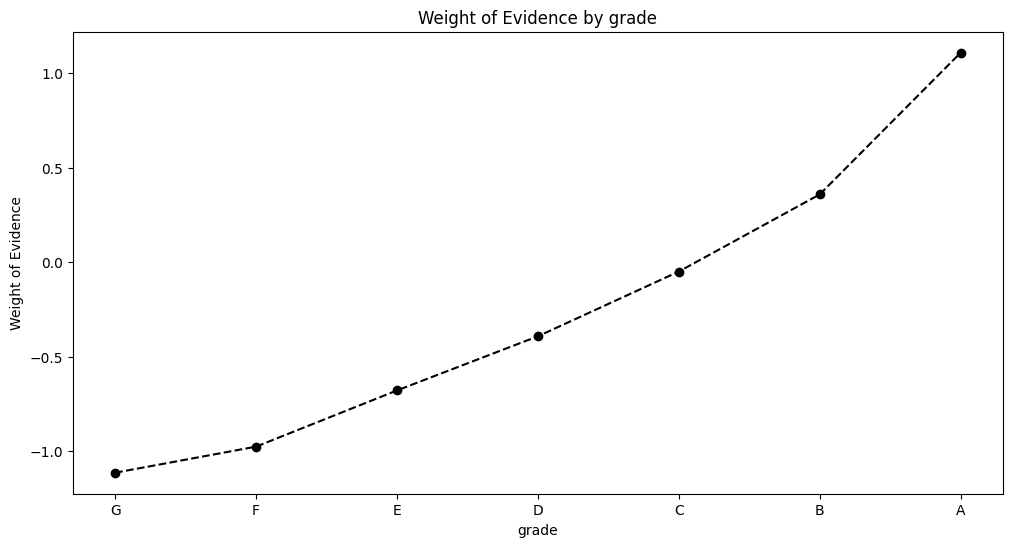

In [127]:
plot_by_woe(df_temp)

In [130]:
df_temp= woe_discrete(train_inputs_preprocess, 'home_ownership', train_targets_preprocess)
df_temp

home_ownership   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0          OTHER     137   0.795620    0.000367     109.0     28.0   
1           NONE      40   0.850000    0.000107      34.0      6.0   
2           RENT  150599   0.873870    0.403720  131604.0  18995.0   
3            OWN   33295   0.892536    0.089256   29717.0   3578.0   
4       MORTGAGE  188956   0.903835    0.506546  170785.0  18171.0   
5            ANY       1   1.000000    0.000003       1.0      0.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000328    0.000687 -0.738602             NaN       NaN  inf  
1     0.000102    0.000147 -0.363144        0.054380  0.375458  inf  
2     0.396099    0.465815 -0.162123        0.023870  0.201021  inf  
3     0.089442    0.087743  0.019170        0.018666  0.181294  inf  
4     0.514026    0.445608  0.142834        0.011298  0.123663  inf  
5     0.000003    0.000000       inf        0.096165       inf  inf

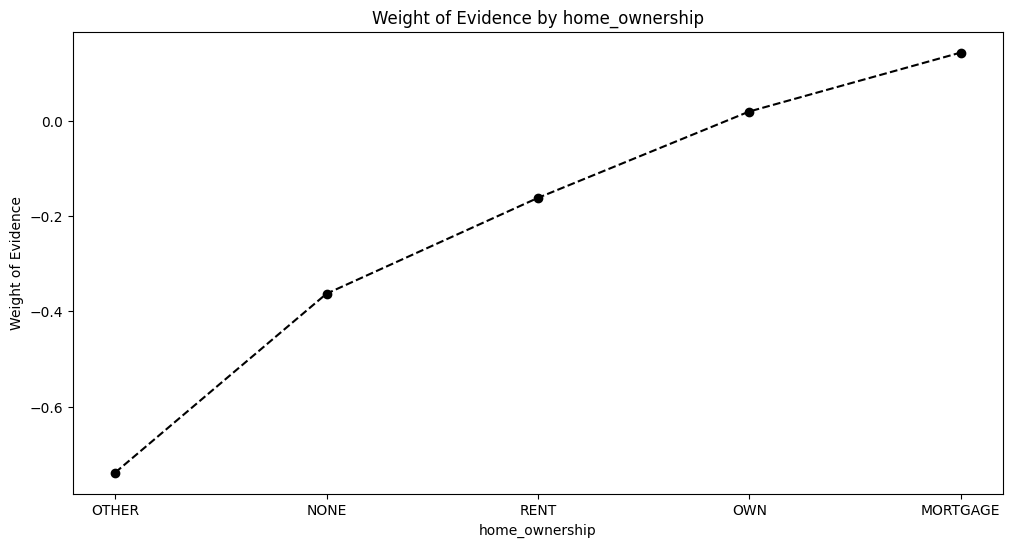

In [131]:
plot_by_woe(df_temp)

In [132]:
train_inputs_preprocess['home_ownership:RENT_OTHER_NONE_ANY'] = sum([train_inputs_preprocess['home_ownership:RENT'], train_inputs_preprocess['home_ownership:OTHER'],
                                                            train_inputs_preprocess['home_ownership:NONE'], train_inputs_preprocess['home_ownership:ANY']])

In [133]:
train_inputs_preprocess['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [134]:
df_temp = woe_discrete(train_inputs_preprocess, 'addr_state', train_targets_preprocess)
df_temp

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE     13   0.461538    0.000035      6.0     7.0     0.000018   
1          IA     13   0.769231    0.000035     10.0     3.0     0.000030   
2          NV   5221   0.864585    0.013996   4514.0   707.0     0.013586   
3          FL  25211   0.875808    0.067585  22080.0  3131.0     0.066456   
4          HI   2001   0.877061    0.005364   1755.0   246.0     0.005282   
5          AL   4671   0.877328    0.012522   4098.0   573.0     0.012334   
6          NM   2075   0.883373    0.005563   1833.0   242.0     0.005517   
7          VA  11366   0.883864    0.030470  10046.0  1320.0     0.030236   
8          NY  32211   0.883984    0.086350  28474.0  3737.0     0.085701   
9          OK   3284   0.884287    0.008804   2904.0   380.0     0.008740   
10         TN   4845   0.884623    0.012988   4286.0   559.0     0.012900   
11         MO   6017   0.884660    0.016130   5323.0   694.0     0.016021   
12         LA   4359   0.885295    0.011685   3859.0   500.0     0.011615   
13         MD   8771   0.885418    0.023513   7766.0  1005.0     0.023374   
14         NC  10204   0.885633    0.027355   9037.0  1167.0     0.027199   
15         CA  57199   0.885645    0.153337  50658.0  6541.0     0.152470   
16         UT   2756   0.887155    0.007388   2445.0   311.0     0.007359   
17         KY   3587   0.887650    0.009616   3184.0   403.0     0.009583   
18         AZ   8645   0.888259    0.023175   7679.0   966.0     0.023112   
19         NJ  14385   0.888286    0.038563  12778.0  1607.0     0.038459   
20         AR   2760   0.889855    0.007399   2456.0   304.0     0.007392   
21         MI   9191   0.890436    0.024639   8184.0  1007.0     0.024632   
22         PA  13090   0.890451    0.035091  11656.0  1434.0     0.035082   
23         OH  12135   0.890894    0.032531  10811.0  1324.0     0.032539   
24         MN   6526   0.891358    0.017495   5817.0   709.0     0.017508   
25         RI   1647   0.893139    0.004415   1471.0   176.0     0.004427   
26         MA   8858   0.893543    0.023746   7915.0   943.0     0.023822   
27         DE   1064   0.893797    0.002852    951.0   113.0     0.002862   
28         SD    801   0.893883    0.002147    716.0    85.0     0.002155   
29         IN   5210   0.894050    0.013967   4658.0   552.0     0.014020   
30         GA  11960   0.896990    0.032062  10728.0  1232.0     0.032289   
31         WA   8372   0.897157    0.022443   7511.0   861.0     0.022606   
32         OR   4814   0.897590    0.012905   4321.0   493.0     0.013005   
33         WI   4740   0.899789    0.012707   4265.0   475.0     0.012837   
34         MT   1103   0.901179    0.002957    994.0   109.0     0.002992   
35         TX  29158   0.903800    0.078166  26353.0  2805.0     0.079317   
36         IL  14833   0.904874    0.039764  13422.0  1411.0     0.040397   
37         CT   5775   0.905455    0.015481   5229.0   546.0     0.015738   
38         KS   3360   0.908036    0.009007   3051.0   309.0     0.009183   
39         SC   4448   0.909173    0.011924   4044.0   404.0     0.012172   
40         CO   7823   0.909242    0.020972   7113.0   710.0     0.021409   
41         VT    727   0.910591    0.001949    662.0    65.0     0.001992   
42         AK   1003   0.911266    0.002689    914.0    89.0     0.002751   
43         MS    980   0.912245    0.002627    894.0    86.0     0.002691   
44         WV   1926   0.920042    0.005163   1772.0   154.0     0.005333   
45         NH   1830   0.921858    0.004906   1687.0   143.0     0.005078   
46         WY    919   0.928183    0.002464    853.0    66.0     0.002567   
47         DC   1129   0.934455    0.003027   1055.0    74.0     0.003175   
48         ME      2   1.000000    0.000005      2.0     0.0     0.000006   
49         ID     10   1.000000    0.000027     10.0     0.0     0.000030   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000172 -2

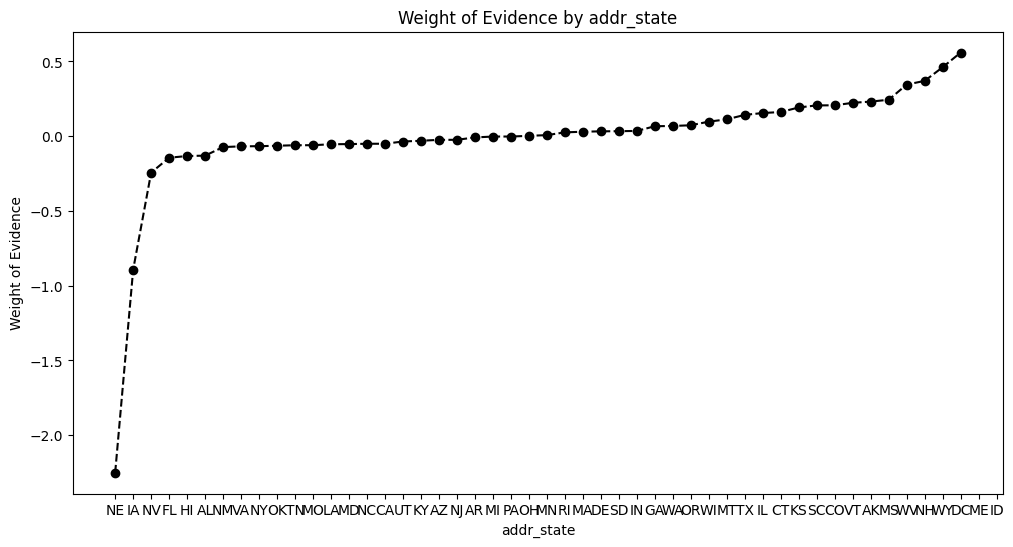

In [135]:
plot_by_woe(df_temp)

In [136]:
if ['addr_state:ND'] in train_inputs_preprocess.columns.values:
    pass
else:
    train_inputs_preprocess['addr_state:ND'] = 0

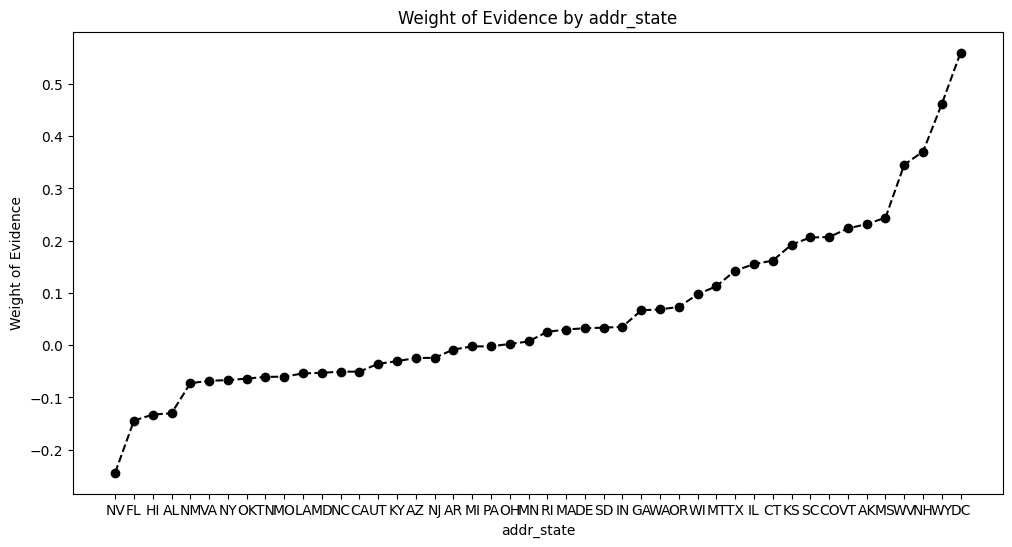

In [137]:
plot_by_woe(df_temp.iloc[2: -2, :])

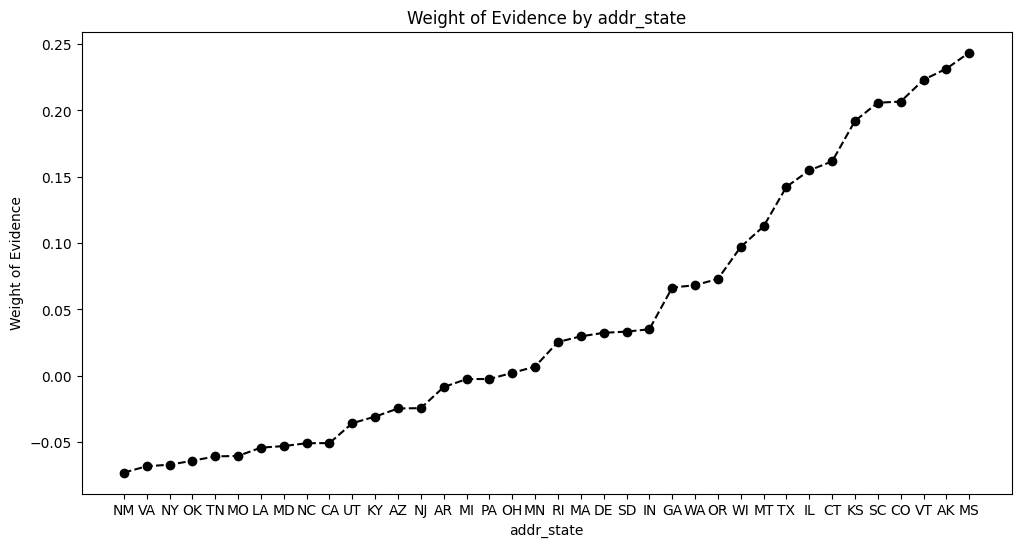

In [138]:
plot_by_woe(df_temp.iloc[6: -6, :])

In [139]:
train_inputs_preprocess['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([train_inputs_preprocess['addr_state:ND'], train_inputs_preprocess['addr_state:NE'],
                                                         train_inputs_preprocess['addr_state:IA'], train_inputs_preprocess['addr_state:NV'],
                                                         train_inputs_preprocess['addr_state:FL'], train_inputs_preprocess['addr_state:HI'],
                                                         train_inputs_preprocess['addr_state:AL']])

train_inputs_preprocess['addr_state:NM_VA'] = sum([train_inputs_preprocess['addr_state:NM'], train_inputs_preprocess['addr_state:VA']])

train_inputs_preprocess['addr_state:OK_TN_MO_LA_MD_NC'] = sum([train_inputs_preprocess['addr_state:OK'], train_inputs_preprocess['addr_state:TN'],
                                              train_inputs_preprocess['addr_state:MO'], train_inputs_preprocess['addr_state:LA'],
                                              train_inputs_preprocess['addr_state:MD'], train_inputs_preprocess['addr_state:NC']])

train_inputs_preprocess['addr_state:UT_KY_AZ_NJ'] = sum([train_inputs_preprocess['addr_state:UT'], train_inputs_preprocess['addr_state:KY'],
                                              train_inputs_preprocess['addr_state:AZ'], train_inputs_preprocess['addr_state:NJ']])

train_inputs_preprocess['addr_state:AR_MI_PA_OH_MN'] = sum([train_inputs_preprocess['addr_state:AR'], train_inputs_preprocess['addr_state:MI'],
                                              train_inputs_preprocess['addr_state:PA'], train_inputs_preprocess['addr_state:OH'],
                                              train_inputs_preprocess['addr_state:MN']])

train_inputs_preprocess['addr_state:RI_MA_DE_SD_IN'] = sum([train_inputs_preprocess['addr_state:RI'], train_inputs_preprocess['addr_state:MA'],
                                              train_inputs_preprocess['addr_state:DE'], train_inputs_preprocess['addr_state:SD'],
                                              train_inputs_preprocess['addr_state:IN']])

train_inputs_preprocess['addr_state:GA_WA_OR'] = sum([train_inputs_preprocess['addr_state:GA'], train_inputs_preprocess['addr_state:WA'],
                                              train_inputs_preprocess['addr_state:OR']])

train_inputs_preprocess['addr_state:WI_MT'] = sum([train_inputs_preprocess['addr_state:WI'], train_inputs_preprocess['addr_state:MT']])

train_inputs_preprocess['addr_state:IL_CT'] = sum([train_inputs_preprocess['addr_state:IL'], train_inputs_preprocess['addr_state:CT']])

train_inputs_preprocess['addr_state:KS_SC_CO_VT_AK_MS'] = sum([train_inputs_preprocess['addr_state:KS'], train_inputs_preprocess['addr_state:SC'],
                                              train_inputs_preprocess['addr_state:CO'], train_inputs_preprocess['addr_state:VT'],
                                              train_inputs_preprocess['addr_state:AK'], train_inputs_preprocess['addr_state:MS']])

train_inputs_preprocess['addr_state:WV_NH_WY_DC_ME_ID'] = sum([train_inputs_preprocess['addr_state:WV'], train_inputs_preprocess['addr_state:NH'],
                                              train_inputs_preprocess['addr_state:WY'], train_inputs_preprocess['addr_state:DC'],
                                              train_inputs_preprocess['addr_state:ME'], train_inputs_preprocess['addr_state:ID']])

In [140]:
df_temp = woe_discrete(train_inputs_preprocess, 'verification_status', train_targets_preprocess)
df_temp

verification_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0            Verified  134414   0.872781    0.360332  117314.0  17100.0   
1     Source Verified  120030   0.895918    0.321772  107537.0  12493.0   
2        Not Verified  118584   0.905679    0.317896  107399.0  11185.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.353090    0.419344 -0.171969             NaN       NaN  0.020384  
1     0.323663    0.306366  0.054922        0.023137  0.226891  0.020384  
2     0.323248    0.274290  0.164232        0.009761  0.109311  0.020384

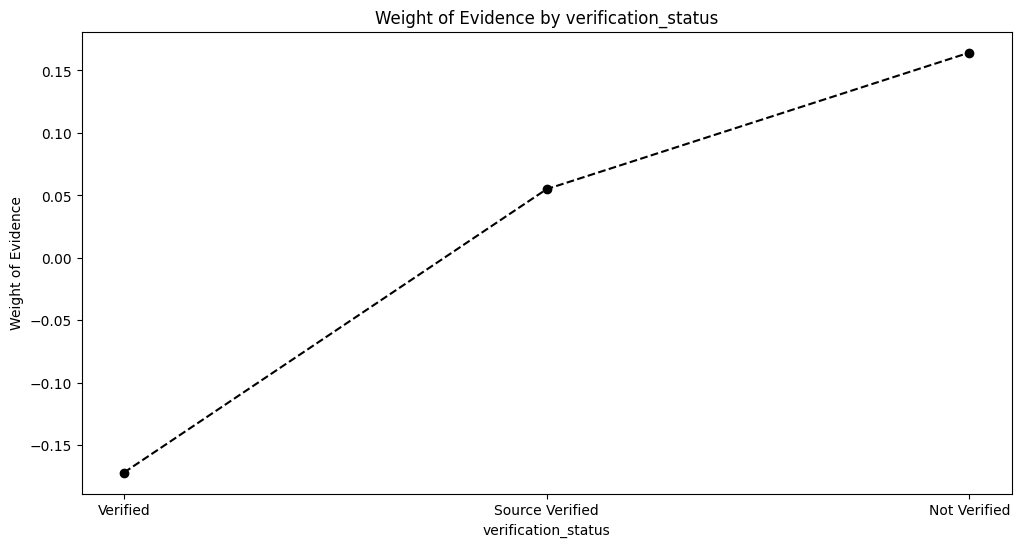

In [141]:
plot_by_woe(df_temp)

In [142]:
df_temp = woe_discrete(train_inputs_preprocess, 'purpose', train_targets_preprocess)
df_temp

purpose   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0       small_business    5582   0.786098    0.014964    4388.0   1194.0   
1          educational     333   0.801802    0.000893     267.0     66.0   
2               moving    2392   0.839465    0.006412    2008.0    384.0   
3                house    1830   0.860109    0.004906    1574.0    256.0   
4                other   18884   0.862264    0.050624   16283.0   2601.0   
5     renewable_energy     281   0.864769    0.000753     243.0     38.0   
6              medical    3684   0.868350    0.009876    3199.0    485.0   
7              wedding    1887   0.881823    0.005059    1664.0    223.0   
8             vacation    1991   0.882471    0.005337    1757.0    234.0   
9   debt_consolidation  219183   0.886884    0.587578  194390.0  24793.0   
10    home_improvement   21238   0.900697    0.056934   19129.0   2109.0   
11      major_purchase    7837   0.905449    0.021009    7096.0    741.0   
12                 car    4325   0.909595    0.011594    3934.0    391.0   
13         credit_card   83581   0.913102    0.224061   76318.0   7263.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.013207    0.029280 -0.796180             NaN       NaN  0.035418  
1      0.000804    0.001619 -0.700151        0.015704  0.096029  0.035418  
2      0.006044    0.009417 -0.443493        0.037663  0.256658  0.035418  
3      0.004737    0.006278 -0.281547        0.020644  0.161946  0.035418  
4      0.049008    0.063784 -0.263519        0.002155  0.018028  0.035418  
5      0.000731    0.000932 -0.242270        0.002504  0.021250  0.035418  
6      0.009628    0.011894 -0.211300        0.003581  0.030969  0.035418  
7      0.005008    0.005469 -0.087937        0.013473  0.123363  0.035418  
8      0.005288    0.005738 -0.081703        0.000648  0.006234  0.035418  
9      0.585071    0.607999 -0.038440        0.004413  0.043263  0.035418  
10     0.057574    0.051719  0.107247        0.013812  0.145687  0.035418  
11     0.021357    0.018172  0.161541        0.004752  0.054294  0.035418  
12     0.011840    0.009589  0.210959        0.004147  0.049419  0.035418  
13     0.229701    0.178111  0.254371        0.003507  0.043411  0.035418

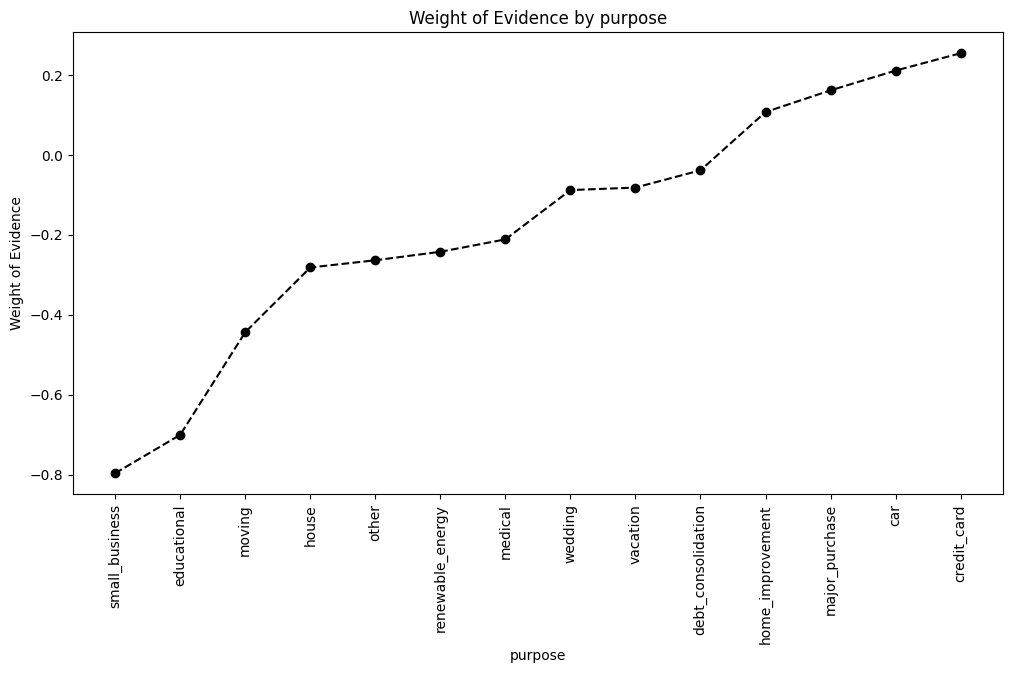

In [143]:
plot_by_woe(df_temp, 90)

In [144]:
train_inputs_preprocess['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([train_inputs_preprocess['purpose:educational'], train_inputs_preprocess['purpose:small_business'],
                                                                 train_inputs_preprocess['purpose:wedding'], train_inputs_preprocess['purpose:renewable_energy'],
                                                                 train_inputs_preprocess['purpose:moving'], train_inputs_preprocess['purpose:house']])
train_inputs_preprocess['purpose:oth__med__vacation'] = sum([train_inputs_preprocess['purpose:other'], train_inputs_preprocess['purpose:medical'],
                                             train_inputs_preprocess['purpose:vacation']])
train_inputs_preprocess['purpose:major_purch__car__home_impr'] = sum([train_inputs_preprocess['purpose:major_purchase'], train_inputs_preprocess['purpose:car'],
                                                        train_inputs_preprocess['purpose:home_improvement']])

In [145]:
df_temp = woe_discrete(train_inputs_preprocess, 'initial_list_status', train_targets_preprocess)
df_temp

initial_list_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0                   f  242514   0.879694    0.650123  213338.0  29176.0   
1                   w  130514   0.911105    0.349877  118912.0  11602.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0     0.642101    0.715484 -0.108214             NaN       NaN  0.02478  
1     0.357899    0.284516  0.229461        0.031412  0.337675  0.02478

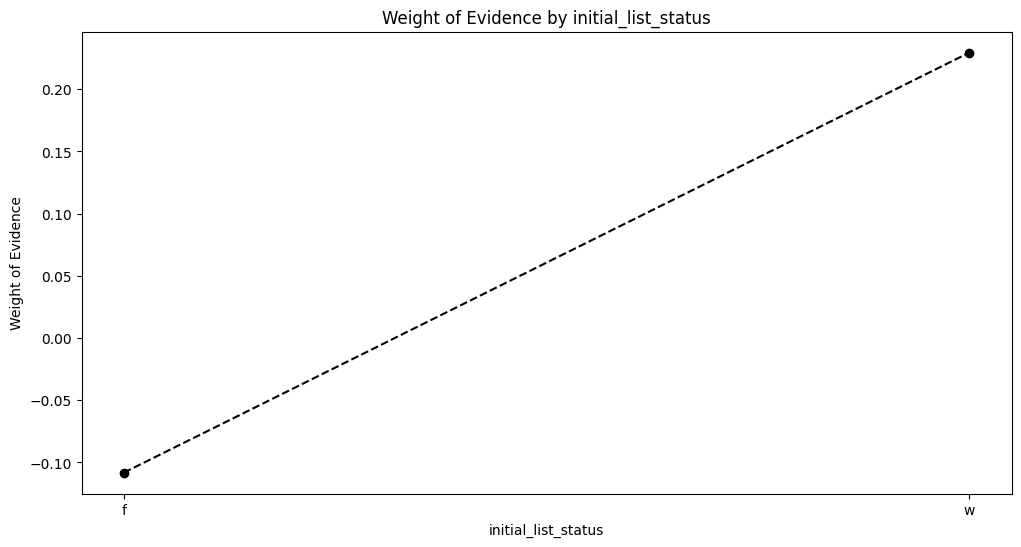

In [146]:
plot_by_woe(df_temp)

# **Pre-Processing Continuous Variables**

In [147]:
def woe_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [157]:
df_temp = woe_continuous(train_inputs_preprocess, 'term', train_targets_preprocess)
df_temp

term   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0  36.0  270419   0.902995    0.724929  244187.0  26232.0      0.73495   
1  60.0  102609   0.858239    0.275071   88063.0  14546.0      0.26505   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.643288  0.133209             NaN       NaN  0.039434  
1    0.356712 -0.297009        0.044756  0.430218  0.039434

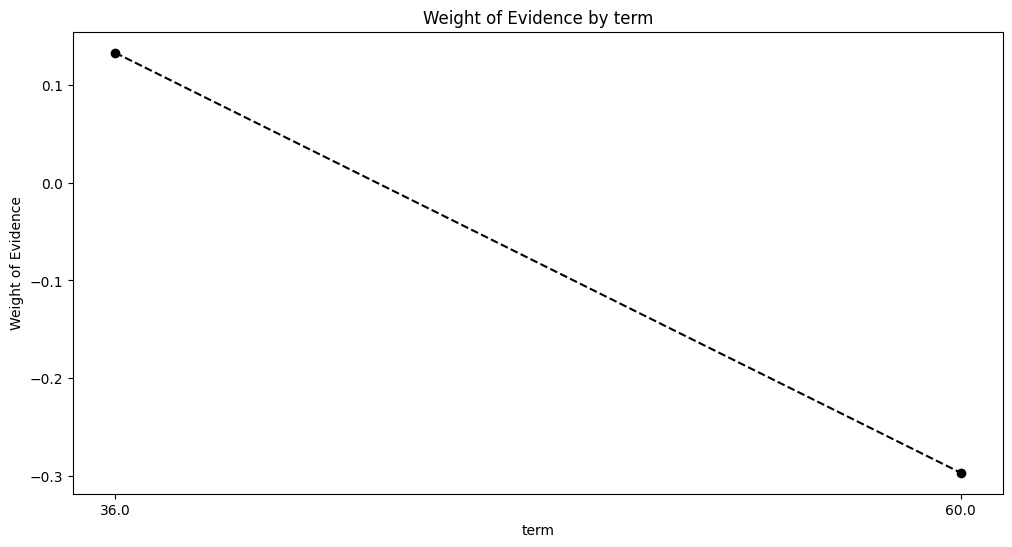

In [158]:
plot_by_woe(df_temp)

In [160]:
train_inputs_preprocess['term:36'] = np.where((train_inputs_preprocess['term'] == 36), 1, 0)
train_inputs_preprocess['term:60'] = np.where((train_inputs_preprocess['term'] == 60), 1, 0)

In [161]:
df_temp= woe_continuous(train_inputs_preprocess, 'emp_length', train_targets_preprocess)
df_temp

emp_length   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0          0.0   45720   0.876400    0.122565   40069.0   5651.0     0.120599   
1          1.0   23654   0.886996    0.063411   20981.0   2673.0     0.063148   
2          2.0   33078   0.890955    0.088674   29471.0   3607.0     0.088701   
3          3.0   29205   0.890772    0.078292   26015.0   3190.0     0.078299   
4          4.0   22468   0.890644    0.060231   20011.0   2457.0     0.060229   
5          5.0   24602   0.884725    0.065952   21766.0   2836.0     0.065511   
6          6.0   20887   0.883899    0.055993   18462.0   2425.0     0.055567   
7          7.0   21049   0.887453    0.056427   18680.0   2369.0     0.056223   
8          8.0   17853   0.889878    0.047860   15887.0   1966.0     0.047816   
9          9.0   14267   0.886662    0.038246   12650.0   1617.0     0.038074   
10        10.0  120245   0.900312    0.322348  108258.0  11987.0     0.325833   

    prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.138580 -0.138975             NaN       NaN  0.006506  
1     0.065550 -0.037329        0.010596  0.101645  0.006506  
2     0.088455  0.002785        0.003959  0.040114  0.006506  
3     0.078228  0.000907        0.000183  0.001878  0.006506  
4     0.060253 -0.000404        0.000128  0.001311  0.006506  
5     0.069547 -0.059790        0.005920  0.059387  0.006506  
6     0.059468 -0.067862        0.000826  0.008071  0.006506  
7     0.058095 -0.032759        0.003554  0.035102  0.006506  
8     0.048212 -0.008245        0.002425  0.024515  0.006506  
9     0.039654 -0.040660        0.003217  0.032416  0.006506  
10    0.293958  0.102950        0.013650  0.143610  0.006506

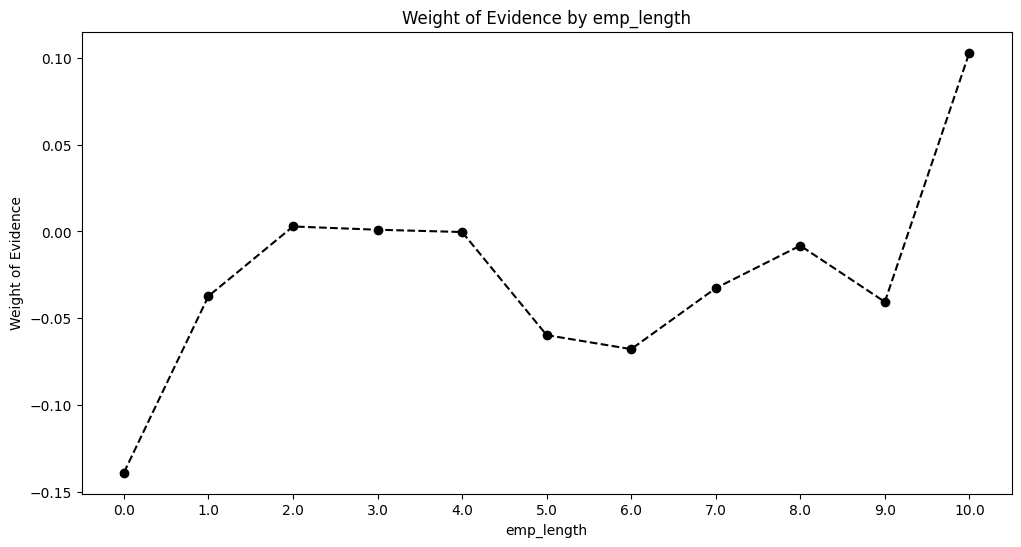

In [162]:
plot_by_woe(df_temp)

In [164]:
train_inputs_preprocess['emp_length:0']= np.where((train_inputs_preprocess['emp_length']==0), 1, 0)
train_inputs_preprocess['emp_length:1']= np.where((train_inputs_preprocess['emp_length']==1), 1, 0)
train_inputs_preprocess['emp_length:2-4']= np.where(train_inputs_preprocess['emp_length'].isin([2,3,4]), 1, 0)
train_inputs_preprocess['emp_length:5-6']= np.where(train_inputs_preprocess['emp_length'].isin([5,6]), 1, 0)
train_inputs_preprocess['emp_length:7-9']= np.where(train_inputs_preprocess['emp_length'].isin([7,8,9]), 1, 0)
train_inputs_preprocess['emp_length:10']= np.where((train_inputs_preprocess['emp_length']==10), 1, 0)

In [166]:
train_inputs_preprocess['months_since_issue_d_factor']= pd.cut(train_inputs_preprocess['months_since_issue_d'], 50)

In [167]:
df_temp=  woe_continuous(train_inputs_preprocess, 'months_since_issue_d_factor', train_targets_preprocess)
df_temp

months_since_issue_d_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              (120.91, 122.8]  28170   0.942244    0.075517  26543.0  1627.0   
1               (122.8, 124.6]  39636   0.928424    0.106255  36799.0  2837.0   
2               (124.6, 126.4]  38614   0.917284    0.103515  35420.0  3194.0   
3               (126.4, 128.2]  29038   0.908603    0.077844  26384.0  2654.0   
4               (128.2, 130.0]  28367   0.901787    0.076045  25581.0  2786.0   
5               (130.0, 131.8]  12165   0.899301    0.032611  10940.0  1225.0   
6               (131.8, 133.6]  24451   0.898900    0.065547  21979.0  2472.0   
7               (133.6, 135.4]  22969   0.888328    0.061574  20404.0  2565.0   
8               (135.4, 137.2]  20640   0.880523    0.055331  18174.0  2466.0   
9               (137.2, 139.0]  18312   0.866863    0.049090  15874.0  2438.0   
10              (139.0, 140.8]   8286   0.856746    0.022213   7099.0  1187.0   
11              (140.8, 142.6]  14120   0.863031    0.037852  12186.0  1934.0   
12              (142.6, 144.4]  11529   0.859658    0.030907   9911.0  1618.0   
13              (144.4, 146.2]   9974   0.852817    0.026738   8506.0  1468.0   
14              (146.2, 148.0]   9811   0.851901    0.026301   8358.0  1453.0   
15              (148.0, 149.8]   4304   0.844331    0.011538   3634.0   670.0   
16              (149.8, 151.6]   6723   0.824781    0.018023   5545.0  1178.0   
17              (151.6, 153.4]   5334   0.841207    0.014299   4487.0   847.0   
18              (153.4, 155.2]   4377   0.846699    0.011734   3706.0   671.0   
19              (155.2, 157.0]   3868   0.827559    0.010369   3201.0   667.0   
20              (157.0, 158.8]   1785   0.855462    0.004785   1527.0   258.0   
21              (158.8, 160.6]   3395   0.853019    0.009101   2896.0   499.0   
22              (160.6, 162.4]   3055   0.853682    0.008190   2608.0   447.0   
23              (162.4, 164.2]   2849   0.842050    0.007637   2399.0   450.0   
24              (164.2, 166.0]   2412   0.851990    0.006466   2055.0   357.0   
25              (166.0, 167.8]   1044   0.869732    0.002799    908.0   136.0   
26              (167.8, 169.6]   2182   0.870761    0.005849   1900.0   282.0   
27              (169.6, 171.4]   1997   0.854782    0.005353   1707.0   290.0   
28              (171.4, 173.2]   1921   0.833941    0.005150   1602.0   319.0   
29              (173.2, 175.0]   1870   0.842246    0.005013   1575.0   295.0   
30              (175.0, 176.8]    795   0.859119    0.002131    683.0   112.0   
31              (176.8, 178.6]   1373   0.890750    0.003681   1223.0   150.0   
32              (178.6, 180.4]   1087   0.874885    0.002914    951.0   136.0   
33              (180.4, 182.2]   1044   0.882184    0.002799    921.0   123.0   
34              (182.2, 184.0]    877   0.856328    0.002351    751.0   126.0   
35              (184.0, 185.8]    346   0.878613    0.000928    304.0    42.0   
36              (185.8, 187.6]    647   0.863988    0.001734    559.0    88.0   
37              (187.6, 189.4]    542   0.850554    0.001453    461.0    81.0   
38              (189.4, 191.2]    497   0.869215    0.001332    432.0    65.0   
39              (191.2, 193.0]    403   0.853598    0.001080    344.0    59.0   
40              (193.0, 194.8]    173   0.803468    0.000464    139.0    34.0   
41              (194.8, 196.6]    139   0.834532    0.000373    116.0    23.0   
42              (196.6, 198.4]    204   0.799020    0.000547    163.0    41.0   
43              (198.4, 200.2]    182   0.796703    0.000488    145.0    37.0   
44              (200.2, 202.0]    530   0.762264    0.001421    404.0   126.0   
45              (202.0, 203.8]    247   0.797571    0.000662    197.0    50.0   
46              (203.8, 205.6]    394   0.723350    0.001056    285.0   109.0   
47              (205.6, 207.4]    176   0.704545    0.000472    124.0    52.0   
48              (207.4, 209.2]    

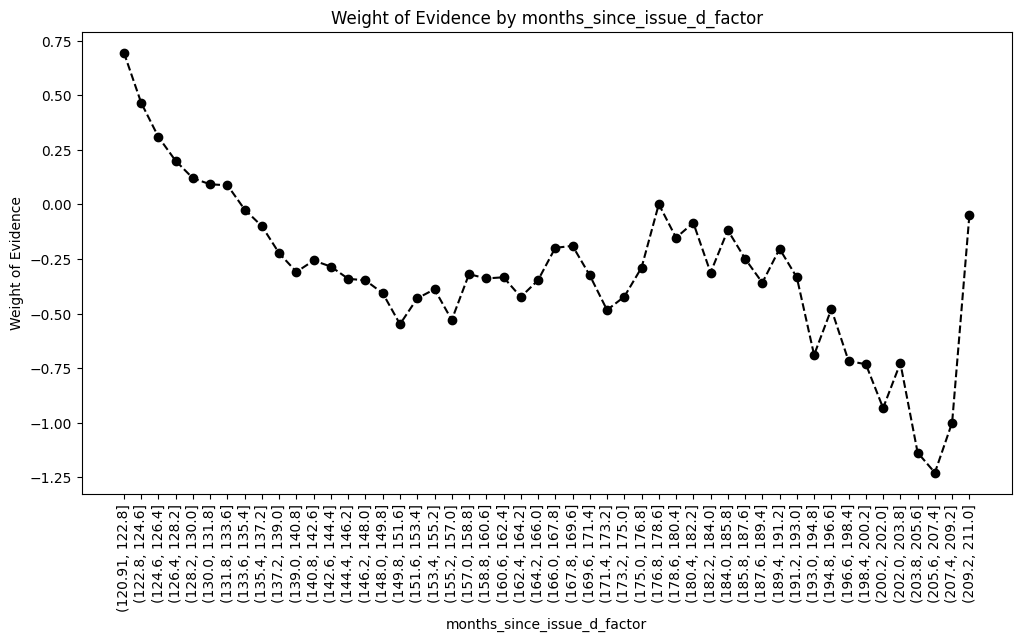

In [169]:
plot_by_woe(df_temp,90)

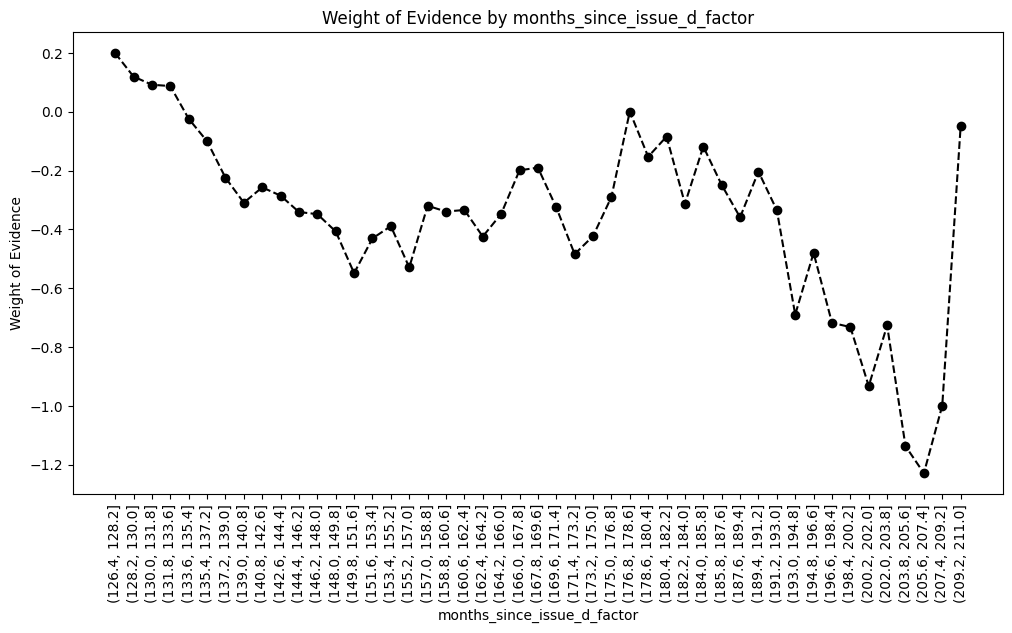

In [170]:
plot_by_woe(df_temp.iloc[3: , : ], 90)

In [172]:
train_inputs_preprocess['months_since_issue_d<127']= np.where(train_inputs_preprocess['months_since_issue_d'].isin(range(0,127)), 1, 0)
train_inputs_preprocess['months_since_issue_d:127-134']= np.where(train_inputs_preprocess['months_since_issue_d'].isin(range(126,135)), 1, 0)
train_inputs_preprocess['months_since_issue_d:134-138']= np.where(train_inputs_preprocess['months_since_issue_d'].isin(range(134,139)), 1, 0)
train_inputs_preprocess['months_since_issue_d:138-150']= np.where(train_inputs_preprocess['months_since_issue_d'].isin(range(138,151)),1,0)
train_inputs_preprocess['months_since_issue_d:150-170']= np.where(train_inputs_preprocess['months_since_issue_d'].isin(range(150,171)),1,0)
train_inputs_preprocess['months_since_issue_d>170']= np.where(train_inputs_preprocess['months_since_issue_d'].isin(range(170, 213)),1,0)

In [174]:
train_inputs_preprocess['int_rate_factor']= pd.cut(train_inputs_preprocess['int_rate'], 50)


In [175]:
df_temp= woe_continuous(train_inputs_preprocess, 'int_rate_factor', train_targets_preprocess)
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (5.399, 5.833]    785   0.961783    0.002104    755.0    30.0   
1     (5.833, 6.246]   8459   0.980376    0.022677   8293.0   166.0   
2     (6.246, 6.658]   7826   0.971505    0.020980   7603.0   223.0   
3     (6.658, 7.071]   1816   0.973018    0.004868   1767.0    49.0   
4     (7.071, 7.484]   3143   0.976456    0.008426   3069.0    74.0   
5     (7.484, 7.897]  12581   0.962324    0.033727  12107.0   474.0   
6      (7.897, 8.31]   9687   0.949314    0.025969   9196.0   491.0   
7      (8.31, 8.722]   6594   0.965271    0.017677   6365.0   229.0   
8     (8.722, 9.135]   9539   0.937415    0.025572   8942.0   597.0   
9     (9.135, 9.548]   6681   0.963928    0.017910   6440.0   241.0   
10    (9.548, 9.961]   7588   0.931866    0.020342   7071.0   517.0   
11   (9.961, 10.374]  10941   0.933644    0.029330  10215.0   726.0   
12  (10.374, 10.786]   5857   0.913608    0.015701   5351.0   506.0   
13  (10.786, 11.199]  17851   0.929584    0.047854  16594.0  1257.0   
14  (11.199, 11.612]   4876   0.918786    0.013071   4480.0   396.0   
15  (11.612, 12.025]  15597   0.933128    0.041812  14554.0  1043.0   
16  (12.025, 12.438]  12336   0.892510    0.033070  11010.0  1326.0   
17   (12.438, 12.85]  11065   0.922910    0.029663  10212.0   853.0   
18   (12.85, 13.263]  21329   0.902949    0.057178  19259.0  2070.0   
19  (13.263, 13.676]  15392   0.907744    0.041262  13972.0  1420.0   
20  (13.676, 14.089]  10991   0.896825    0.029464   9857.0  1134.0   
21  (14.089, 14.502]  23436   0.887694    0.062826  20804.0  2632.0   
22  (14.502, 14.914]   4333   0.862913    0.011616   3739.0   594.0   
23  (14.914, 15.327]  18932   0.881840    0.050752  16695.0  2237.0   
24   (15.327, 15.74]  12327   0.887483    0.033046  10940.0  1387.0   
25   (15.74, 16.153]   7477   0.838973    0.020044   6273.0  1204.0   
26  (16.153, 16.566]  12991   0.859518    0.034826  11166.0  1825.0   
27  (16.566, 16.978]   4237   0.842577    0.011358   3570.0   667.0   
28  (16.978, 17.391]  11396   0.853545    0.030550   9727.0  1669.0   
29  (17.391, 17.804]  12288   0.839437    0.032941  10315.0  1973.0   
30  (17.804, 18.217]   1306   0.823124    0.003501   1075.0   231.0   
31   (18.217, 18.63]  11036   0.835448    0.029585   9220.0  1816.0   
32   (18.63, 19.042]   6808   0.819036    0.018251   5576.0  1232.0   
33  (19.042, 19.455]   4425   0.803164    0.011862   3554.0   871.0   
34  (19.455, 19.868]   6763   0.823599    0.018130   5570.0  1193.0   
35  (19.868, 20.281]   4899   0.832211    0.013133   4077.0   822.0   
36  (20.281, 20.694]   3221   0.795095    0.008635   2561.0   660.0   
37  (20.694, 21.106]   4016   0.799552    0.010766   3211.0   805.0   
38  (21.106, 21.519]   2729   0.779773    0.007316   2128.0   601.0   
39  (21.519, 21.932]    989   0.760364    0.002651    752.0   237.0   
40  (21.932, 22.345]   3476   0.795167    0.009318   2764.0   712.0   
41  (22.345, 22.758]   2251   0.763661    0.006034   1719.0   532.0   
42   (22.758, 23.17]   1535   0.759609    0.004115   1166.0   369.0   
43   (23.17, 23.583]   2652   0.782805    0.007109   2076.0   576.0   
44  (23.583, 23.996]   1573   0.724094    0.004217   1139.0   434.0   
45  (23.996, 24.409]   1455   0.767698    0.003901   1117.0   338.0   
46  (24.409, 24.822]   1664   0.762620    0.004461   1269.0   395.0   
47  (24.822, 25.234]   1315   0.771103    0.003525   1014.0   301.0   
48  (25.234, 25.647]    778   0.736504    0.002086    573.0   205.0   
49   (25.647, 26.06]   1786   0.754759    0.004788   1348.0   438.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.002272    0.000736  1.127775             NaN       NaN  0.343349  
1      0.024960    0.004071  1.813434        0.018592  0.685659  0.343349  
2      0.022883    0.005469  1.431381        0.008871  0.382053  0.343349  
3      0.005318    0.001202  1.487473        0.001512  0.056092  0.343349  
4  

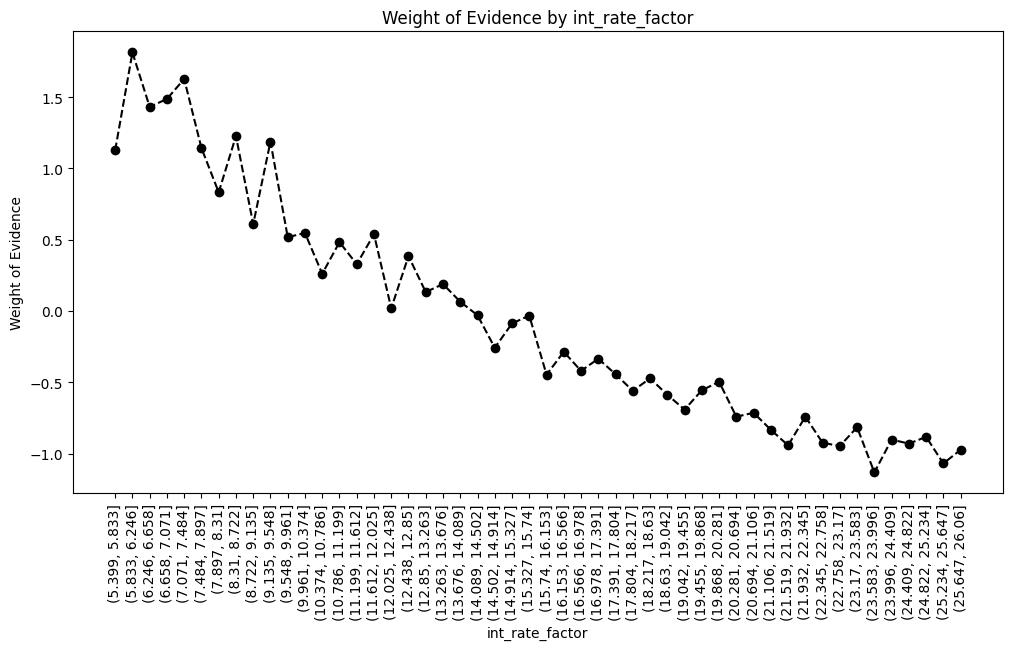

In [176]:
plot_by_woe(df_temp, 90)

In [177]:
train_inputs_preprocess['int_rate:<9.548']= np.where(train_inputs_preprocess['int_rate']<=9.548,1,0)
train_inputs_preprocess['int_rate:9.548-12.025']= np.where((train_inputs_preprocess['int_rate']>9.548)&(train_inputs_preprocess['int_rate']<=12.025),1,0)
train_inputs_preprocess['int_rate:12.025-15.74']= np.where((train_inputs_preprocess['int_rate']>12.025)&(train_inputs_preprocess['int_rate']<=15.74),1,0)
train_inputs_preprocess['int_rate:15.74-20.281']= np.where((train_inputs_preprocess['int_rate']>15.74)&(train_inputs_preprocess['int_rate']<=20.281),1,0)
train_inputs_preprocess['int_rate>20.281']= np.where(train_inputs_preprocess['int_rate']>20.281,1,0)

In [179]:
train_inputs_preprocess['funded_amnt_factor']= pd.cut(train_inputs_preprocess['funded_amnt'], 50)

In [180]:
df_temp= woe_continuous(train_inputs_preprocess, 'funded_amnt_factor', train_targets_preprocess)
df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (465.5, 1190.0]   1224   0.905229    0.003281   1108.0   116.0   
1     (1190.0, 1880.0]   3028   0.903897    0.008117   2737.0   291.0   
2     (1880.0, 2570.0]   6018   0.893819    0.016133   5379.0   639.0   
3     (2570.0, 3260.0]   7248   0.889073    0.019430   6444.0   804.0   
4     (3260.0, 3950.0]   4751   0.891602    0.012736   4236.0   515.0   
5     (3950.0, 4640.0]   9023   0.890945    0.024189   8039.0   984.0   
6     (4640.0, 5330.0]  15903   0.892159    0.042632  14188.0  1715.0   
7     (5330.0, 6020.0]  17236   0.906069    0.046206  15617.0  1619.0   
8     (6020.0, 6710.0]   6914   0.887619    0.018535   6137.0   777.0   
9     (6710.0, 7400.0]  11806   0.898018    0.031649  10602.0  1204.0   
10    (7400.0, 8090.0]  17692   0.897355    0.047428  15876.0  1816.0   
11    (8090.0, 8780.0]   6316   0.879512    0.016932   5555.0   761.0   
12    (8780.0, 9470.0]   9168   0.880345    0.024577   8071.0  1097.0   
13   (9470.0, 10160.0]  33410   0.895001    0.089564  29902.0  3508.0   
14  (10160.0, 10850.0]   6755   0.872835    0.018109   5896.0   859.0   
15  (10850.0, 11540.0]   8559   0.882697    0.022945   7555.0  1004.0   
16  (11540.0, 12230.0]  23506   0.902493    0.063014  21214.0  2292.0   
17  (12230.0, 12920.0]   4802   0.875052    0.012873   4202.0   600.0   
18  (12920.0, 13610.0]   7247   0.894853    0.019427   6485.0   762.0   
19  (13610.0, 14300.0]   8123   0.892774    0.021776   7252.0   871.0   
20  (14300.0, 14990.0]   5183   0.874976    0.013894   4535.0   648.0   
21  (14990.0, 15680.0]  21757   0.899297    0.058325  19566.0  2191.0   
22  (15680.0, 16370.0]  11788   0.884119    0.031601  10422.0  1366.0   
23  (16370.0, 17060.0]   6538   0.876721    0.017527   5732.0   806.0   
24  (17060.0, 17750.0]   3422   0.866745    0.009174   2966.0   456.0   
25  (17750.0, 18440.0]  11441   0.885062    0.030671  10126.0  1315.0   
26  (18440.0, 19130.0]   3919   0.869099    0.010506   3406.0   513.0   
27  (19130.0, 19820.0]   4004   0.857393    0.010734   3433.0   571.0   
28  (19820.0, 20510.0]  20287   0.898999    0.054385  18238.0  2049.0   
29  (20510.0, 21200.0]   6712   0.896305    0.017993   6016.0   696.0   
30  (21200.0, 21890.0]   2081   0.851514    0.005579   1772.0   309.0   
31  (21890.0, 22580.0]   4114   0.889645    0.011029   3660.0   454.0   
32  (22580.0, 23270.0]   2445   0.885072    0.006554   2164.0   281.0   
33  (23270.0, 23960.0]   1825   0.844932    0.004892   1542.0   283.0   
34  (23960.0, 24650.0]   9836   0.904331    0.026368   8895.0   941.0   
35  (24650.0, 25340.0]  10074   0.889815    0.027006   8964.0  1110.0   
36  (25340.0, 26030.0]   1832   0.868450    0.004911   1591.0   241.0   
37  (26030.0, 26720.0]   1252   0.835463    0.003356   1046.0   206.0   
38  (26720.0, 27410.0]   1510   0.873510    0.004048   1319.0   191.0   
39  (27410.0, 28100.0]   6457   0.907078    0.017310   5857.0   600.0   
40  (28100.0, 28790.0]    795   0.854088    0.002131    679.0   116.0   
41  (28790.0, 29480.0]   1176   0.866497    0.003153   1019.0   157.0   
42  (29480.0, 30170.0]   7308   0.884647    0.019591   6465.0   843.0   
43  (30170.0, 30860.0]    567   0.825397    0.001520    468.0    99.0   
44  (30860.0, 31550.0]    884   0.883484    0.002370    781.0   103.0   
45  (31550.0, 32240.0]   1326   0.872549    0.003555   1157.0   169.0   
46  (32240.0, 32930.0]    631   0.874802    0.001692    552.0    79.0   
47  (32930.0, 33620.0]   1090   0.895413    0.002922    976.0   114.0   
48  (33620.0, 34310.0]    492   0.890244    0.001319    438.0    54.0   
49  (34310.0, 35000.0]  13553   0.883199    0.036332  11970.0  1583.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.003335    0.002845  0.158977             NaN       NaN  0.014139  
1      0.008238    0.007136  0.143549        0.001332  0.015427  0.014139  
2      0.016190    0.015670  0.032608        0.01007

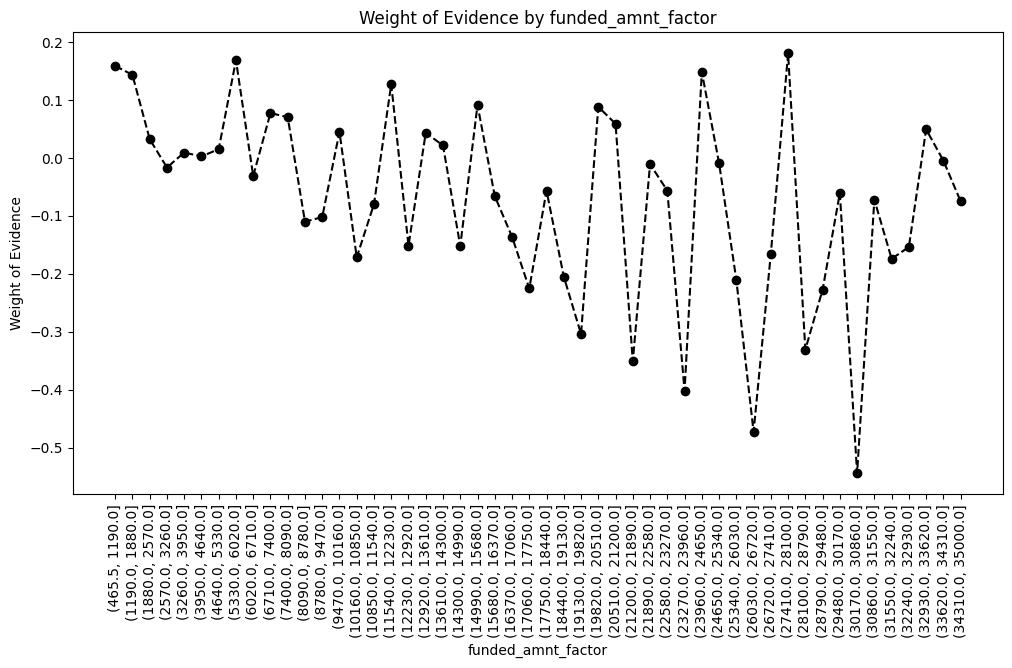

In [181]:
plot_by_woe(df_temp, 90)

In [182]:
train_inputs_preprocess['months_since_earliest_cr_line_factor']= pd.cut(train_inputs_preprocess['months_since_earliest_cr_line'], 50)


In [183]:
df_temp= woe_continuous(train_inputs_preprocess, 'months_since_earliest_cr_line_factor', train_targets_preprocess)
df_temp

months_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  \
0                       (-0.672, 13.44]     24   0.875000    0.000064   
1                        (13.44, 26.88]      0        NaN    0.000000   
2                        (26.88, 40.32]      0        NaN    0.000000   
3                        (40.32, 53.76]      0        NaN    0.000000   
4                         (53.76, 67.2]      0        NaN    0.000000   
5                         (67.2, 80.64]      0        NaN    0.000000   
6                        (80.64, 94.08]      0        NaN    0.000000   
7                       (94.08, 107.52]      0        NaN    0.000000   
8                      (107.52, 120.96]      0        NaN    0.000000   
9                       (120.96, 134.4]      0        NaN    0.000000   
10                      (134.4, 147.84]      0        NaN    0.000000   
11                     (147.84, 161.28]    146   0.863014    0.000391   
12                     (161.28, 174.72]   1837   0.900381    0.004925   
13                     (174.72, 188.16]   3052   0.857798    0.008182   
14                      (188.16, 201.6]   4985   0.872016    0.013364   
15                      (201.6, 215.04]  10570   0.863103    0.028336   
16                     (215.04, 228.48]  13859   0.868389    0.037153   
17                     (228.48, 241.92]  15013   0.875708    0.040246   
18                     (241.92, 255.36]  20985   0.879867    0.056256   
19                      (255.36, 268.8]  22935   0.887508    0.061483   
20                      (268.8, 282.24]  29408   0.886493    0.078836   
21                     (282.24, 295.68]  30642   0.883852    0.082144   
22                     (295.68, 309.12]  30952   0.885856    0.082975   
23                     (309.12, 322.56]  24857   0.890292    0.066636   
24                      (322.56, 336.0]  21823   0.887779    0.058502   
25                      (336.0, 349.44]  19987   0.895432    0.053580   
26                     (349.44, 362.88]  18712   0.898033    0.050162   
27                     (362.88, 376.32]  17660   0.902435    0.047342   
28                     (376.32, 389.76]  11518   0.909012    0.030877   
29                      (389.76, 403.2]   9610   0.903330    0.025762   
30                      (403.2, 416.64]   9427   0.903999    0.025272   
31                     (416.64, 430.08]   9390   0.903834    0.025172   
32                     (430.08, 443.52]   7184   0.906737    0.019259   
33                     (443.52, 456.96]   6091   0.912001    0.016329   
34                      (456.96, 470.4]   5587   0.911222    0.014977   
35                      (470.4, 483.84]   4662   0.907336    0.012498   
36                     (483.84, 497.28]   4406   0.904675    0.011811   
37                     (497.28, 510.72]   3119   0.911189    0.008361   
38                     (510.72, 524.16]   2408   0.919020    0.006455   
39                      (524.16, 537.6]   1810   0.912707    0.004852   
40                      (537.6, 551.04]   1963   0.909832    0.005262   
41                     (551.04, 564.48]   1713   0.911851    0.004592   
42                     (564.48, 577.92]   1372   0.906706    0.003678   
43                     (577.92, 591.36]   1081   0.913969    0.002898   
44                      (591.36, 604.8]    810   0.914815    0.002171   
45                      (604.8, 618.24]    724   0.910221    0.001941   
46                     (618.24, 631.68]    592   0.908784    0.001587   
47                     (631.68, 645.12]    457   0.916849    0.001225   
48                     (645.12, 658.56]    360   0.886111    0.000965   
49                      (658.56, 672.0]   1297   0.884348    0.003477   

     n_good   n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  \
0      21.0     3.0     0.000063    0.000074 -0.151835             NaN   
1       NaN     NaN          NaN         NaN       NaN             NaN   
2       NaN     NaN          NaN         NaN       NaN   

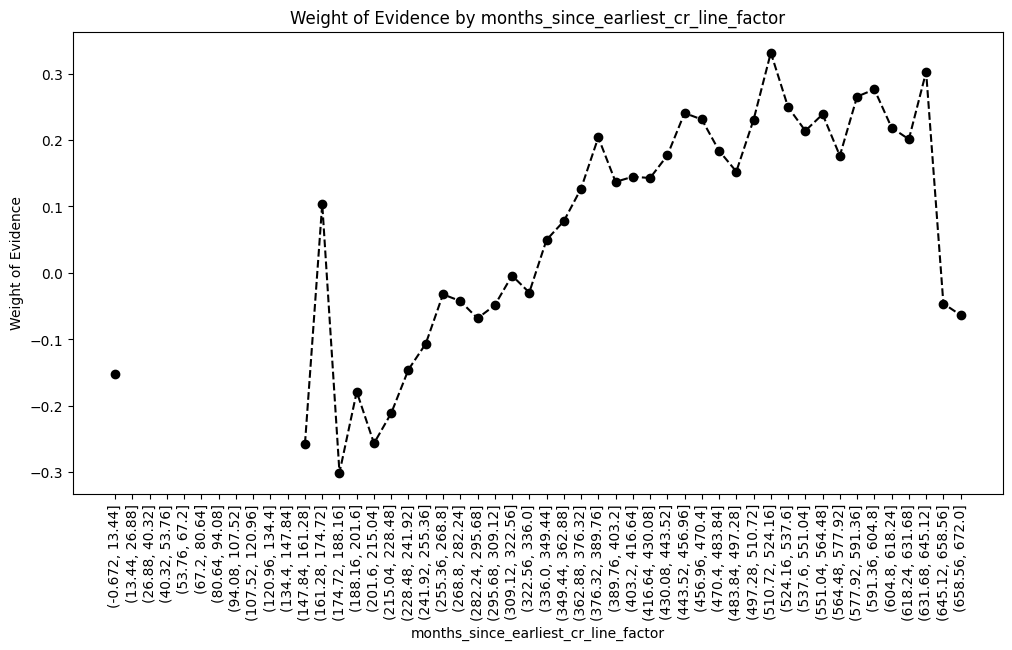

In [184]:
plot_by_woe(df_temp, 90)

In [282]:
train_inputs_preprocess['months_since_earliest_cr_line<14']= np.where(train_inputs_preprocess['months_since_earliest_cr_line']<14, 1, 0)
train_inputs_preprocess['months_since_earliest_cr_line:14-147']= np.where((train_inputs_preprocess['months_since_earliest_cr_line'])>=14 & (train_inputs_preprocess['months_since_earliest_cr_line']<147), 1, 0)
train_inputs_preprocess['months_since_earliest_cr_line:147-188']= np.where((train_inputs_preprocess['months_since_earliest_cr_line']>=147) & (train_inputs_preprocess['months_since_earliest_cr_line']<188), 1, 0)
train_inputs_preprocess['months_since_earliest_cr_line:188-228']= np.where((train_inputs_preprocess['months_since_earliest_cr_line']>=188) & (train_inputs_preprocess['months_since_earliest_cr_line']<228), 1, 0)
train_inputs_preprocess['months_since_earliest_cr_line:228-268']= np.where((train_inputs_preprocess['months_since_earliest_cr_line']>=228) & (train_inputs_preprocess['months_since_earliest_cr_line']<268), 1, 0)
train_inputs_preprocess['months_since_earliest_cr_line:268-336']= np.where((train_inputs_preprocess['months_since_earliest_cr_line']>=268) & (train_inputs_preprocess['months_since_earliest_cr_line']<336), 1, 0)
train_inputs_preprocess['months_since_earliest_crline:336-403']= np.where((train_inputs_preprocess['months_since_earliest_cr_line']>=336) & (train_inputs_preprocess['months_since_earliest_cr_line']<403), 1, 0)
train_inputs_preprocess['months_since_earliest_cr_line:403-497']= np.where((train_inputs_preprocess['months_since_earliest_cr_line']>=403) & (train_inputs_preprocess['months_since_earliest_cr_line']<497), 1, 0)
train_inputs_preprocess['months_since_earliest_crline:497-563']= np.where((train_inputs_preprocess['months_since_earliest_cr_line']>=497) & (train_inputs_preprocess['months_since_earliest_cr_line']<563),1,0)
train_inputs_preprocess['months_since_earliest_cr_line>563']= np.where((train_inputs_preprocess['months_since_earliest_cr_line']>=563),1,0)

In [188]:
df_temp= woe_continuous(train_inputs_preprocess, 'delinq_2yrs', train_targets_preprocess)
df_temp

delinq_2yrs   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0           0.0  306417   0.890499    0.821432  272864.0  33553.0   
1           1.0   44927   0.893249    0.120439   40131.0   4796.0   
2           2.0   13118   0.889007    0.035166   11662.0   1456.0   
3           3.0    4550   0.883297    0.012197    4019.0    531.0   
4           4.0    1868   0.898822    0.005008    1679.0    189.0   
5           5.0     966   0.881988    0.002590     852.0    114.0   
6           6.0     501   0.902196    0.001343     452.0     49.0   
7           7.0     279   0.860215    0.000748     240.0     39.0   
8           8.0     148   0.905405    0.000397     134.0     14.0   
9           9.0      89   0.887640    0.000239      79.0     10.0   
10         10.0      56   0.857143    0.000150      48.0      8.0   
11         11.0      31   0.903226    0.000083      28.0      3.0   
12         12.0      30   0.733333    0.000080      22.0      8.0   
13         13.0      18   0.833333    0.000048      15.0      3.0   
14         14.0       6   0.833333    0.000016       5.0      1.0   
15         15.0       6   0.833333    0.000016       5.0      1.0   
16         16.0       4   1.000000    0.000011       4.0      0.0   
17         17.0       3   0.666667    0.000008       2.0      1.0   
18         18.0       3   0.666667    0.000008       2.0      1.0   
19         19.0       2   1.000000    0.000005       2.0      0.0   
20         21.0       2   0.500000    0.000005       1.0      1.0   
21         22.0       2   1.000000    0.000005       2.0      0.0   
22         24.0       1   1.000000    0.000003       1.0      0.0   
23         29.0       1   1.000000    0.000003       1.0      0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.821261    0.822821 -0.001898             NaN       NaN  inf  
1      0.120786    0.117612  0.026622        0.002750  0.028520  inf  
2      0.035100    0.035706 -0.017102        0.004242  0.043724  inf  
3      0.012096    0.013022 -0.073719        0.005711  0.056616  inf  
4      0.005053    0.004635  0.086462        0.015526  0.160180  inf  
5      0.002564    0.002796 -0.086357        0.016835  0.172819  inf  
6      0.001360    0.001202  0.124117        0.020208  0.210474  inf  
7      0.000722    0.000956 -0.280668        0.041981  0.404785  inf  
8      0.000403    0.000343  0.161037        0.045190  0.441705  inf  
9      0.000238    0.000245 -0.030882        0.017765  0.191920  inf  
10     0.000144    0.000196 -0.305986        0.030498  0.275103  inf  
11     0.000084    0.000074  0.135847        0.046083  0.441833  inf  
12     0.000066    0.000196 -1.086144        0.169892  1.221991  inf  
13     0.000045    0.000074 -0.488307        0.100000  0.597837  inf  
14     0.000015    0.000025 -0.488307        0.000000  0.000000  inf  
15     0.000015    0.000025 -0.488307        0.000000  0.000000  inf  
16     0.000012    0.000000       inf        0.166667       inf  inf  
17     0.000006    0.000025 -1.404598        0.333333       inf  inf  
18     0.000006    0.000025 -1.404598        0.000000  0.000000  inf  
19     0.000006    0.000000       inf        0.333333       inf  inf  
20     0.000003    0.000025 -2.097745        0.500000       inf  inf  
21     0.000006    0.000000       inf        0.500000       inf  inf  
22     0.000003    0.000000       inf        0.000000       NaN  inf  
23     0.000003    0.000000       inf        0.000000       NaN  inf

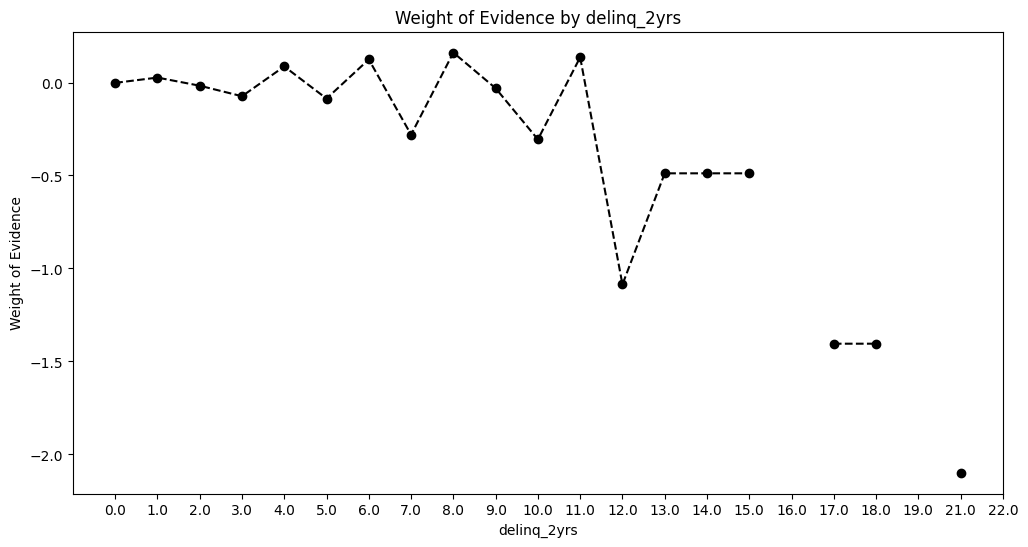

In [189]:
plot_by_woe(df_temp)

In [190]:
train_inputs_preprocess['delinq_2yrs:0'] = np.where((train_inputs_preprocess['delinq_2yrs'] == 0), 1, 0)
train_inputs_preprocess['delinq_2yrs:1-3'] = np.where((train_inputs_preprocess['delinq_2yrs'] >= 1) & (train_inputs_preprocess['delinq_2yrs'] <= 3), 1, 0)
train_inputs_preprocess['delinq_2yrs:>=4'] = np.where((train_inputs_preprocess['delinq_2yrs'] >= 9), 1, 0)

In [192]:
df_temp = woe_continuous(train_inputs_preprocess, 'inq_last_6mths', train_targets_preprocess)
df_temp

inq_last_6mths   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0  193232   0.908395    0.518009  175531.0  17701.0   
1              1.0  104163   0.884950    0.279236   92179.0  11984.0   
2              2.0   46214   0.864197    0.123889   39938.0   6276.0   
3              3.0   20040   0.839671    0.053723   16827.0   3213.0   
4              4.0    5810   0.848365    0.015575    4929.0    881.0   
5              5.0    2217   0.824989    0.005943    1829.0    388.0   
6              6.0     977   0.788127    0.002619     770.0    207.0   
7              7.0     159   0.679245    0.000426     108.0     51.0   
8              8.0     101   0.643564    0.000271      65.0     36.0   
9              9.0      43   0.674419    0.000115      29.0     14.0   
10            10.0      17   0.882353    0.000046      15.0      2.0   
11            11.0       8   0.625000    0.000021       5.0      3.0   
12            12.0      12   0.500000    0.000032       6.0      6.0   
13            13.0       5   0.800000    0.000013       4.0      1.0   
14            14.0       5   0.200000    0.000013       1.0      4.0   
15            15.0       9   0.444444    0.000024       4.0      5.0   
16            16.0       3   1.000000    0.000008       3.0      0.0   
17            17.0       2   0.500000    0.000005       1.0      1.0   
18            18.0       2   0.500000    0.000005       1.0      1.0   
19            19.0       1   1.000000    0.000003       1.0      0.0   
20            20.0       1   0.000000    0.000003       0.0      1.0   
21            24.0       1   1.000000    0.000003       1.0      0.0   
22            25.0       1   0.000000    0.000003       0.0      1.0   
23            27.0       1   1.000000    0.000003       1.0      0.0   
24            28.0       1   1.000000    0.000003       1.0      0.0   
25            31.0       1   1.000000    0.000003       1.0      0.0   
26            32.0       1   0.000000    0.000003       0.0      1.0   
27            33.0       1   0.000000    0.000003       0.0      1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.528310    0.434082  0.196450             NaN       NaN  inf  
1      0.277439    0.293884 -0.057585        0.023446  0.254035  inf  
2      0.120205    0.153907 -0.247150        0.020753  0.189564  inf  
3      0.050646    0.078792 -0.441965        0.024526  0.194816  inf  
4      0.014835    0.021605 -0.375911        0.008694  0.066054  inf  
5      0.005505    0.009515 -0.547226        0.023376  0.171314  inf  
6      0.002318    0.005076 -0.784073        0.036862  0.236848  inf  
7      0.000325    0.001251 -1.347439        0.108882  0.563366  inf  
8      0.000196    0.000883 -1.506877        0.035681  0.159437  inf  
9      0.000087    0.000343 -1.369506        0.030854  0.137370  inf  
10     0.000045    0.000049 -0.082842        0.207934  1.286665  inf  
11     0.000015    0.000074 -1.586919        0.257353  1.504077  inf  
12     0.000018    0.000147 -2.097745        0.125000  0.510826  inf  
13     0.000012    0.000025 -0.711451        0.300000  1.386294  inf  
14     0.000003    0.000098 -3.484039        0.600000  2.772589  inf  
15     0.000012    0.000123 -2.320889        0.244444  1.163151  inf  
16     0.000009    0.000000       inf        0.555556       inf  inf  
17     0.000003    0.000025 -2.097745        0.500000       inf  inf  
18     0.000003    0.000025 -2.097745        0.000000  0.000000  inf  
19     0.000003    0.000000       inf        0.500000       inf  inf  
20     0.000000    0.000025      -inf        1.000000       inf  inf  
21     0.000003    0.000000       inf        1.000000       inf  inf  
22     0.000000    0.000025      -inf        1.000000       inf  inf  
23     0.000003    0.000000       inf        1.000000       inf  inf  
24     0.000003    0.000000       inf        0.000000       NaN  inf  
25     0.000003    0.000000       inf        0.000000       NaN  inf 

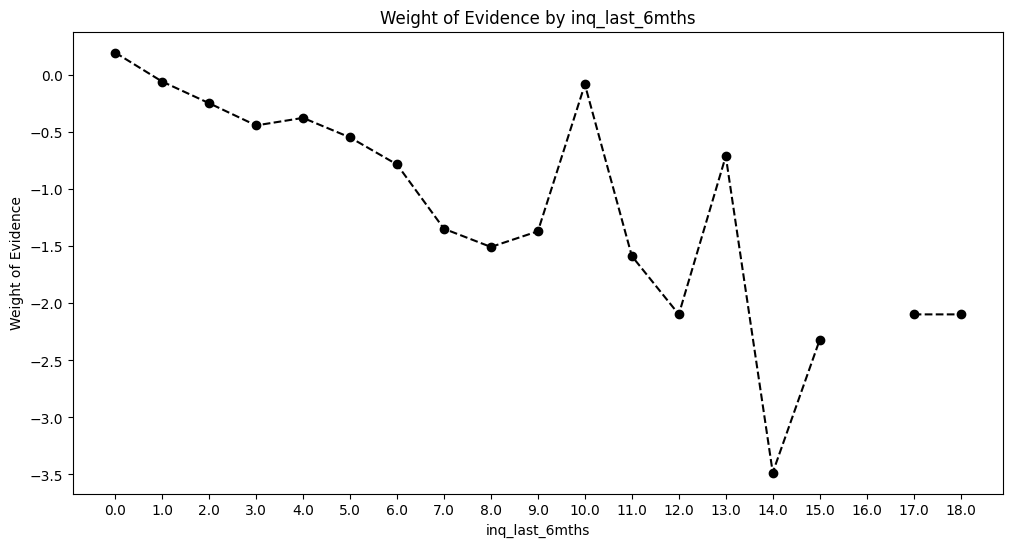

In [193]:
plot_by_woe(df_temp)

In [194]:
df_inputs_prep['inq_last_6mths:0'] = np.where((df_inputs_prep['inq_last_6mths'] == 0), 1, 0)
df_inputs_prep['inq_last_6mths:1-2'] = np.where((df_inputs_prep['inq_last_6mths'] >= 1) & (df_inputs_prep['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prep['inq_last_6mths:3-6'] = np.where((df_inputs_prep['inq_last_6mths'] >= 3) & (df_inputs_prep['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prep['inq_last_6mths:>6'] = np.where((df_inputs_prep['inq_last_6mths'] > 6), 1, 0)

In [195]:
df_temp = woe_continuous(train_inputs_preprocess, 'open_acc', train_targets_preprocess)
df_temp

open_acc  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        0.0     29   0.758621    0.000078     22.0     7.0     0.000066   
1        1.0    110   0.872727    0.000295     96.0    14.0     0.000289   
2        2.0   1456   0.845467    0.003903   1231.0   225.0     0.003705   
3        3.0   4378   0.873687    0.011736   3825.0   553.0     0.011512   
4        4.0  10028   0.891504    0.026883   8940.0  1088.0     0.026907   
5        5.0  17141   0.891255    0.045951  15277.0  1864.0     0.045980   
6        6.0  24621   0.892368    0.066003  21971.0  2650.0     0.066128   
7        7.0  30169   0.891544    0.080876  26897.0  3272.0     0.080954   
8        8.0  33579   0.891033    0.090017  29920.0  3659.0     0.090053   
9        9.0  35251   0.889195    0.094500  31345.0  3906.0     0.094342   
10      10.0  33936   0.889056    0.090974  30171.0  3765.0     0.090808   
11      11.0  31372   0.885917    0.084101  27793.0  3579.0     0.083651   
12      12.0  27699   0.889238    0.074254  24631.0  3068.0     0.074134   
13      13.0  23892   0.895446    0.064049  21394.0  2498.0     0.064391   
14      14.0  19770   0.889327    0.052999  17582.0  2188.0     0.052918   
15      15.0  16228   0.891792    0.043503  14472.0  1756.0     0.043558   
16      16.0  13540   0.893944    0.036298  12104.0  1436.0     0.036430   
17      17.0  10712   0.891897    0.028716   9554.0  1158.0     0.028755   
18      18.0   8606   0.895189    0.023071   7704.0   902.0     0.023187   
19      19.0   6836   0.892627    0.018326   6102.0   734.0     0.018366   
20      20.0   5224   0.894142    0.014004   4671.0   553.0     0.014059   
21      21.0   4242   0.896983    0.011372   3805.0   437.0     0.011452   
22      22.0   3313   0.893752    0.008881   2961.0   352.0     0.008912   
23      23.0   2530   0.900791    0.006782   2279.0   251.0     0.006859   
24      24.0   1979   0.891359    0.005305   1764.0   215.0     0.005309   
25      25.0   1542   0.889754    0.004134   1372.0   170.0     0.004129   
26      26.0   1064   0.906955    0.002852    965.0    99.0     0.002904   
27      27.0    863   0.901506    0.002313    778.0    85.0     0.002342   
28      28.0    613   0.907015    0.001643    556.0    57.0     0.001673   
29      29.0    496   0.901210    0.001330    447.0    49.0     0.001345   
30      30.0    377   0.885942    0.001011    334.0    43.0     0.001005   
31      31.0    285   0.905263    0.000764    258.0    27.0     0.000777   
32      32.0    234   0.901709    0.000627    211.0    23.0     0.000635   
33      33.0    175   0.880000    0.000469    154.0    21.0     0.000464   
34      34.0    145   0.903448    0.000389    131.0    14.0     0.000394   
35      35.0    124   0.919355    0.000332    114.0    10.0     0.000343   
36      36.0    104   0.865385    0.000279     90.0    14.0     0.000271   
37      37.0     79   0.886076    0.000212     70.0     9.0     0.000211   
38      38.0     64   0.875000    0.000172     56.0     8.0     0.000169   
39      39.0     55   0.927273    0.000147     51.0     4.0     0.000153   
40      40.0     30   0.933333    0.000080     28.0     2.0     0.000084   
41      41.0     30   0.866667    0.000080     26.0     4.0     0.000078   
42      42.0     22   0.954545    0.000059     21.0     1.0     0.000063   
43      43.0     15   0.866667    0.000040     13.0     2.0     0.000039   
44      44.0     12   0.916667    0.000032     11.0     1.0     0.000033   
45      45.0     14   0.857143    0.000038     12.0     2.0     0.000036   
46      46.0      5   1.000000    0.000013      5.0     0.0     0.000015   
47      47.0      6   0.833333    0.000016      5.0     1.0     0.000015   
48      48.0      4   1.000000    0.000011      4.0     0.0     0.000012   
49      49.0      6   1.000000    0.000016      6.0     0.0     0.000018   
50      50.0      4   1.000000    0.000011      4.0     0.0     0.000012   
51      51.0      5   1.000000    0.000013      5.0 

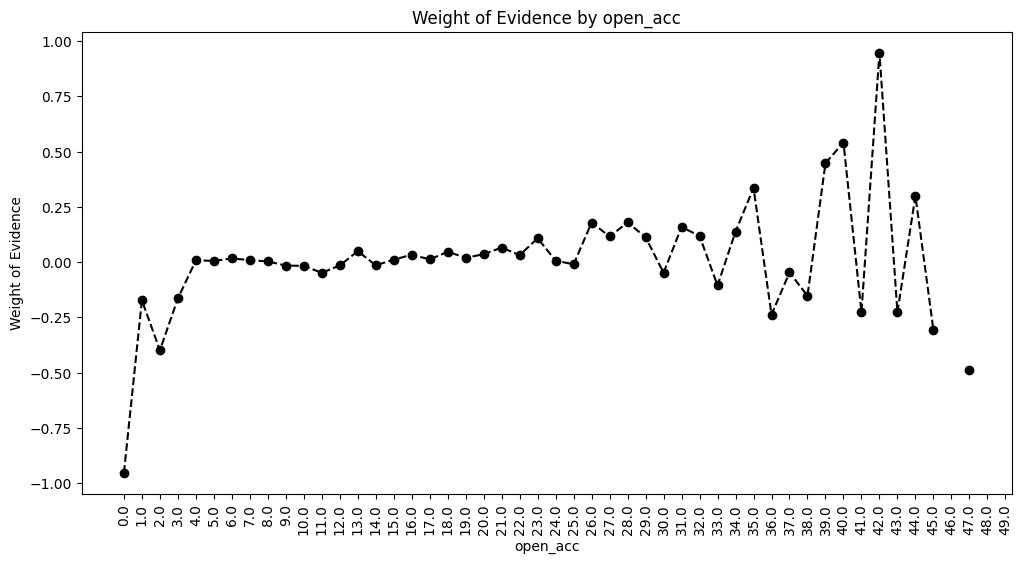

In [196]:
plot_by_woe(df_temp, 90)

In [197]:
train_inputs_preprocess['open_acc:0'] = np.where((train_inputs_preprocess['open_acc'] == 0), 1, 0)
train_inputs_preprocess['open_acc:1-3'] = np.where((train_inputs_preprocess['open_acc'] >= 1) & (train_inputs_preprocess['open_acc'] <= 3), 1, 0)
train_inputs_preprocess['open_acc:4-12'] = np.where((train_inputs_preprocess['open_acc'] >= 4) & (train_inputs_preprocess['open_acc'] <= 12), 1, 0)
train_inputs_preprocess['open_acc:13-17'] = np.where((train_inputs_preprocess['open_acc'] >= 13) & (train_inputs_preprocess['open_acc'] <= 17), 1, 0)
train_inputs_preprocess['open_acc:18-22'] = np.where((train_inputs_preprocess['open_acc'] >= 18) & (train_inputs_preprocess['open_acc'] <= 22), 1, 0)
train_inputs_preprocess['open_acc:23-25'] = np.where((train_inputs_preprocess['open_acc'] >= 23) & (train_inputs_preprocess['open_acc'] <= 25), 1, 0)
train_inputs_preprocess['open_acc:26-30'] = np.where((train_inputs_preprocess['open_acc'] >= 26) & (train_inputs_preprocess['open_acc'] <= 30), 1, 0)
train_inputs_preprocess['open_acc:>=31'] = np.where((train_inputs_preprocess['open_acc'] >= 31), 1, 0)

In [198]:
df_temp = woe_continuous(train_inputs_preprocess, 'pub_rec', train_targets_preprocess)
df_temp

pub_rec   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0       0.0  323999   0.889941    0.868565  288340.0  35659.0     0.867840   
1       1.0   42381   0.893419    0.113613   37864.0   4517.0     0.113962   
2       2.0    4527   0.903247    0.012136    4089.0    438.0     0.012307   
3       3.0    1280   0.920312    0.003431    1178.0    102.0     0.003546   
4       4.0     408   0.924020    0.001094     377.0     31.0     0.001135   
5       5.0     203   0.911330    0.000544     185.0     18.0     0.000557   
6       6.0     117   0.931624    0.000314     109.0      8.0     0.000328   
7       7.0      48   0.958333    0.000129      46.0      2.0     0.000138   
8       8.0      24   1.000000    0.000064      24.0      0.0     0.000072   
9       9.0      14   0.785714    0.000038      11.0      3.0     0.000033   
10     10.0      10   1.000000    0.000027      10.0      0.0     0.000030   
11     11.0       3   1.000000    0.000008       3.0      0.0     0.000009   
12     12.0       1   1.000000    0.000003       1.0      0.0     0.000003   
13     13.0       2   1.000000    0.000005       2.0      0.0     0.000006   
14     15.0       1   1.000000    0.000003       1.0      0.0     0.000003   
15     16.0       1   1.000000    0.000003       1.0      0.0     0.000003   
16     17.0       1   1.000000    0.000003       1.0      0.0     0.000003   
17     18.0       2   1.000000    0.000005       2.0      0.0     0.000006   
18     19.0       1   1.000000    0.000003       1.0      0.0     0.000003   
19     21.0       1   1.000000    0.000003       1.0      0.0     0.000003   
20     34.0       1   1.000000    0.000003       1.0      0.0     0.000003   
21     40.0       1   1.000000    0.000003       1.0      0.0     0.000003   
22     54.0       1   1.000000    0.000003       1.0      0.0     0.000003   
23     63.0       1   1.000000    0.000003       1.0      0.0     0.000003   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.874467 -0.007606             NaN       NaN  inf  
1     0.110771  0.028408        0.003478  0.036014  inf  
2     0.010741  0.136092        0.009828  0.107684  inf  
3     0.002501  0.348856        0.017065  0.212764  inf  
4     0.000760  0.400513        0.003707  0.051657  inf  
5     0.000441  0.232239        0.012690  0.168274  inf  
6     0.000196  0.514161        0.020294  0.281922  inf  
7     0.000049  1.037749        0.026709  0.523588  inf  
8     0.000000       inf        0.041667       inf  inf  
9     0.000074 -0.798462        0.214286       inf  inf  
10    0.000000       inf        0.214286       inf  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf  
15    0.000000       inf        0.000000       NaN  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf  
19    0.000000       inf        0.000000       NaN  inf  
20    0.000000       inf        0.000000       NaN  inf  
21    0.000000       inf        0.000000       NaN  inf  
22    0.000000       inf        0.000000       NaN  inf  
23    0.000000       inf        0.000000       NaN  inf

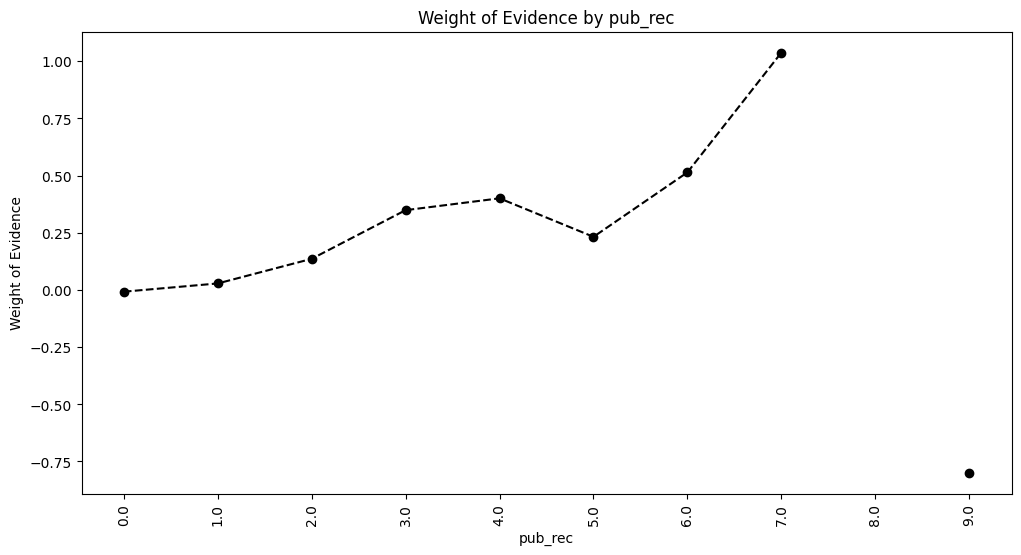

In [199]:
plot_by_woe(df_temp, 90)

In [200]:
train_inputs_preprocess['pub_rec:0-2'] = np.where((train_inputs_preprocess['pub_rec'] >= 0) & (train_inputs_preprocess['pub_rec'] <= 2), 1, 0)
train_inputs_preprocess['pub_rec:3-4'] = np.where((train_inputs_preprocess['pub_rec'] >= 3) & (train_inputs_preprocess['pub_rec'] <= 4), 1, 0)
train_inputs_preprocess['pub_rec:>=5'] = np.where((train_inputs_preprocess['pub_rec'] >= 5), 1, 0)

In [201]:
train_inputs_preprocess['total_acc_factor'] = pd.cut(train_inputs_preprocess['total_acc'], 50)
df_temp = woe_continuous(train_inputs_preprocess, 'total_acc_factor', train_targets_preprocess)
df_temp

total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-0.15, 3.0]    459   0.810458    0.001230    372.0    87.0   
1        (3.0, 6.0]   6004   0.864757    0.016095   5192.0   812.0   
2        (6.0, 9.0]  15047   0.873131    0.040337  13138.0  1909.0   
3       (9.0, 12.0]  25169   0.881283    0.067472  22181.0  2988.0   
4      (12.0, 15.0]  33651   0.881281    0.090210  29656.0  3995.0   
5      (15.0, 18.0]  38711   0.887267    0.103775  34347.0  4364.0   
6      (18.0, 21.0]  40599   0.886155    0.108836  35977.0  4622.0   
7      (21.0, 24.0]  40163   0.891492    0.107668  35805.0  4358.0   
8      (24.0, 27.0]  36286   0.895442    0.097274  32492.0  3794.0   
9      (27.0, 30.0]  31775   0.899103    0.085181  28569.0  3206.0   
10     (30.0, 33.0]  25900   0.894903    0.069432  23178.0  2722.0   
11     (33.0, 36.0]  20748   0.899267    0.055620  18658.0  2090.0   
12     (36.0, 39.0]  16055   0.901713    0.043040  14477.0  1578.0   
13     (39.0, 42.0]  12134   0.901187    0.032528  10935.0  1199.0   
14     (42.0, 45.0]   9107   0.896563    0.024414   8165.0   942.0   
15     (45.0, 48.0]   6494   0.894980    0.017409   5812.0   682.0   
16     (48.0, 51.0]   4551   0.900461    0.012200   4098.0   453.0   
17     (51.0, 54.0]   3260   0.909202    0.008739   2964.0   296.0   
18     (54.0, 57.0]   2146   0.904007    0.005753   1940.0   206.0   
19     (57.0, 60.0]   1605   0.894704    0.004303   1436.0   169.0   
20     (60.0, 63.0]   2164   0.898799    0.005801   1945.0   219.0   
21     (63.0, 66.0]    317   0.914826    0.000850    290.0    27.0   
22     (66.0, 69.0]    218   0.917431    0.000584    200.0    18.0   
23     (69.0, 72.0]    120   0.925000    0.000322    111.0     9.0   
24     (72.0, 75.0]    114   0.885965    0.000306    101.0    13.0   
25     (75.0, 78.0]     64   0.906250    0.000172     58.0     6.0   
26     (78.0, 81.0]     52   0.903846    0.000139     47.0     5.0   
27     (81.0, 84.0]     25   0.880000    0.000067     22.0     3.0   
28     (84.0, 87.0]     28   0.964286    0.000075     27.0     1.0   
29     (87.0, 90.0]     22   0.909091    0.000059     20.0     2.0   
30     (90.0, 93.0]     12   0.916667    0.000032     11.0     1.0   
31     (93.0, 96.0]      8   0.875000    0.000021      7.0     1.0   
32     (96.0, 99.0]      4   0.750000    0.000011      3.0     1.0   
33    (99.0, 102.0]      4   1.000000    0.000011      4.0     0.0   
34   (102.0, 105.0]      4   1.000000    0.000011      4.0     0.0   
35   (105.0, 108.0]      1   1.000000    0.000003      1.0     0.0   
36   (108.0, 111.0]      0        NaN    0.000000      NaN     NaN   
37   (111.0, 114.0]      0        NaN    0.000000      NaN     NaN   
38   (114.0, 117.0]      2   1.000000    0.000005      2.0     0.0   
39   (117.0, 120.0]      2   1.000000    0.000005      2.0     0.0   
40   (120.0, 123.0]      1   1.000000    0.000003      1.0     0.0   
41   (123.0, 126.0]      1   1.000000    0.000003      1.0     0.0   
42   (126.0, 129.0]      0        NaN    0.000000      NaN     NaN   
43   (129.0, 132.0]      0        NaN    0.000000      NaN     NaN   
44   (132.0, 135.0]      0        NaN    0.000000      NaN     NaN   
45   (135.0, 138.0]      0        NaN    0.000000      NaN     NaN   
46   (138.0, 141.0]      0        NaN    0.000000      NaN     NaN   
47   (141.0, 144.0]      0        NaN    0.000000      NaN     NaN   
48   (144.0, 147.0]      0        NaN    0.000000      NaN     NaN   
49   (147.0, 150.0]      1   1.000000    0.000003      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.001120    0.002134 -0.644759             NaN       NaN  inf  
1      0.015627    0.019913 -0.242371        0.054299  0.402388  inf  
2      0.039543    0.046814 -0.168816        0.008374  0.073555  inf  
3      0.066760    0.073275 -0.093113        0.008152  0.075703  inf  
4      0.089258    0.097969 -0.093124        0.000001  0.000011  inf  
5     

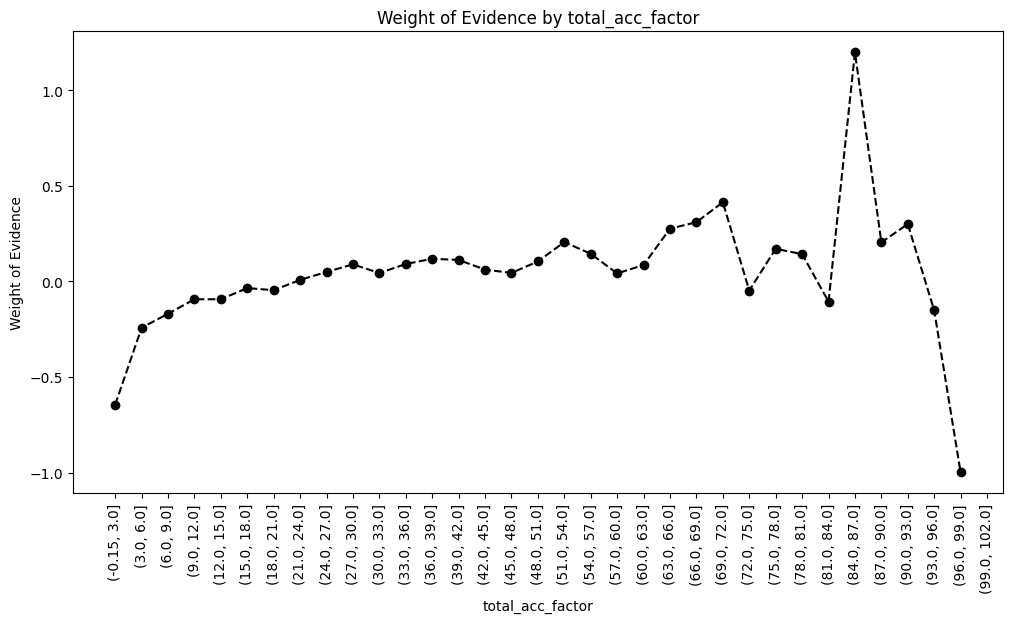

In [202]:
plot_by_woe(df_temp, 90)

In [203]:
train_inputs_preprocess['total_acc:<=27'] = np.where((train_inputs_preprocess['total_acc'] <= 27), 1, 0)
train_inputs_preprocess['total_acc:28-51'] = np.where((train_inputs_preprocess['total_acc'] >= 28) & (train_inputs_preprocess['total_acc'] <= 51), 1, 0)
train_inputs_preprocess['total_acc:>=52'] = np.where((train_inputs_preprocess['total_acc'] >= 52), 1, 0)

In [204]:
df_temp = woe_continuous(train_inputs_preprocess, 'acc_now_delinq', train_targets_preprocess)
df_temp

acc_now_delinq   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0             0.0  371682   0.890648    0.996392  331038.0  40644.0   
1             1.0    1263   0.899446    0.003386    1136.0    127.0   
2             2.0      70   0.928571    0.000188      65.0      5.0   
3             3.0       7   0.857143    0.000019       6.0      1.0   
4             4.0       4   1.000000    0.000011       4.0      0.0   
5             5.0       2   0.500000    0.000005       1.0      1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.996352    0.996714 -0.000363             NaN       NaN  inf  
1     0.003419    0.003114  0.093337        0.008797  0.093700  inf  
2     0.000196    0.000123  0.467204        0.029126  0.373868  inf  
3     0.000018    0.000025 -0.305986        0.071429  0.773190  inf  
4     0.000012    0.000000       inf        0.142857       inf  inf  
5     0.000003    0.000025 -2.097745        0.500000       inf  inf

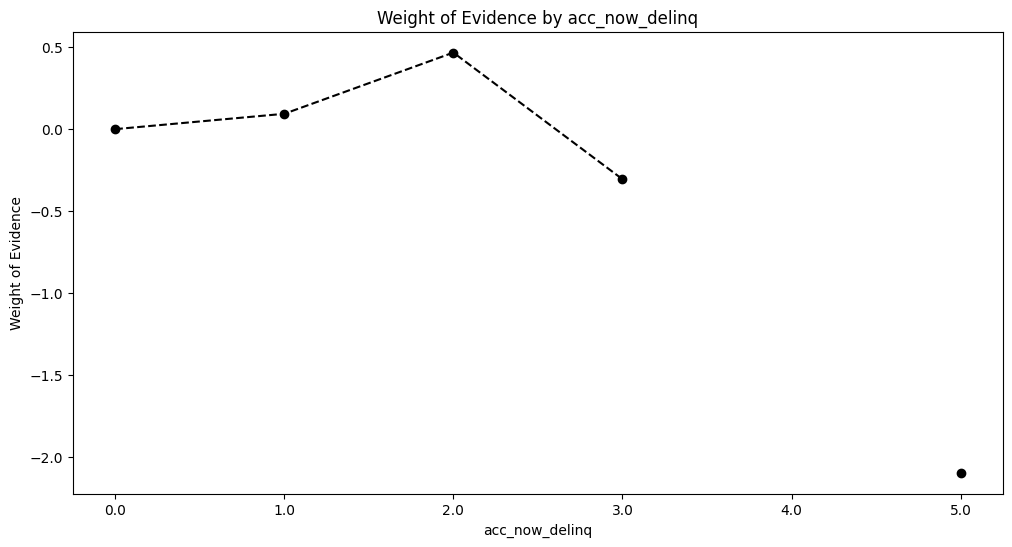

In [205]:
plot_by_woe(df_temp)

In [206]:
train_inputs_preprocess['acc_now_delinq:0'] = np.where((train_inputs_preprocess['acc_now_delinq'] == 0), 1, 0)
train_inputs_preprocess['acc_now_delinq:>=1'] = np.where((train_inputs_preprocess['acc_now_delinq'] >= 1), 1, 0)

In [207]:
train_inputs_preprocess['total_rev_hi_lim_factor'] = pd.cut(train_inputs_preprocess['total_rev_hi_lim'], 2000)
df_temp = woe_continuous(train_inputs_preprocess, 'total_rev_hi_lim_factor', train_targets_preprocess)
df_temp

total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs   n_good  \
0            (-9999.999, 5000.0]  19417   0.866457    0.052052  16824.0   
1             (5000.0, 9999.999]  52655   0.876194    0.141156  46136.0   
2          (9999.999, 14999.998]  59570   0.880376    0.159693  52444.0   
3         (14999.998, 19999.998]  51455   0.877582    0.137939  45156.0   
4         (19999.998, 24999.997]  41582   0.885792    0.111472  36833.0   
5         (24999.997, 29999.997]  32093   0.889415    0.086034  28544.0   
6         (29999.997, 34999.996]  24516   0.894885    0.065722  21939.0   
7         (34999.996, 39999.996]  19767   0.903374    0.052991  17857.0   
8         (39999.996, 44999.996]  14719   0.914396    0.039458  13459.0   
9         (44999.996, 49999.995]  11585   0.911869    0.031057  10564.0   
10        (49999.995, 54999.994]   8964   0.916778    0.024030   8218.0   
11        (54999.994, 59999.994]   6681   0.927406    0.017910   6196.0   
12        (59999.994, 64999.994]   5311   0.932216    0.014238   4951.0   
13        (64999.994, 69999.993]   4305   0.924274    0.011541   3979.0   
14        (69999.993, 74999.992]   3405   0.933040    0.009128   3177.0   
15        (74999.992, 79999.992]   2646   0.924414    0.007093   2446.0   
16        (79999.992, 84999.992]   2196   0.931239    0.005887   2045.0   
17        (84999.992, 89999.991]   1776   0.931306    0.004761   1654.0   
18         (89999.991, 94999.99]   1420   0.934507    0.003807   1327.0   
19          (94999.99, 99999.99]   1178   0.952462    0.003158   1122.0   
20         (99999.99, 104999.99]   1024   0.949219    0.002745    972.0   
21       (104999.99, 109999.989]    848   0.944575    0.002273    801.0   
22      (109999.989, 114999.988]    695   0.949640    0.001863    660.0   
23      (114999.988, 119999.988]    627   0.937799    0.001681    588.0   
24      (119999.988, 124999.988]    471   0.949045    0.001263    447.0   
25      (124999.988, 129999.987]    441   0.931973    0.001182    411.0   
26      (129999.987, 134999.986]    339   0.955752    0.000909    324.0   
27      (134999.986, 139999.986]    298   0.953020    0.000799    284.0   
28      (139999.986, 144999.986]    309   0.941748    0.000828    291.0   
29      (144999.986, 149999.985]    247   0.951417    0.000662    235.0   
30      (149999.985, 154999.984]    210   0.933333    0.000563    196.0   
31      (154999.984, 159999.984]    215   0.967442    0.000576    208.0   
32      (159999.984, 164999.984]    183   0.950820    0.000491    174.0   
33      (164999.984, 169999.983]    162   0.962963    0.000434    156.0   
34      (169999.983, 174999.982]    127   0.921260    0.000340    117.0   
35      (174999.982, 179999.982]    116   0.939655    0.000311    109.0   
36      (179999.982, 184999.982]     98   0.989796    0.000263     97.0   
37      (184999.982, 189999.981]    110   0.945455    0.000295    104.0   
38       (189999.981, 194999.98]     84   0.952381    0.000225     80.0   
39        (194999.98, 199999.98]     70   0.914286    0.000188     64.0   
40        (199999.98, 204999.98]     85   0.976471    0.000228     83.0   
41       (204999.98, 209999.979]     73   0.945205    0.000196     69.0   
42      (209999.979, 214999.978]     58   0.982759    0.000155     57.0   
43      (214999.978, 219999.978]     62   0.919355    0.000166     57.0   
44      (219999.978, 224999.978]     54   0.925926    0.000145     50.0   
45      (224999.978, 229999.977]     37   0.945946    0.000099     35.0   
46      (229999.977, 234999.976]     55   0.909091    0.000147     50.0   
47      (234999.976, 239999.976]     41   0.951220    0.000110     39.0   
48      (239999.976, 244999.976]     35   0.971429    0.000094     34.0   
49      (244999.976, 249999.975]     31   0.967742    0.000083     30.0   
50      (249999.975, 254999.974]     26   0.923077    0.000070     24.0   
51      (254999.974, 259999.974]     30   0.933333    0.000080     28.0   
52      (259999.974, 264999.974]  

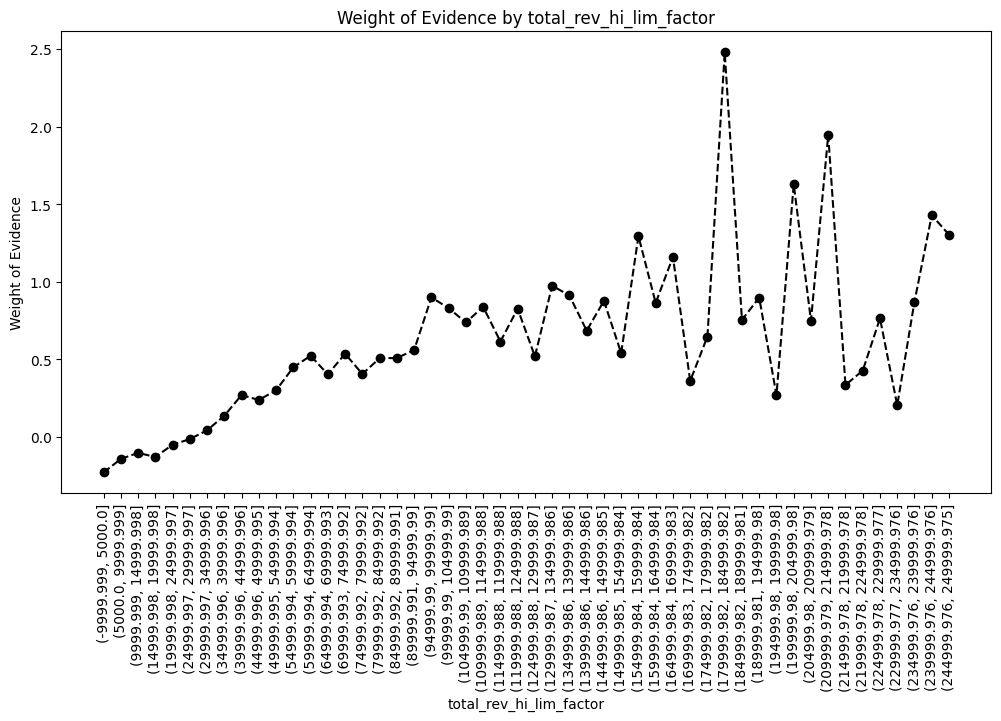

In [208]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [210]:
train_inputs_preprocess['total_rev_hi_lim:<=5K'] = np.where((train_inputs_preprocess['total_rev_hi_lim'] <= 5000), 1, 0)
train_inputs_preprocess['total_rev_hi_lim:5K-10K'] = np.where((train_inputs_preprocess['total_rev_hi_lim'] > 5000) & (train_inputs_preprocess['total_rev_hi_lim'] <= 10000), 1, 0)
train_inputs_preprocess['total_rev_hi_lim:10K-20K'] = np.where((train_inputs_preprocess['total_rev_hi_lim'] > 10000) & (train_inputs_preprocess['total_rev_hi_lim'] <= 20000), 1, 0)
train_inputs_preprocess['total_rev_hi_lim:20K-30K'] = np.where((train_inputs_preprocess['total_rev_hi_lim'] > 20000) & (train_inputs_preprocess['total_rev_hi_lim'] <= 30000), 1, 0)
train_inputs_preprocess['total_rev_hi_lim:30K-40K'] = np.where((train_inputs_preprocess['total_rev_hi_lim'] > 30000) & (train_inputs_preprocess['total_rev_hi_lim'] <= 40000), 1, 0)
train_inputs_preprocess['total_rev_hi_lim:40K-55K'] = np.where((train_inputs_preprocess['total_rev_hi_lim'] > 40000) & (train_inputs_preprocess['total_rev_hi_lim'] <= 55000), 1, 0)
train_inputs_preprocess['total_rev_hi_lim:55K-95K'] = np.where((train_inputs_preprocess['total_rev_hi_lim'] > 55000) & (train_inputs_preprocess['total_rev_hi_lim'] <= 95000), 1, 0)
train_inputs_preprocess['total_rev_hi_lim:>95K'] = np.where((train_inputs_preprocess['total_rev_hi_lim'] > 95000), 1, 0)

In [211]:
train_inputs_preprocess['installment_factor'] = pd.cut(train_inputs_preprocess['installment'], 50)
df_temp = woe_continuous(train_inputs_preprocess, 'installment_factor', train_targets_preprocess)
df_temp

installment_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (14.276, 43.556]   1812   0.906181    0.004858   1642.0   170.0   
1       (43.556, 71.443]   4841   0.897542    0.012978   4345.0   496.0   
2       (71.443, 99.329]   6824   0.893025    0.018294   6094.0   730.0   
3      (99.329, 127.216]   9138   0.890348    0.024497   8136.0  1002.0   
4     (127.216, 155.102]  10040   0.896514    0.026915   9001.0  1039.0   
5     (155.102, 182.988]  16816   0.894208    0.045080  15037.0  1779.0   
6     (182.988, 210.875]  17216   0.904798    0.046152  15577.0  1639.0   
7     (210.875, 238.761]  15090   0.900398    0.040453  13587.0  1503.0   
8     (238.761, 266.648]  18842   0.901391    0.050511  16984.0  1858.0   
9     (266.648, 294.534]  20100   0.891095    0.053883  17911.0  2189.0   
10     (294.534, 322.42]  20364   0.896189    0.054591  18250.0  2114.0   
11     (322.42, 350.307]  25521   0.889424    0.068416  22699.0  2822.0   
12    (350.307, 378.193]  19006   0.885089    0.050951  16822.0  2184.0   
13     (378.193, 406.08]  18079   0.894297    0.048466  16168.0  1911.0   
14     (406.08, 433.966]  13345   0.879206    0.035775  11733.0  1612.0   
15    (433.966, 461.852]  12574   0.883172    0.033708  11105.0  1469.0   
16    (461.852, 489.739]  15685   0.893338    0.042048  14012.0  1673.0   
17    (489.739, 517.625]  15648   0.891935    0.041949  13957.0  1691.0   
18    (517.625, 545.512]  10775   0.863666    0.028885   9306.0  1469.0   
19    (545.512, 573.398]  10558   0.878102    0.028304   9271.0  1287.0   
20    (573.398, 601.284]   9464   0.879544    0.025371   8324.0  1140.0   
21    (601.284, 629.171]   9341   0.905578    0.025041   8459.0   882.0   
22    (629.171, 657.057]   8357   0.897571    0.022403   7501.0   856.0   
23    (657.057, 684.944]   9171   0.891179    0.024585   8173.0   998.0   
24     (684.944, 712.83]   6171   0.878302    0.016543   5420.0   751.0   
25     (712.83, 740.716]   4841   0.883908    0.012978   4279.0   562.0   
26    (740.716, 768.603]   5231   0.894475    0.014023   4679.0   552.0   
27    (768.603, 796.489]   4926   0.903167    0.013205   4449.0   477.0   
28    (796.489, 824.376]   4050   0.889383    0.010857   3602.0   448.0   
29    (824.376, 852.262]   3643   0.887455    0.009766   3233.0   410.0   
30    (852.262, 880.148]   4260   0.892958    0.011420   3804.0   456.0   
31    (880.148, 908.035]   3247   0.870342    0.008704   2826.0   421.0   
32    (908.035, 935.921]   2189   0.873915    0.005868   1913.0   276.0   
33    (935.921, 963.808]   2440   0.876639    0.006541   2139.0   301.0   
34    (963.808, 991.694]   1787   0.834359    0.004791   1491.0   296.0   
35    (991.694, 1019.58]   1617   0.858998    0.004335   1389.0   228.0   
36   (1019.58, 1047.467]   1267   0.870560    0.003397   1103.0   164.0   
37  (1047.467, 1075.353]    898   0.888641    0.002407    798.0   100.0   
38   (1075.353, 1103.24]   1035   0.927536    0.002775    960.0    75.0   
39   (1103.24, 1131.126]    832   0.920673    0.002230    766.0    66.0   
40  (1131.126, 1159.012]    972   0.920782    0.002606    895.0    77.0   
41  (1159.012, 1186.899]   1181   0.917866    0.003166   1084.0    97.0   
42  (1186.899, 1214.785]   1252   0.900958    0.003356   1128.0   124.0   
43  (1214.785, 1242.672]   1019   0.891070    0.002732    908.0   111.0   
44  (1242.672, 1270.558]    711   0.859353    0.001906    611.0   100.0   
45  (1270.558, 1298.444]    457   0.829322    0.001225    379.0    78.0   
46  (1298.444, 1326.331]    197   0.761421    0.000528    150.0    47.0   
47  (1326.331, 1354.217]    121   0.760331    0.000324     92.0    29.0   
48  (1354.217, 1382.104]     41   0.707317    0.000110     29.0    12.0   
49   (1382.104, 1409.99]     36   0.805556    0.000097     29.0     7.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.004942    0.004169  0.170127             NaN       NaN  0.013497  
1      0.013078    0.012163 

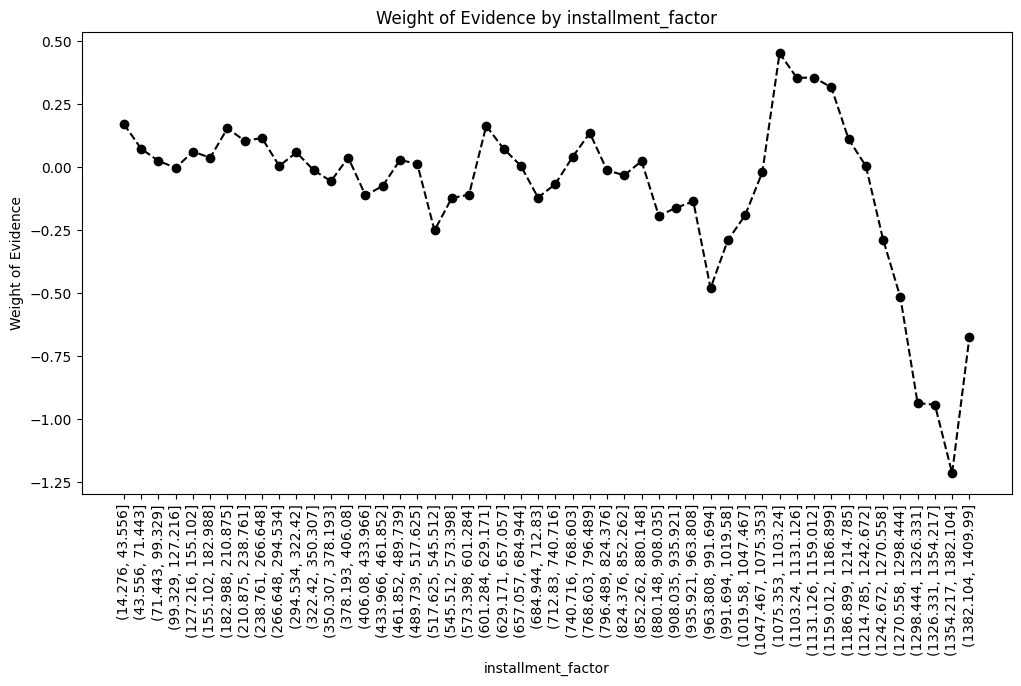

In [212]:
plot_by_woe(df_temp, 90)

In [213]:
train_inputs_preprocess['annual_inc_factor'] = pd.cut(train_inputs_preprocess['annual_inc'],100)
df_temp = woe_continuous(train_inputs_preprocess, 'annual_inc_factor', train_targets_preprocess)
df_temp

annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  \
0      (-5243.882, 73294.82]  231445   0.875901    0.620449  202723.0   
1      (73294.82, 144693.64]  120459   0.912900    0.322922  109967.0   
2     (144693.64, 216092.46]   15885   0.925087    0.042584   14695.0   
3     (216092.46, 287491.28]    3119   0.927220    0.008361    2892.0   
4      (287491.28, 358890.1]    1117   0.929275    0.002994    1038.0   
5      (358890.1, 430288.92]     408   0.933824    0.001094     381.0   
6     (430288.92, 501687.74]     245   0.946939    0.000657     232.0   
7     (501687.74, 573086.56]      87   0.919540    0.000233      80.0   
8     (573086.56, 644485.38]      61   0.868852    0.000164      53.0   
9      (644485.38, 715884.2]      51   0.901961    0.000137      46.0   
10     (715884.2, 787283.02]      37   0.945946    0.000099      35.0   
11    (787283.02, 858681.84]      28   0.821429    0.000075      23.0   
12    (858681.84, 930080.66]      17   1.000000    0.000046      17.0   
13   (930080.66, 1001479.48]      22   0.954545    0.000059      21.0   
14   (1001479.48, 1072878.3]       3   1.000000    0.000008       3.0   
15   (1072878.3, 1144277.12]       7   1.000000    0.000019       7.0   
16  (1144277.12, 1215675.94]       8   1.000000    0.000021       8.0   
17  (1215675.94, 1287074.76]       4   1.000000    0.000011       4.0   
18  (1287074.76, 1358473.58]       4   1.000000    0.000011       4.0   
19   (1358473.58, 1429872.4]       2   1.000000    0.000005       2.0   
20   (1429872.4, 1501271.22]       2   1.000000    0.000005       2.0   
21  (1501271.22, 1572670.04]       1   1.000000    0.000003       1.0   
22  (1572670.04, 1644068.86]       1   1.000000    0.000003       1.0   
23  (1644068.86, 1715467.68]       0        NaN    0.000000       NaN   
24   (1715467.68, 1786866.5]       1   1.000000    0.000003       1.0   
25   (1786866.5, 1858265.32]       0        NaN    0.000000       NaN   
26  (1858265.32, 1929664.14]       1   1.000000    0.000003       1.0   
27  (1929664.14, 2001062.96]       5   1.000000    0.000013       5.0   
28  (2001062.96, 2072461.78]       1   1.000000    0.000003       1.0   
29   (2072461.78, 2143860.6]       0        NaN    0.000000       NaN   
30   (2143860.6, 2215259.42]       0        NaN    0.000000       NaN   
31  (2215259.42, 2286658.24]       0        NaN    0.000000       NaN   
32  (2286658.24, 2358057.06]       0        NaN    0.000000       NaN   
33  (2358057.06, 2429455.88]       0        NaN    0.000000       NaN   
34   (2429455.88, 2500854.7]       0        NaN    0.000000       NaN   
35   (2500854.7, 2572253.52]       0        NaN    0.000000       NaN   
36  (2572253.52, 2643652.34]       0        NaN    0.000000       NaN   
37  (2643652.34, 2715051.16]       0        NaN    0.000000       NaN   
38  (2715051.16, 2786449.98]       0        NaN    0.000000       NaN   
39   (2786449.98, 2857848.8]       0        NaN    0.000000       NaN   
40   (2857848.8, 2929247.62]       0        NaN    0.000000       NaN   
41  (2929247.62, 3000646.44]       0        NaN    0.000000       NaN   
42  (3000646.44, 3072045.26]       0        NaN    0.000000       NaN   
43  (3072045.26, 3143444.08]       0        NaN    0.000000       NaN   
44   (3143444.08, 3214842.9]       0        NaN    0.000000       NaN   
45   (3214842.9, 3286241.72]       0        NaN    0.000000       NaN   
46  (3286241.72, 3357640.54]       0        NaN    0.000000       NaN   
47  (3357640.54, 3429039.36]       0        NaN    0.000000       NaN   
48  (3429039.36, 3500438.18]       0        NaN    0.000000       NaN   
49   (3500438.18, 3571837.0]       0        NaN    0.000000       NaN   
50   (3571837.0, 3643235.82]       0        NaN    0.000000       NaN   
51  (3643235.82, 3714634.64]       0        NaN    0.000000       NaN   
52  (3714634.64, 3786033.46]       0        NaN    0.000000       NaN   
53  (3786033.46, 3857432.28]       0        NaN    0.000000       NaN

In [274]:
train_inputs_preprocess['annual_inc:<=20K'] = np.where(train_inputs_preprocess['annual_inc'] <= 20000, 1, 0)
train_inputs_preprocess['annual_inc:20K-30K'] = np.where((train_inputs_preprocess['annual_inc'] > 20000) & (train_inputs_preprocess['annual_inc'] <= 30000), 1, 0)
train_inputs_preprocess['annual_inc:30K-40k']= np.where((train_inputs_preprocess['annual_inc']>30000)& (train_inputs_preprocess['annual_inc']<=40000),1,0)
train_inputs_preprocess['annual_inc:40K-50K']= np.where((train_inputs_preprocess['annual_inc']>40000)& (train_inputs_preprocess['annual_inc']<=50000),1,0)
train_inputs_preprocess['annual_inc:50K-60K']= np.where((train_inputs_preprocess['annual_inc']>50000)& (train_inputs_preprocess['annual_inc']<=60000),1,0)
train_inputs_preprocess['annual_inc:60K-70K']= np.where((train_inputs_preprocess['annual_inc']>60000)& (train_inputs_preprocess['annual_inc']<=70000),1,0)
train_inputs_preprocess['annual_inc:70K-80K']= np.where((train_inputs_preprocess['annual_inc']>70000)& (train_inputs_preprocess['annual_inc']<=80000),1,0)
train_inputs_preprocess['annual_inc:80K-90K']= np.where((train_inputs_preprocess['annual_inc']>80000)& (train_inputs_preprocess['annual_inc']<=90000),1,0)
train_inputs_preprocess['annual_inc:90K-100K']= np.where((train_inputs_preprocess['annual_inc']>90000)& (train_inputs_preprocess['annual_inc']<=100000),1,0)
train_inputs_preprocess['annual_inc:100k-120k']= np.where((train_inputs_preprocess['annual_inc']>100000) & (train_inputs_preprocess['annual_inc']<=120000),1,0)
train_inputs_preprocess['annual_inc:120k-140k']= np.where((train_inputs_preprocess['annual_inc']>120000) & (train_inputs_preprocess['annual_inc']<=140000),1,0)
train_inputs_preprocess['annual_inc:>140K']= np.where(train_inputs_preprocess['annual_inc']>140000,1,0)


In [215]:
train_inputs_preprocess_temp= train_inputs_preprocess[pd.notnull(train_inputs_preprocess['mths_since_last_delinq'])]
train_inputs_preprocess_temp['mths_since_last_delinq_factor']= pd.cut(train_inputs_preprocess['mths_since_last_delinq'],50)
df_temp=woe_continuous(train_inputs_preprocess_temp, 'mths_since_last_delinq_factor', train_targets_preprocess[train_inputs_preprocess_temp.index])
df_temp

mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                 (-0.188, 3.76]   5277   0.871518    0.030531   4599.0   
1                   (3.76, 7.52]  11167   0.887615    0.064608   9912.0   
2                  (7.52, 11.28]  13306   0.892830    0.076983  11880.0   
3                 (11.28, 15.04]  13216   0.888847    0.076462  11747.0   
4                  (15.04, 18.8]   9337   0.894934    0.054020   8356.0   
5                  (18.8, 22.56]  11641   0.892707    0.067350  10392.0   
6                 (22.56, 26.32]  10887   0.896298    0.062988   9758.0   
7                 (26.32, 30.08]  10560   0.895076    0.061096   9452.0   
8                 (30.08, 33.84]   7576   0.902191    0.043832   6835.0   
9                  (33.84, 37.6]   9795   0.897397    0.056670   8790.0   
10                 (37.6, 41.36]   9352   0.891788    0.054107   8340.0   
11                (41.36, 45.12]   9202   0.896653    0.053239   8251.0   
12                (45.12, 48.88]   6538   0.897828    0.037826   5870.0   
13                (48.88, 52.64]   6486   0.888683    0.037525   5764.0   
14                 (52.64, 56.4]   6045   0.892639    0.034974   5396.0   
15                 (56.4, 60.16]   5867   0.902506    0.033944   5295.0   
16                (60.16, 63.92]   4040   0.887376    0.023374   3585.0   
17                (63.92, 67.68]   5314   0.892172    0.030745   4741.0   
18                (67.68, 71.44]   5141   0.889321    0.029744   4572.0   
19                 (71.44, 75.2]   4950   0.886263    0.028639   4387.0   
20                 (75.2, 78.96]   3312   0.891908    0.019162   2954.0   
21                (78.96, 82.72]   3577   0.885099    0.020695   3166.0   
22                (82.72, 86.48]     94   0.787234    0.000544     74.0   
23                (86.48, 90.24]     38   0.894737    0.000220     34.0   
24                 (90.24, 94.0]     32   0.937500    0.000185     30.0   
25                 (94.0, 97.76]     20   0.750000    0.000116     15.0   
26               (97.76, 101.52]     13   0.923077    0.000075     12.0   
27              (101.52, 105.28]     11   0.909091    0.000064     10.0   
28              (105.28, 109.04]      8   0.750000    0.000046      6.0   
29               (109.04, 112.8]      2   0.500000    0.000012      1.0   
30               (112.8, 116.56]      7   0.857143    0.000040      6.0   
31              (116.56, 120.32]      2   1.000000    0.000012      2.0   
32              (120.32, 124.08]      1   1.000000    0.000006      1.0   
33              (124.08, 127.84]      2   1.000000    0.000012      2.0   
34               (127.84, 131.6]      5   1.000000    0.000029      5.0   
35               (131.6, 135.36]      7   0.714286    0.000040      5.0   
36              (135.36, 139.12]      2   1.000000    0.000012      2.0   
37              (139.12, 142.88]      3   1.000000    0.000017      3.0   
38              (142.88, 146.64]      1   1.000000    0.000006      1.0   
39               (146.64, 150.4]      3   0.666667    0.000017      2.0   
40               (150.4, 154.16]      2   0.500000    0.000012      1.0   
41              (154.16, 157.92]      1   1.000000    0.000006      1.0   
42              (157.92, 161.68]      1   1.000000    0.000006      1.0   
43              (161.68, 165.44]      0        NaN    0.000000      NaN   
44               (165.44, 169.2]      0        NaN    0.000000      NaN   
45               (169.2, 172.96]      0        NaN    0.000000      NaN   
46              (172.96, 176.72]      0        NaN    0.000000      NaN   
47              (176.72, 180.48]      1   1.000000    0.000006      1.0   
48              (180.48, 184.24]      0        NaN    0.000000      NaN   
49               (184.24, 188.0]      1   1.000000    0.000006      1.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    678.0     0.029814    0.036481 -0.201825             NaN       NaN  inf  
1   1255.0     0.06

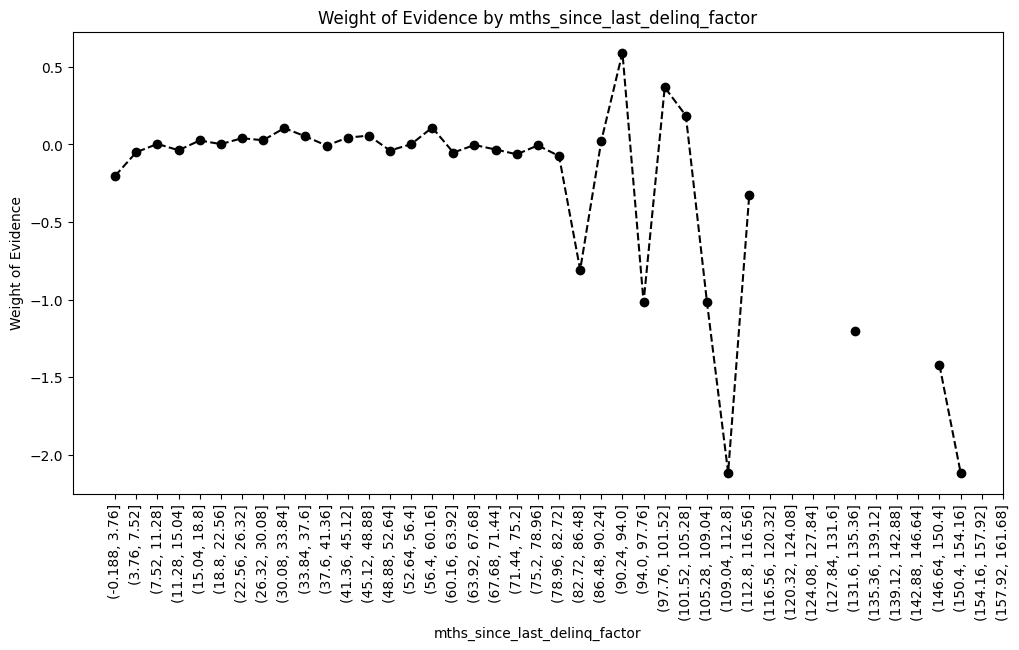

In [216]:
plot_by_woe(df_temp,90)

In [217]:
train_inputs_preprocess['mths_since_last_delinq:Missing'] = np.where(train_inputs_preprocess['mths_since_last_delinq'].isnull(), 1, 0)
train_inputs_preprocess['mths_since_last_delinq:0-3'] = np.where((train_inputs_preprocess['mths_since_last_delinq']>=0)&(train_inputs_preprocess['mths_since_last_delinq']<=3),1,0)
train_inputs_preprocess['mths_since_last_delinq:4-30'] = np.where((train_inputs_preprocess['mths_since_last_delinq']>=4)&(train_inputs_preprocess['mths_since_last_delinq']<=30),1,0)
train_inputs_preprocess['mths_since_last_delinq:31-56']= np.where((train_inputs_preprocess['mths_since_last_delinq']>=31)& (train_inputs_preprocess['mths_since_last_delinq']<=56),1,0)
train_inputs_preprocess['mths_since_last_delinq:>=57']= np.where(train_inputs_preprocess['mths_since_last_delinq']>=57,1,0)

<Axes: xlabel='dti', ylabel='Count'>

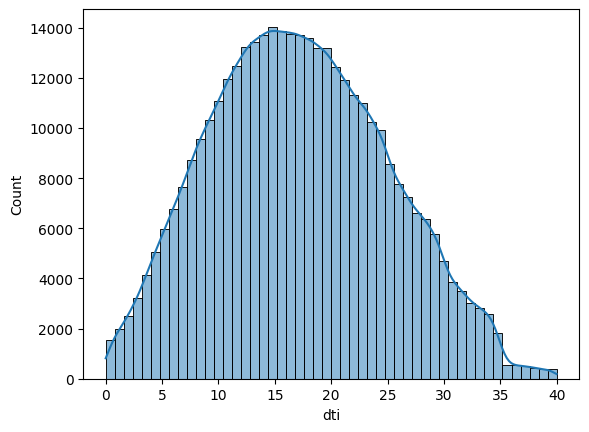

In [221]:
sns.histplot(train_inputs_preprocess['dti'], bins=50, kde=True)

In [222]:
train_inputs_preprocess['dti_factor']= pd.cut(train_inputs_preprocess['dti'],100)
df_temp= woe_continuous(train_inputs_preprocess, 'dti_factor', train_targets_preprocess)
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.4]    745   0.876510    0.001997   653.0   92.0   
1         (0.4, 0.8]    808   0.919554    0.002166   743.0   65.0   
2         (0.8, 1.2]    922   0.896963    0.002472   827.0   95.0   
3         (1.2, 1.6]   1043   0.896453    0.002796   935.0  108.0   
4         (1.6, 2.0]   1172   0.902730    0.003142  1058.0  114.0   
5       (2.0, 2.399]   1337   0.916978    0.003584  1226.0  111.0   
6     (2.399, 2.799]   1538   0.916125    0.004123  1409.0  129.0   
7     (2.799, 3.199]   1696   0.904481    0.004547  1534.0  162.0   
8     (3.199, 3.599]   1927   0.900363    0.005166  1735.0  192.0   
9     (3.599, 3.999]   2197   0.914429    0.005890  2009.0  188.0   
10    (3.999, 4.399]   2466   0.916869    0.006611  2261.0  205.0   
11    (4.399, 4.799]   2571   0.917542    0.006892  2359.0  212.0   
12    (4.799, 5.199]   2906   0.913283    0.007790  2654.0  252.0   
13    (5.199, 5.599]   3083   0.910152    0.008265  2806.0  277.0   
14    (5.599, 5.999]   3252   0.920049    0.008718  2992.0  260.0   
15    (5.999, 6.398]   3529   0.910173    0.009460  3212.0  317.0   
16    (6.398, 6.798]   3766   0.912108    0.010096  3435.0  331.0   
17    (6.798, 7.198]   3899   0.914593    0.010452  3566.0  333.0   
18    (7.198, 7.598]   4239   0.915546    0.011364  3881.0  358.0   
19    (7.598, 7.998]   4508   0.915484    0.012085  4127.0  381.0   
20    (7.998, 8.398]   4677   0.912978    0.012538  4270.0  407.0   
21    (8.398, 8.798]   4895   0.909908    0.013122  4454.0  441.0   
22    (8.798, 9.198]   5129   0.908754    0.013750  4661.0  468.0   
23    (9.198, 9.598]   5191   0.906376    0.013916  4705.0  486.0   
24    (9.598, 9.998]   5471   0.910071    0.014666  4979.0  492.0   
25   (9.998, 10.397]   5621   0.906600    0.015069  5096.0  525.0   
26  (10.397, 10.797]   5824   0.908482    0.015613  5291.0  533.0   
27  (10.797, 11.197]   6116   0.897155    0.016396  5487.0  629.0   
28  (11.197, 11.597]   6168   0.910992    0.016535  5619.0  549.0   
29  (11.597, 11.997]   6303   0.903855    0.016897  5697.0  606.0   
30  (11.997, 12.397]   6457   0.907232    0.017310  5858.0  599.0   
31  (12.397, 12.797]   6789   0.896745    0.018200  6088.0  701.0   
32  (12.797, 13.197]   6667   0.904005    0.017873  6027.0  640.0   
33  (13.197, 13.597]   6769   0.899247    0.018146  6087.0  682.0   
34  (13.597, 13.997]   6854   0.897286    0.018374  6150.0  704.0   
35  (13.997, 14.396]   6855   0.900802    0.018377  6175.0  680.0   
36  (14.396, 14.796]   7081   0.905239    0.018982  6410.0  671.0   
37  (14.796, 15.196]   6964   0.898478    0.018669  6257.0  707.0   
38  (15.196, 15.596]   6811   0.902804    0.018259  6149.0  662.0   
39  (15.596, 15.996]   7059   0.892619    0.018924  6301.0  758.0   
40  (15.996, 16.396]   6862   0.894637    0.018395  6139.0  723.0   
41  (16.396, 16.796]   6873   0.893496    0.018425  6141.0  732.0   
42  (16.796, 17.196]   6958   0.886605    0.018653  6169.0  789.0   
43  (17.196, 17.596]   6752   0.888033    0.018101  5996.0  756.0   
44  (17.596, 17.996]   6774   0.887659    0.018159  6013.0  761.0   
45  (17.996, 18.395]   6832   0.883782    0.018315  6038.0  794.0   
46  (18.395, 18.795]   6737   0.888971    0.018060  5989.0  748.0   
47  (18.795, 19.195]   6472   0.881799    0.017350  5707.0  765.0   
48  (19.195, 19.595]   6613   0.883714    0.017728  5844.0  769.0   
49  (19.595, 19.995]   6570   0.883714    0.017613  5806.0  764.0   
50  (19.995, 20.395]   6236   0.881334    0.016717  5496.0  740.0   
51  (20.395, 20.795]   6199   0.881594    0.016618  5465.0  734.0   
52  (20.795, 21.195]   5981   0.873600    0.016034  5225.0  756.0   
53  (21.195, 21.595]   5921   0.882283    0.015873  5224.0  697.0   
54  (21.595, 21.995]   5793   0.877438    0.015530  5083.0  710.0   
55  (21.995, 22.394]   5510   0.873866    0.014771  4815.0  695.0   
56  (22.394, 22.794]   5476   0.876735    0.014680  4801.0  675.0   
57  (22.

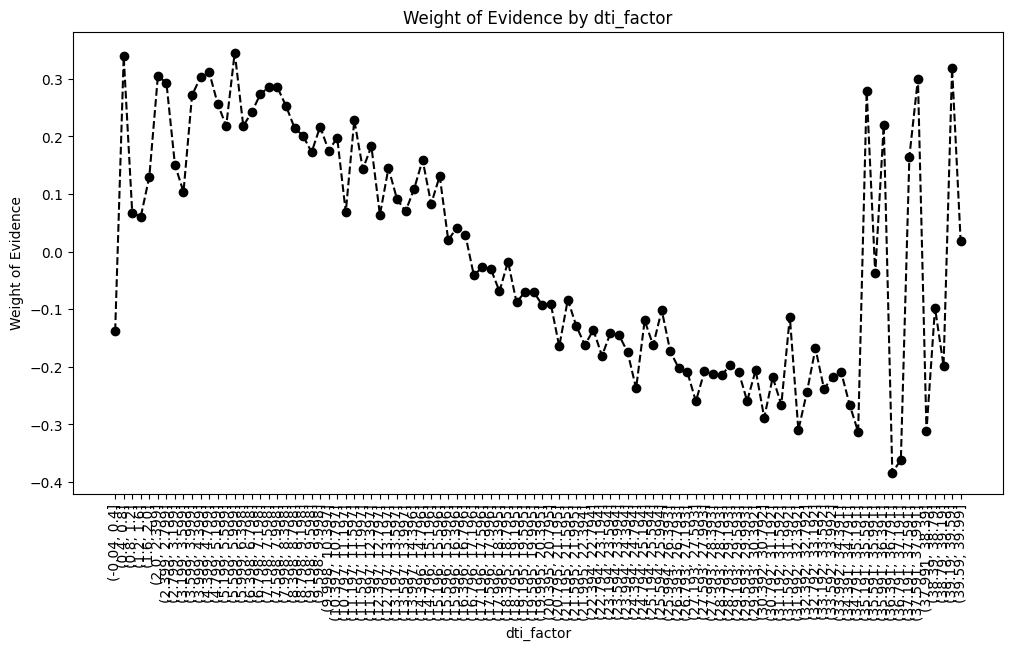

In [223]:
plot_by_woe(df_temp, 90)

In [224]:
train_inputs_preprocess['dti:<=1.4'] = np.where((train_inputs_preprocess['dti'] <= 1.4), 1, 0)
train_inputs_preprocess['dti:1.4-3.5'] = np.where((train_inputs_preprocess['dti'] > 1.4) & (train_inputs_preprocess['dti'] <= 3.5), 1, 0)
train_inputs_preprocess['dti:3.5-7.7'] = np.where((train_inputs_preprocess['dti'] > 3.5) & (train_inputs_preprocess['dti'] <= 7.7), 1, 0)
train_inputs_preprocess['dti:7.7-10.5'] = np.where((train_inputs_preprocess['dti'] > 7.7) & (train_inputs_preprocess['dti'] <= 10.5), 1, 0)
train_inputs_preprocess['dti:10.5-16.1'] = np.where((train_inputs_preprocess['dti'] > 10.5) & (train_inputs_preprocess['dti'] <= 16.1), 1, 0)
train_inputs_preprocess['dti:16.1-20.3'] = np.where((train_inputs_preprocess['dti'] > 16.1) & (train_inputs_preprocess['dti'] <= 20.3), 1, 0)
train_inputs_preprocess['dti:20.3-21.7'] = np.where((train_inputs_preprocess['dti'] > 20.3) & (train_inputs_preprocess['dti'] <= 21.7), 1, 0)
train_inputs_preprocess['dti:21.7-22.4'] = np.where((train_inputs_preprocess['dti'] > 21.7) & (train_inputs_preprocess['dti'] <= 22.4), 1, 0)
train_inputs_preprocess['dti:22.4-35'] = np.where((train_inputs_preprocess['dti'] > 22.4) & (train_inputs_preprocess['dti'] <= 35), 1, 0)
train_inputs_preprocess['dti:>35'] = np.where((train_inputs_preprocess['dti'] > 35), 1, 0)

In [225]:
train_inputs_preprocess_temp = train_inputs_preprocess[pd.notnull(train_inputs_preprocess['mths_since_last_record'])]
train_inputs_preprocess_temp['mths_since_last_record_factor'] = pd.cut(train_inputs_preprocess_temp['mths_since_last_record'], 50)
df_temp = woe_continuous(train_inputs_preprocess_temp, 'mths_since_last_record_factor', train_targets_preprocess[train_inputs_preprocess_temp.index])
df_temp

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.121, 2.42]   1086   0.764273    0.021691   830.0  256.0   
1                   (2.42, 4.84]     76   0.894737    0.001518    68.0    8.0   
2                   (4.84, 7.26]    163   0.914110    0.003256   149.0   14.0   
3                   (7.26, 9.68]    156   0.903846    0.003116   141.0   15.0   
4                   (9.68, 12.1]    292   0.907534    0.005832   265.0   27.0   
5                  (12.1, 14.52]    207   0.917874    0.004134   190.0   17.0   
6                 (14.52, 16.94]    210   0.928571    0.004194   195.0   15.0   
7                 (16.94, 19.36]    334   0.907186    0.006671   303.0   31.0   
8                 (19.36, 21.78]    283   0.936396    0.005652   265.0   18.0   
9                  (21.78, 24.2]    455   0.898901    0.009088   409.0   46.0   
10                 (24.2, 26.62]    339   0.905605    0.006771   307.0   32.0   
11                (26.62, 29.04]    612   0.900327    0.012224   551.0   61.0   
12                (29.04, 31.46]    451   0.906874    0.009008   409.0   42.0   
13                (31.46, 33.88]    487   0.921971    0.009727   449.0   38.0   
14                 (33.88, 36.3]    780   0.920513    0.015579   718.0   62.0   
15                 (36.3, 38.72]    659   0.936267    0.013162   617.0   42.0   
16                (38.72, 41.14]   1008   0.922619    0.020133   930.0   78.0   
17                (41.14, 43.56]    812   0.931034    0.016218   756.0   56.0   
18                (43.56, 45.98]    791   0.926675    0.015799   733.0   58.0   
19                 (45.98, 48.4]   1316   0.924772    0.026285  1217.0   99.0   
20                 (48.4, 50.82]    945   0.921693    0.018875   871.0   74.0   
21                (50.82, 53.24]   1536   0.908854    0.030679  1396.0  140.0   
22                (53.24, 55.66]   1062   0.912429    0.021212   969.0   93.0   
23                (55.66, 58.08]   1662   0.915764    0.033196  1522.0  140.0   
24                 (58.08, 60.5]   1095   0.914155    0.021871  1001.0   94.0   
25                 (60.5, 62.92]   1213   0.907667    0.024228  1101.0  112.0   
26                (62.92, 65.34]   1631   0.907419    0.032576  1480.0  151.0   
27                (65.34, 67.76]   1088   0.921875    0.021731  1003.0   85.0   
28                (67.76, 70.18]   1513   0.909451    0.030220  1376.0  137.0   
29                 (70.18, 72.6]   1041   0.906820    0.020792   944.0   97.0   
30                 (72.6, 75.02]   1420   0.900000    0.028362  1278.0  142.0   
31                (75.02, 77.44]    946   0.895349    0.018895   847.0   99.0   
32                (77.44, 79.86]    939   0.904153    0.018755   849.0   90.0   
33                (79.86, 82.28]   1351   0.887491    0.026984  1199.0  152.0   
34                 (82.28, 84.7]    724   0.885359    0.014461   641.0   83.0   
35                 (84.7, 87.12]   1350   0.858519    0.026964  1159.0  191.0   
36                (87.12, 89.54]    822   0.866180    0.016418   712.0  110.0   
37                (89.54, 91.96]    904   0.861726    0.018056   779.0  125.0   
38                (91.96, 94.38]   1492   0.867962    0.029800  1295.0  197.0   
39                 (94.38, 96.8]   1145   0.852402    0.022869   976.0  169.0   
40                 (96.8, 99.22]   1821   0.884130    0.036371  1610.0  211.0   
41               (99.22, 101.64]   1258   0.863275    0.025126  1086.0  172.0   
42              (101.64, 104.06]   2096   0.878340    0.041864  1841.0  255.0   
43              (104.06, 106.48]   1536   0.873047    0.030679  1341.0  195.0   
44               (106.48, 108.9]   1559   0.884541    0.031138  1379.0  180.0   
45               (108.9, 111.32]   2296   0.884146    0.045859  2030.0  266.0   
46              (111.32, 113.74]   1461   0.887064    0.029181  1296.0  165.0   
47              (113.74, 116.16]   2037   0.867943    0.040685  1768.0  269.0   
48              (116.16, 118.58]  

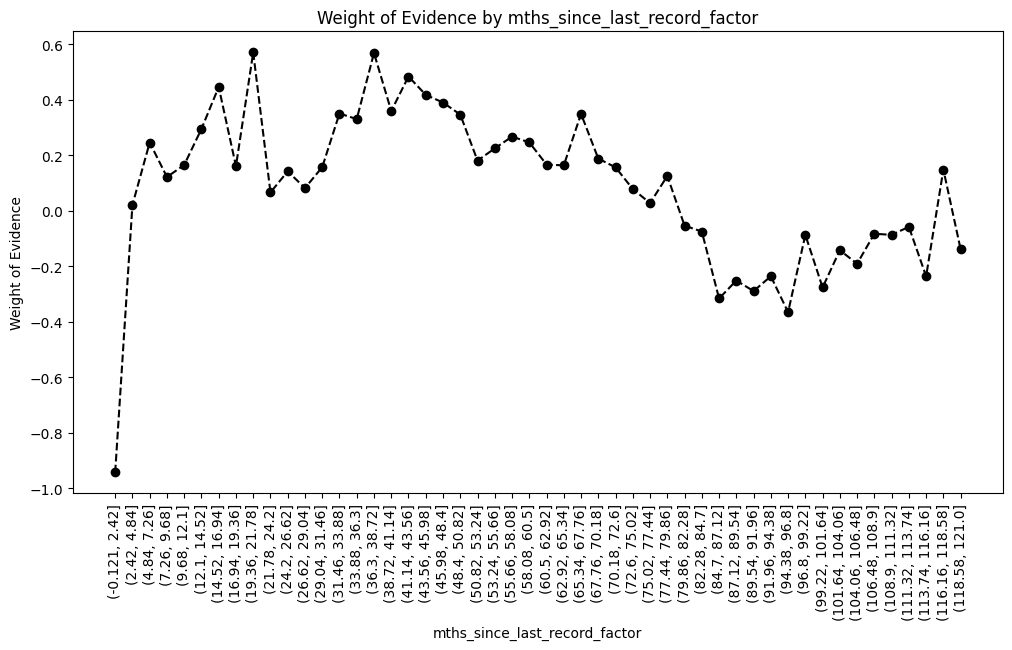

In [226]:
plot_by_woe(df_temp, 90)

In [227]:
train_inputs_preprocess['mths_since_last_record:Missing'] = np.where((train_inputs_preprocess['mths_since_last_record'].isnull()), 1, 0)
train_inputs_preprocess['mths_since_last_record:0-2'] = np.where((train_inputs_preprocess['mths_since_last_record'] >= 0) & (train_inputs_preprocess['mths_since_last_record'] <= 2), 1, 0)
train_inputs_preprocess['mths_since_last_record:3-20'] = np.where((train_inputs_preprocess['mths_since_last_record'] >= 3) & (train_inputs_preprocess['mths_since_last_record'] <= 20), 1, 0)
train_inputs_preprocess['mths_since_last_record:21-31'] = np.where((train_inputs_preprocess['mths_since_last_record'] >= 21) & (train_inputs_preprocess['mths_since_last_record'] <= 31), 1, 0)
train_inputs_preprocess['mths_since_last_record:32-80'] = np.where((train_inputs_preprocess['mths_since_last_record'] >= 32) & (train_inputs_preprocess['mths_since_last_record'] <= 80), 1, 0)
train_inputs_preprocess['mths_since_last_record:81-86'] = np.where((train_inputs_preprocess['mths_since_last_record'] >= 81) & (train_inputs_preprocess['mths_since_last_record'] <= 86), 1, 0)
train_inputs_preprocess['mths_since_last_record:>86'] = np.where((train_inputs_preprocess['mths_since_last_record'] > 86), 1, 0)

# **Doing the same on Test Dataset**

In [307]:
test_inputs_preprocess['home_ownership:RENT_OTHER_NONE_ANY'] = sum([test_inputs_preprocess['home_ownership:RENT'], test_inputs_preprocess['home_ownership:OTHER'],
                                                            test_inputs_preprocess['home_ownership:NONE'], test_inputs_preprocess['home_ownership:ANY']])
test_inputs_preprocess['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum( [test_inputs_preprocess['addr_state:NE'],
                                                         test_inputs_preprocess['addr_state:IA'], test_inputs_preprocess['addr_state:NV'],
                                                         test_inputs_preprocess['addr_state:FL'], test_inputs_preprocess['addr_state:HI'],
                                                         test_inputs_preprocess['addr_state:AL']])

test_inputs_preprocess['addr_state:NM_VA'] = sum([test_inputs_preprocess['addr_state:NM'], test_inputs_preprocess['addr_state:VA']])

test_inputs_preprocess['addr_state:OK_TN_MO_LA_MD_NC'] = sum([test_inputs_preprocess['addr_state:OK'], test_inputs_preprocess['addr_state:TN'],
                                              test_inputs_preprocess['addr_state:MO'], test_inputs_preprocess['addr_state:LA'],
                                              test_inputs_preprocess['addr_state:MD'], test_inputs_preprocess['addr_state:NC']])

test_inputs_preprocess['addr_state:UT_KY_AZ_NJ'] = sum([test_inputs_preprocess['addr_state:UT'], test_inputs_preprocess['addr_state:KY'],
                                              test_inputs_preprocess['addr_state:AZ'], test_inputs_preprocess['addr_state:NJ']])

test_inputs_preprocess['addr_state:AR_MI_PA_OH_MN'] = sum([test_inputs_preprocess['addr_state:AR'], test_inputs_preprocess['addr_state:MI'],
                                              test_inputs_preprocess['addr_state:PA'], test_inputs_preprocess['addr_state:OH'],
                                              test_inputs_preprocess['addr_state:MN']])

test_inputs_preprocess['addr_state:RI_MA_DE_SD_IN'] = sum([test_inputs_preprocess['addr_state:RI'], test_inputs_preprocess['addr_state:MA'],
                                              test_inputs_preprocess['addr_state:DE'], test_inputs_preprocess['addr_state:SD'],
                                              test_inputs_preprocess['addr_state:IN']])

test_inputs_preprocess['addr_state:GA_WA_OR'] = sum([test_inputs_preprocess['addr_state:GA'], test_inputs_preprocess['addr_state:WA'],
                                              test_inputs_preprocess['addr_state:OR']])

test_inputs_preprocess['addr_state:WI_MT'] = sum([test_inputs_preprocess['addr_state:WI'], test_inputs_preprocess['addr_state:MT']])

test_inputs_preprocess['addr_state:IL_CT'] = sum([test_inputs_preprocess['addr_state:IL'], test_inputs_preprocess['addr_state:CT']])

test_inputs_preprocess['addr_state:KS_SC_CO_VT_AK_MS'] = sum([test_inputs_preprocess['addr_state:KS'], test_inputs_preprocess['addr_state:SC'],
                                              test_inputs_preprocess['addr_state:CO'], test_inputs_preprocess['addr_state:VT'],
                                              test_inputs_preprocess['addr_state:AK'], test_inputs_preprocess['addr_state:MS']])

test_inputs_preprocess['addr_state:WV_NH_WY_DC_ME_ID'] = sum([test_inputs_preprocess['addr_state:WV'], test_inputs_preprocess['addr_state:NH'],
                                              test_inputs_preprocess['addr_state:WY'], test_inputs_preprocess['addr_state:DC'],
                                              test_inputs_preprocess['addr_state:ME'], test_inputs_preprocess['addr_state:ID']])
test_inputs_preprocess['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([test_inputs_preprocess['purpose:educational'], test_inputs_preprocess['purpose:small_business'],
                                                                 test_inputs_preprocess['purpose:wedding'], test_inputs_preprocess['purpose:renewable_energy'],
                                                                 test_inputs_preprocess['purpose:moving'], test_inputs_preprocess['purpose:house']])
test_inputs_preprocess['purpose:oth__med__vacation'] = sum([test_inputs_preprocess['purpose:other'], test_inputs_preprocess['purpose:medical'],
                                             test_inputs_preprocess['purpose:vacation']])
test_inputs_preprocess['purpose:major_purch__car__home_impr'] = sum([test_inputs_preprocess['purpose:major_purchase'], test_inputs_preprocess['purpose:car'],
                                                        test_inputs_preprocess['purpose:home_improvement']])
test_inputs_preprocess['term:36'] = np.where((test_inputs_preprocess['term'] == 36), 1, 0)
test_inputs_preprocess['term:60'] = np.where((test_inputs_preprocess['term'] == 60), 1, 0)
test_inputs_preprocess['emp_length:0']= np.where((test_inputs_preprocess['emp_length']==0), 1, 0)
test_inputs_preprocess['emp_length:1']= np.where((test_inputs_preprocess['emp_length']==1), 1, 0)
test_inputs_preprocess['emp_length:2-4']= np.where(test_inputs_preprocess['emp_length'].isin([2,3,4]), 1, 0)
test_inputs_preprocess['emp_length:5-6']= np.where(test_inputs_preprocess['emp_length'].isin([5,6]), 1, 0)
test_inputs_preprocess['emp_length:7-9']= np.where(test_inputs_preprocess['emp_length'].isin([7,8,9]), 1, 0)
test_inputs_preprocess['emp_length:10']= np.where((test_inputs_preprocess['emp_length']==10), 1, 0)
test_inputs_preprocess['months_since_issue_d<127']= np.where(test_inputs_preprocess['months_since_issue_d'].isin(range(0,127)), 1, 0)
test_inputs_preprocess['months_since_issue_d:127-134']= np.where(test_inputs_preprocess['months_since_issue_d'].isin(range(126,135)), 1, 0)
test_inputs_preprocess['months_since_issue_d:134-138']= np.where(test_inputs_preprocess['months_since_issue_d'].isin(range(134,139)), 1, 0)
test_inputs_preprocess['months_since_issue_d:138-150']= np.where(test_inputs_preprocess['months_since_issue_d'].isin(range(138,151)),1,0)
test_inputs_preprocess['months_since_issue_d:150-170']= np.where(test_inputs_preprocess['months_since_issue_d'].isin(range(150,171)),1,0)
test_inputs_preprocess['months_since_issue_d>170']= np.where(test_inputs_preprocess['months_since_issue_d'].isin(range(170, 213)),1,0)
test_inputs_preprocess['int_rate:<9.548']= np.where(test_inputs_preprocess['int_rate']<=9.548,1,0)
test_inputs_preprocess['int_rate:9.548-12.025']= np.where((test_inputs_preprocess['int_rate']>9.548)&(test_inputs_preprocess['int_rate']<=12.025),1,0)
test_inputs_preprocess['int_rate:12.025-15.74']= np.where((test_inputs_preprocess['int_rate']>12.025)&(test_inputs_preprocess['int_rate']<=15.74),1,0)
test_inputs_preprocess['int_rate:15.74-20.281']= np.where((test_inputs_preprocess['int_rate']>15.74)&(test_inputs_preprocess['int_rate']<=20.281),1,0)
test_inputs_preprocess['int_rate>20.281']= np.where(test_inputs_preprocess['int_rate']>20.281,1,0)
test_inputs_preprocess['months_since_earliest_cr_line<14']= np.where(test_inputs_preprocess['months_since_earliest_cr_line']<14, 1, 0)
test_inputs_preprocess['months_since_earliest_cr_line:14-147']= np.where(test_inputs_preprocess['months_since_earliest_cr_line']>=14 & (test_inputs_preprocess['months_since_earliest_cr_line']<147), 1, 0)
test_inputs_preprocess['months_since_earliest_cr_line:147-188']= np.where(test_inputs_preprocess['months_since_earliest_cr_line']>=147 & (test_inputs_preprocess['months_since_earliest_cr_line']<188), 1, 0)
test_inputs_preprocess['months_since_earliest_cr_line:188-228']= np.where(test_inputs_preprocess['months_since_earliest_cr_line']>=188 & (test_inputs_preprocess['months_since_earliest_cr_line']<228), 1, 0)
test_inputs_preprocess['months_since_earliest_cr_line:228-268']= np.where(test_inputs_preprocess['months_since_earliest_cr_line']>=228 & (test_inputs_preprocess['months_since_earliest_cr_line']<268), 1, 0)
test_inputs_preprocess['months_since_earliest_cr_line:268-336']= np.where(test_inputs_preprocess['months_since_earliest_cr_line']>=268 & (test_inputs_preprocess['months_since_earliest_cr_line']<336), 1, 0)
test_inputs_preprocess['months_since_earliest_crline:336-403']= np.where(test_inputs_preprocess['months_since_earliest_cr_line']>=336 & (test_inputs_preprocess['months_since_earliest_cr_line']<403), 1, 0)
test_inputs_preprocess['months_since_earliest_cr_line:403-497']= np.where(test_inputs_preprocess['months_since_earliest_cr_line']>=403 & (test_inputs_preprocess['months_since_earliest_cr_line']<497), 1, 0)
test_inputs_preprocess['months_since_earliest_crline:497-563']= np.where(test_inputs_preprocess['months_since_earliest_cr_line']>=497 & (test_inputs_preprocess['months_since_earliest_cr_line']<563),1,0)
test_inputs_preprocess['months_since_earliest_cr_line>563']= np.where(test_inputs_preprocess['months_since_earliest_cr_line']>=563,1,0)
test_inputs_preprocess['delinq_2yrs:0'] = np.where((test_inputs_preprocess['delinq_2yrs'] == 0), 1, 0)
test_inputs_preprocess['delinq_2yrs:1-3'] = np.where((test_inputs_preprocess['delinq_2yrs'] >= 1) & (test_inputs_preprocess['delinq_2yrs'] <= 3), 1, 0)
test_inputs_preprocess['delinq_2yrs:>=4'] = np.where((test_inputs_preprocess['delinq_2yrs'] >= 9), 1, 0)
test_inputs_preprocess['inq_last_6mths:0'] = np.where((test_inputs_preprocess['inq_last_6mths'] == 0), 1, 0)
test_inputs_preprocess['inq_last_6mths:1-2'] = np.where((test_inputs_preprocess['inq_last_6mths'] >= 1) & (test_inputs_preprocess['inq_last_6mths'] <= 2), 1, 0)
test_inputs_preprocess['inq_last_6mths:3-6'] = np.where((test_inputs_preprocess['inq_last_6mths'] >= 3) & (test_inputs_preprocess['inq_last_6mths'] <= 6), 1, 0)
test_inputs_preprocess['inq_last_6mths:>6'] = np.where((test_inputs_preprocess['inq_last_6mths'] > 6), 1, 0)
test_inputs_preprocess['open_acc:0'] = np.where((test_inputs_preprocess['open_acc'] == 0), 1, 0)
test_inputs_preprocess['open_acc:1-3'] = np.where((test_inputs_preprocess['open_acc'] >= 1) & (test_inputs_preprocess['open_acc'] <= 3), 1, 0)
test_inputs_preprocess['open_acc:4-12'] = np.where((test_inputs_preprocess['open_acc'] >= 4) & (test_inputs_preprocess['open_acc'] <= 12), 1, 0)
test_inputs_preprocess['open_acc:13-17'] = np.where((test_inputs_preprocess['open_acc'] >= 13) & (test_inputs_preprocess['open_acc'] <= 17), 1, 0)
test_inputs_preprocess['open_acc:18-22'] = np.where((test_inputs_preprocess['open_acc'] >= 18) & (test_inputs_preprocess['open_acc'] <= 22), 1, 0)
test_inputs_preprocess['open_acc:23-25'] = np.where((test_inputs_preprocess['open_acc'] >= 23) & (test_inputs_preprocess['open_acc'] <= 25), 1, 0)
test_inputs_preprocess['open_acc:26-30'] = np.where((test_inputs_preprocess['open_acc'] >= 26) & (test_inputs_preprocess['open_acc'] <= 30), 1, 0)
test_inputs_preprocess['open_acc:>=31'] = np.where((test_inputs_preprocess['open_acc'] >= 31), 1, 0)
test_inputs_preprocess['pub_rec:0-2'] = np.where((test_inputs_preprocess['pub_rec'] >= 0) & (test_inputs_preprocess['pub_rec'] <= 2), 1, 0)
test_inputs_preprocess['pub_rec:3-4'] = np.where((test_inputs_preprocess['pub_rec'] >= 3) & (test_inputs_preprocess['pub_rec'] <= 4), 1, 0)
test_inputs_preprocess['pub_rec:>=5'] = np.where((test_inputs_preprocess['pub_rec'] >= 5), 1, 0)
test_inputs_preprocess['total_acc:<=27'] = np.where((test_inputs_preprocess['total_acc'] <= 27), 1, 0)
test_inputs_preprocess['total_acc:28-51'] = np.where((test_inputs_preprocess['total_acc'] >= 28) & (test_inputs_preprocess['total_acc'] <= 51), 1, 0)
test_inputs_preprocess['total_acc:>=52'] = np.where((test_inputs_preprocess['total_acc'] >= 52), 1, 0)
test_inputs_preprocess['acc_now_delinq:0'] = np.where((test_inputs_preprocess['acc_now_delinq'] == 0), 1, 0)
test_inputs_preprocess['acc_now_delinq:>=1'] = np.where((test_inputs_preprocess['acc_now_delinq'] >= 1), 1, 0)
test_inputs_preprocess['total_rev_hi_lim:<=5K'] = np.where((test_inputs_preprocess['total_rev_hi_lim'] <= 5000), 1, 0)
test_inputs_preprocess['total_rev_hi_lim:5K-10K'] = np.where((test_inputs_preprocess['total_rev_hi_lim'] > 5000) & (test_inputs_preprocess['total_rev_hi_lim'] <= 10000), 1, 0)
test_inputs_preprocess['total_rev_hi_lim:10K-20K'] = np.where((test_inputs_preprocess['total_rev_hi_lim'] > 10000) & (test_inputs_preprocess['total_rev_hi_lim'] <= 20000), 1, 0)
test_inputs_preprocess['total_rev_hi_lim:20K-30K'] = np.where((test_inputs_preprocess['total_rev_hi_lim'] > 20000) & (test_inputs_preprocess['total_rev_hi_lim'] <= 30000), 1, 0)
test_inputs_preprocess['total_rev_hi_lim:30K-40K'] = np.where((test_inputs_preprocess['total_rev_hi_lim'] > 30000) & (test_inputs_preprocess['total_rev_hi_lim'] <= 40000), 1, 0)
test_inputs_preprocess['total_rev_hi_lim:40K-55K'] = np.where((test_inputs_preprocess['total_rev_hi_lim'] > 40000) & (test_inputs_preprocess['total_rev_hi_lim'] <= 55000), 1, 0)
test_inputs_preprocess['total_rev_hi_lim:55K-95K'] = np.where((test_inputs_preprocess['total_rev_hi_lim'] > 55000) & (test_inputs_preprocess['total_rev_hi_lim'] <= 95000), 1, 0)
test_inputs_preprocess['total_rev_hi_lim:>95K'] = np.where((test_inputs_preprocess['total_rev_hi_lim'] > 95000), 1, 0)
test_inputs_preprocess['annual_inc:<=20K'] = np.where(test_inputs_preprocess['annual_inc'] <= 20000, 1, 0)
test_inputs_preprocess['annual_inc:20K-30K'] = np.where((test_inputs_preprocess['annual_inc'] > 20000) & (test_inputs_preprocess['annual_inc'] <= 30000), 1, 0)
test_inputs_preprocess['annual_inc:30K-40k']= np.where((test_inputs_preprocess['annual_inc']>30000)& (test_inputs_preprocess['annual_inc']<=40000),1,0)
test_inputs_preprocess['annual_inc:40K-50K']= np.where((test_inputs_preprocess['annual_inc']>40000)& (test_inputs_preprocess['annual_inc']<=50000),1,0)
test_inputs_preprocess['annual_inc:50K-60K']= np.where((test_inputs_preprocess['annual_inc']>50000)& (test_inputs_preprocess['annual_inc']<=60000),1,0)
test_inputs_preprocess['annual_inc:60K-70K']= np.where((test_inputs_preprocess['annual_inc']>60000)& (test_inputs_preprocess['annual_inc']<=70000),1,0)
test_inputs_preprocess['annual_inc:70K-80K']= np.where((test_inputs_preprocess['annual_inc']>70000)& (test_inputs_preprocess['annual_inc']<=80000),1,0)
test_inputs_preprocess['annual_inc:80K-90K']= np.where((test_inputs_preprocess['annual_inc']>80000)& (test_inputs_preprocess['annual_inc']<=90000),1,0)
test_inputs_preprocess['annual_inc:90K-100K']= np.where((test_inputs_preprocess['annual_inc']>90000)& (test_inputs_preprocess['annual_inc']<=100000),1,0)
test_inputs_preprocess['annual_inc:100k-120k']= np.where((test_inputs_preprocess['annual_inc']>100000) & test_inputs_preprocess['annual_inc']<=120000,1,0)
test_inputs_preprocess['annual_inc:120k-140k']= np.where((test_inputs_preprocess['annual_inc']>120000) & test_inputs_preprocess['annual_inc']<=140000,1,0)
test_inputs_preprocess['annual_inc:>140K']= np.where(test_inputs_preprocess['annual_inc']>140000,1,0)
test_inputs_preprocess['mths_since_last_delinq:Missing'] = np.where(test_inputs_preprocess['mths_since_last_delinq'].isnull(), 1, 0)
test_inputs_preprocess['mths_since_last_delinq:0-3'] = np.where((test_inputs_preprocess['mths_since_last_delinq']>=0)&(test_inputs_preprocess['mths_since_last_delinq']<=3),1,0)
test_inputs_preprocess['mths_since_last_delinq:4-30'] = np.where((test_inputs_preprocess['mths_since_last_delinq']>=4)&(test_inputs_preprocess['mths_since_last_delinq']<=30),1,0)
test_inputs_preprocess['mths_since_last_delinq:31-56']= np.where((test_inputs_preprocess['mths_since_last_delinq']>=31)& (test_inputs_preprocess['mths_since_last_delinq']<=56),1,0)
test_inputs_preprocess['mths_since_last_delinq:>=57']= np.where(test_inputs_preprocess['mths_since_last_delinq']>=57,1,0)
test_inputs_preprocess['dti:<=1.4'] = np.where((test_inputs_preprocess['dti'] <= 1.4), 1, 0)
test_inputs_preprocess['dti:1.4-3.5'] = np.where((test_inputs_preprocess['dti'] > 1.4) & (test_inputs_preprocess['dti'] <= 3.5), 1, 0)
test_inputs_preprocess['dti:3.5-7.7'] = np.where((test_inputs_preprocess['dti'] > 3.5) & (test_inputs_preprocess['dti'] <= 7.7), 1, 0)
test_inputs_preprocess['dti:7.7-10.5'] = np.where((test_inputs_preprocess['dti'] > 7.7) & (test_inputs_preprocess['dti'] <= 10.5), 1, 0)
test_inputs_preprocess['dti:10.5-16.1'] = np.where((test_inputs_preprocess['dti'] > 10.5) & (test_inputs_preprocess['dti'] <= 16.1), 1, 0)
test_inputs_preprocess['dti:16.1-20.3'] = np.where((test_inputs_preprocess['dti'] > 16.1) & (test_inputs_preprocess['dti'] <= 20.3), 1, 0)
test_inputs_preprocess['dti:20.3-21.7'] = np.where((test_inputs_preprocess['dti'] > 20.3) & (test_inputs_preprocess['dti'] <= 21.7), 1, 0)
test_inputs_preprocess['dti:21.7-22.4'] = np.where((test_inputs_preprocess['dti'] > 21.7) & (test_inputs_preprocess['dti'] <= 22.4), 1, 0)
test_inputs_preprocess['dti:22.4-35'] = np.where((test_inputs_preprocess['dti'] > 22.4) & (test_inputs_preprocess['dti'] <= 35), 1, 0)
test_inputs_preprocess['dti:>35'] = np.where((test_inputs_preprocess['dti'] > 35), 1, 0)
test_inputs_preprocess['mths_since_last_record:Missing'] = np.where((test_inputs_preprocess['mths_since_last_record'].isnull()), 1, 0)
test_inputs_preprocess['mths_since_last_record:0-2'] = np.where((test_inputs_preprocess['mths_since_last_record'] >= 0) & (test_inputs_preprocess['mths_since_last_record'] <= 2), 1, 0)
test_inputs_preprocess['mths_since_last_record:3-20'] = np.where((test_inputs_preprocess['mths_since_last_record'] >= 3) & (test_inputs_preprocess['mths_since_last_record'] <= 20), 1, 0)
test_inputs_preprocess['mths_since_last_record:21-31'] = np.where((test_inputs_preprocess['mths_since_last_record'] >= 21) & (test_inputs_preprocess['mths_since_last_record'] <= 31), 1, 0)
test_inputs_preprocess['mths_since_last_record:32-80'] = np.where((test_inputs_preprocess['mths_since_last_record'] >= 32) & (test_inputs_preprocess['mths_since_last_record'] <= 80), 1, 0)
test_inputs_preprocess['mths_since_last_record:81-86'] = np.where((test_inputs_preprocess['mths_since_last_record'] >= 81) & (test_inputs_preprocess['mths_since_last_record'] <= 86), 1, 0)
test_inputs_preprocess['mths_since_last_record:>86'] = np.where((test_inputs_preprocess['mths_since_last_record'] > 86), 1, 0)


In [308]:
print(train_inputs_preprocess.shape)
print(test_inputs_preprocess.shape)
print(train_targets_preprocess.shape)
print(test_targets_preprocess.shape)

(373028, 321)
(93257, 311)
(373028,)
(93257,)


# **PD Model Estimation**

In [283]:
ref_categories=['grade:G','home_ownership:RENT_OTHER_NONE_ANY','addr_state:ND_NE_IA_NV_FL_HI_AL','purpose:educ__sm_b__wedd__ren_en__mov__house',
                'initial_list_status:f', 'months_since_earliest_cr_line:14-147',
                'term:60','emp_length:0','months_since_issue_d>170','int_rate>20.281','delinq_2yrs:>=4','inq_last_6mths:>6',
               'open_acc:0','pub_rec:0-2','total_acc:<=27','acc_now_delinq:0', 'total_rev_hi_lim:<=5K', 'annual_inc:<=20K', 'dti:>35',
                'mths_since_last_record:0-2','mths_since_last_delinq:0-3' ]

In [284]:
x_train_dummy_categories= train_inputs_preprocess.loc[:, ['grade:A', 'grade:B', 'grade:C',
       'grade:D', 'grade:E', 'grade:F', 'grade:G','home_ownership:RENT_OTHER_NONE_ANY','home_ownership:MORTGAGE','home_ownership:OWN',
                                                  'addr_state:ND_NE_IA_NV_FL_HI_AL',
       'addr_state:NM_VA', 'addr_state:OK_TN_MO_LA_MD_NC',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID', 'purpose:educ__sm_b__wedd__ren_en__mov__house',
       'purpose:oth__med__vacation',
       'purpose:major_purch__car__home_impr', 'term:36', 'term:60', 'emp_length:0', 'emp_length:1', 'emp_length:2-4', 'emp_length:5-6',
       'emp_length:7-9', 'emp_length:10',
       'months_since_issue_d<127', 'months_since_issue_d:127-134',
       'months_since_issue_d:134-138', 'months_since_issue_d:138-150',
       'months_since_issue_d:150-170', 'months_since_issue_d>170', 'int_rate:<9.548', 'int_rate:9.548-12.025',
       'int_rate:12.025-15.74', 'int_rate:15.74-20.281',
       'int_rate>20.281','delinq_2yrs:0',
       'delinq_2yrs:1-3', 'delinq_2yrs:>=4','inq_last_6mths:0',
       'inq_last_6mths:1-2', 'inq_last_6mths:3-6', 'inq_last_6mths:>6','open_acc:0', 'open_acc:1-3', 'open_acc:4-12', 'open_acc:13-17',
       'open_acc:18-22', 'open_acc:23-25', 'open_acc:26-30',
       'open_acc:>=31','pub_rec:0-2', 'pub_rec:3-4', 'pub_rec:>=5', 'total_acc:<=27', 'total_acc:28-51',
       'total_acc:>=52','acc_now_delinq:0', 'acc_now_delinq:>=1', 'total_rev_hi_lim:<=5K',
       'total_rev_hi_lim:5K-10K', 'total_rev_hi_lim:10K-20K',
       'total_rev_hi_lim:20K-30K', 'total_rev_hi_lim:30K-40K',
       'total_rev_hi_lim:40K-55K', 'total_rev_hi_lim:55K-95K',
       'total_rev_hi_lim:>95K','annual_inc:<=20K', 'annual_inc:20K-30K', 'annual_inc:30K-40k',
       'annual_inc:40K-50K', 'annual_inc:50K-60K', 'annual_inc:60K-70K',
       'annual_inc:70K-80K', 'annual_inc:80K-90K', 'annual_inc:90K-100K',
       'annual_inc:100k-120k', 'annual_inc:120k-140k', 'annual_inc:>140K','mths_since_last_delinq:Missing', 'mths_since_last_delinq:0-3',
       'mths_since_last_delinq:4-30', 'mths_since_last_delinq:31-56',
       'mths_since_last_delinq:>=57', 'dti:<=1.4',
       'dti:1.4-3.5', 'dti:3.5-7.7', 'dti:7.7-10.5', 'dti:10.5-16.1',
       'dti:16.1-20.3', 'dti:20.3-21.7', 'dti:21.7-22.4', 'dti:22.4-35',
       'dti:>35', 'mths_since_last_record:Missing',
       'mths_since_last_record:0-2', 'mths_since_last_record:3-20',
       'mths_since_last_record:21-31', 'mths_since_last_record:32-80',
       'mths_since_last_record:81-86', 'mths_since_last_record:>86',
       'months_since_earliest_cr_line<14',
       'months_since_earliest_cr_line:14-147',
       'months_since_earliest_cr_line:147-188',
       'months_since_earliest_cr_line:188-228',
       'months_since_earliest_cr_line:228-268',
       'months_since_earliest_cr_line:268-336',
       'months_since_earliest_crline:336-403',
       'months_since_earliest_cr_line:403-497',
       'months_since_earliest_crline:497-563',
       'months_since_earliest_cr_line>563', 'initial_list_status:f', 'initial_list_status:w'
      ]]

In [285]:
x_train_dummy_categories.drop(ref_categories, axis=1, inplace=True)


In [286]:
x_train_dummy_categories.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
427211        1        0        0        0        0        0   
206088        0        0        1        0        0        0   
136020        1        0        0        0        0        0   
412305        0        0        0        1        0        0   
36159         0        0        1        0        0        0   

        home_ownership:MORTGAGE  home_ownership:OWN  addr_state:NM_VA  \
427211                        1                   0                 0   
206088                        1                   0                 0   
136020                        1                   0                 0   
412305                        0                   0                 0   
36159                         1                   0                 0   

        addr_state:OK_TN_MO_LA_MD_NC  addr_state:UT_KY_AZ_NJ  \
427211                             0                       0   
206088                             0                       1   
136020                             0                       0   
412305                             0                       0   
36159                              0                       0   

        addr_state:AR_MI_PA_OH_MN  addr_state:RI_MA_DE_SD_IN  \
427211                          0                          0   
206088                          0                          0   
136020                          0                          0   
412305                          0                          1   
36159                           0                          0   

        addr_state:GA_WA_OR  addr_state:WI_MT  addr_state:IL_CT  \
427211                    0                 0                 0   
206088                    0                 0                 0   
136020                    1                 0                 0   
412305                    0                 0                 0   
36159                     0                 0                 0   

        addr_state:KS_SC_CO_VT_AK_MS  addr_state:WV_NH_WY_DC_ME_ID  \
427211                             1                             0   
206088                             0                             0   
136020                             0                             0   
412305                             0                             0   
36159                              0                             0   

        purpose:oth__med__vacation  purpose:major_purch__car__home_impr  \
427211                           0                                    0   
206088                           0                                    0   
136020                           0                                    0   
412305                           0                                    0   
36159                            0                                    0   

        term:36  emp_length:1  emp_length:2-4  emp_length:5-6  emp_length:7-9  \
427211        1             0               1               0               0   
206088        1             0               0               1               0   
136020        1             0               0               0               0   
412305        1             0               0               0               1   
36159         1             0               0               1               0   

        emp_length:10  months_since_issue_d<127  months_since_issue_d:127-134  \
427211              0                         0                             1   
206088              0                         0                             0   
136020              1                         0                             0   
412305              0                         0                             1   
36159               0                         0                             0   

        months_since_issue_d:134-138  months_since_issue_d:138-150  \
427211                             0                             0   
206088                   

# **Logistic Regression**

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [290]:
reg= LogisticRegression()

In [291]:
print(x_train_dummy_categories.shape)
print(train_targets_preprocess.shape)

(373028, 99)
(373028,)


In [292]:
reg.fit(x_train_dummy_categories, train_targets_preprocess)

LogisticRegression()

In [293]:
reg.intercept_

array([-0.20736319])

In [294]:
reg.coef_

array([[ 0.99646773,  0.96393195,  0.76395476,  0.55584505,  0.35031215,
         0.15254973,  0.11688832,  0.1004128 , -0.0530707 , -0.01496366,
        -0.00346198,  0.06300493,  0.02738162,  0.10723332,  0.13796354,
         0.18829202,  0.25111618,  0.40103797,  0.00251601,  0.05346054,
         0.09100783,  0.10154691,  0.12595559,  0.09375307,  0.06922563,
         0.13776908,  0.49486323,  0.17312478,  0.05589629, -0.15318613,
        -0.3489966 ,  1.05223068,  0.51933092,  0.26859845,  0.0908523 ,
        -0.10095705, -0.11727848,  0.44495994,  0.29702791,  0.05467669,
         0.07267207, -0.00483078, -0.03626653, -0.05427658, -0.04394748,
         0.00620558, -0.06335114,  0.17507235,  0.118832  , -0.01704611,
         0.04571341,  0.24113531,  0.08994481,  0.08322902,  0.0966894 ,
         0.12970264,  0.15375835,  0.18189885,  0.32950271, -0.13010128,
        -0.06537085,  0.03244113,  0.09645345,  0.17268096,  0.24056987,
         0.31603913,  0.32748919,  0.40614668,  0.4

In [295]:
feature_names= x_train_dummy_categories.columns.values

In [296]:
summary_table= pd.DataFrame(columns=['Feature Names'], data= feature_names)
summary_table['Coefficient']= np.transpose(reg.coef_)
summary_table.index= summary_table.index+1
summary_table.loc[0]= ['Intercept', reg.intercept_[0]]
summary_table= summary_table.sort_index()
summary_table

Feature Names  Coefficient
0                               Intercept    -0.207363
1                                 grade:A     0.996468
2                                 grade:B     0.963932
3                                 grade:C     0.763955
4                                 grade:D     0.555845
5                                 grade:E     0.350312
6                                 grade:F     0.152550
7                 home_ownership:MORTGAGE     0.116888
8                      home_ownership:OWN     0.100413
9                        addr_state:NM_VA    -0.053071
10           addr_state:OK_TN_MO_LA_MD_NC    -0.014964
11                 addr_state:UT_KY_AZ_NJ    -0.003462
12              addr_state:AR_MI_PA_OH_MN     0.063005
13              addr_state:RI_MA_DE_SD_IN     0.027382
14                    addr_state:GA_WA_OR     0.107233
15                       addr_state:WI_MT     0.137964
16                       addr_state:IL_CT     0.188292
17           addr_state:KS_SC_CO_VT_AK_MS     0.251116
18           addr_state:WV_NH_WY_DC_ME_ID     0.401038
19             purpose:oth__med__vacation     0.002516
20    purpose:major_purch__car__home_impr     0.053461
21                                term:36     0.091008
22                           emp_length:1     0.101547
23                         emp_length:2-4     0.125956
24                         emp_length:5-6     0.093753
25                         emp_length:7-9     0.069226
26                          emp_length:10     0.137769
27               months_since_issue_d<127     0.494863
28           months_since_issue_d:127-134     0.173125
29           months_since_issue_d:134-138     0.055896
30           months_since_issue_d:138-150    -0.153186
31           months_since_issue_d:150-170    -0.348997
32                        int_rate:<9.548     1.052231
33                  int_rate:9.548-12.025     0.519331
34                  int_rate:12.025-15.74     0.268598
35                  int_rate:15.74-20.281     0.090852
36                          delinq_2yrs:0    -0.100957
37                        delinq_2yrs:1-3    -0.117278
38                       inq_last_6mths:0     0.444960
39                     inq_last_6mths:1-2     0.297028
40                     inq_last_6mths:3-6     0.054677
41                           open_acc:1-3     0.072672
42                          open_acc:4-12    -0.004831
43                         open_acc:13-17    -0.036267
44                         open_acc:18-22    -0.054277
45                         open_acc:23-25    -0.043947
46                         open_acc:26-30     0.006206
47                          open_acc:>=31    -0.063351
48                            pub_rec:3-4     0.175072
49                            pub_rec:>=5     0.118832
50                        total_acc:28-51    -0.017046
51                         total_acc:>=52     0.045713
52                     acc_now_delinq:>=1     0.241135
53                total_rev_hi_lim:5K-10K     0.089945
54               total_rev_hi_lim:10K-20K     0.083229
55               total_rev_hi_lim:20K-30K     0.096689
56               total_rev_hi_lim:30K-40K     0.129703
57               total_rev_hi_lim:40K-55K     0.153758
58               total_rev_hi_lim:55K-95K     0.181899
59                  total_rev_hi_lim:>95K     0.329503
60                     annual_inc:20K-30K    -0.130101
61                     annual_inc:30K-40k    -0.065371
62                     annual_inc:40K-50K     0.032441
63                     annual_inc:50K-60K     0.096453
64                     annual_inc:60K-70K     0.172681
65                     annual_inc:70K-80K     0.240570
66                     annual_inc:80K-90K     0.316039
67                    annual_inc:90K-100K     0.327489
68                   annual_inc:100k-120k     0.406147
69                   annual_inc:120k-140k     0.496315
70                       annual_inc:>140K     0.424482
71         mths_since_last_delinq:Missing     0.121155
72           

# **Logistic Regression with p-Values**

In [297]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:

    def __init__(self,*args, **kwargs):
        self.model= linear_model.LogisticRegression(*args, **kwargs)
    def fit(self, X,y):
      self.model.fit(X,y)
      denom= (2.0*(1.0+np.cosh(self.model.decision_function(X))))
      denom= np.tile(denom, (X.shape[1],1)).T
      F_ij= np.dot((X/denom).T,X)
      Cramer_Rao= np.linalg.inv(F_ij)
      sigma_estimates= np.sqrt(np.diagonal(Cramer_Rao))
      z_scores= self.model.coef_[0]/ sigma_estimates
      p_values= [stat.norm.sf(abs(x))*2 for x in z_scores]
      self.coef_= self.model.coef_
      self.intercept_=self.model.intercept_
      self.p_values= p_values

In [298]:
reg1= LogisticRegression_with_p_values()

In [299]:
reg1.fit(x_train_dummy_categories, train_targets_preprocess)

In [300]:
p_Values = reg1.p_values

In [301]:
p_Values= np.append(np.nan, np.array(p_Values))

In [302]:
summary_table['p_values']= p_Values

In [303]:
summary_table

Feature Names  Coefficient       p_values
0                               Intercept    -0.207363            NaN
1                                 grade:A     0.996468   1.486955e-26
2                                 grade:B     0.963932   1.236764e-56
3                                 grade:C     0.763955   1.354301e-41
4                                 grade:D     0.555845   6.030991e-25
5                                 grade:E     0.350312   3.943553e-13
6                                 grade:F     0.152550   2.442708e-03
7                 home_ownership:MORTGAGE     0.116888   8.463353e-21
8                      home_ownership:OWN     0.100413   5.632966e-07
9                        addr_state:NM_VA    -0.053071   6.562392e-02
10           addr_state:OK_TN_MO_LA_MD_NC    -0.014964   4.243115e-01
11                 addr_state:UT_KY_AZ_NJ    -0.003462   8.672101e-01
12              addr_state:AR_MI_PA_OH_MN     0.063005   4.580043e-04
13              addr_state:RI_MA_DE_SD_IN     0.027382   3.011336e-01
14                    addr_state:GA_WA_OR     0.107233   2.749818e-06
15                       addr_state:WI_MT     0.137964   2.185858e-03
16                       addr_state:IL_CT     0.188292   2.573285e-13
17           addr_state:KS_SC_CO_VT_AK_MS     0.251116   1.215862e-19
18           addr_state:WV_NH_WY_DC_ME_ID     0.401038   2.079984e-15
19             purpose:oth__med__vacation     0.002516   9.025948e-01
20    purpose:major_purch__car__home_impr     0.053461   8.634804e-03
21                                term:36     0.091008   5.904913e-11
22                           emp_length:1     0.101547   8.593267e-05
23                         emp_length:2-4     0.125956   2.017910e-11
24                         emp_length:5-6     0.093753   1.099235e-05
25                         emp_length:7-9     0.069226   8.302605e-04
26                          emp_length:10     0.137769   5.951630e-14
27               months_since_issue_d<127     0.494863  4.155247e-146
28           months_since_issue_d:127-134     0.173125   9.852295e-24
29           months_since_issue_d:134-138     0.055896   2.237537e-03
30           months_since_issue_d:138-150    -0.153186   1.868155e-16
31           months_since_issue_d:150-170    -0.348997   4.605693e-60
32                        int_rate:<9.548     1.052231   2.836114e-40
33                  int_rate:9.548-12.025     0.519331   4.533797e-32
34                  int_rate:12.025-15.74     0.268598   1.505815e-13
35                  int_rate:15.74-20.281     0.090852   1.723430e-03
36                          delinq_2yrs:0    -0.100957   8.914714e-02
37                        delinq_2yrs:1-3    -0.117278   3.680589e-02
38                       inq_last_6mths:0     0.444960   4.181162e-04
39                     inq_last_6mths:1-2     0.297028   1.837356e-02
40                     inq_last_6mths:3-6     0.054677   6.655452e-01
41                           open_acc:1-3     0.072672   9.503896e-01
42                          open_acc:4-12    -0.004831   9.966993e-01
43                         open_acc:13-17    -0.036267   9.752264e-01
44                         open_acc:18-22    -0.054277   9.629358e-01
45                         open_acc:23-25    -0.043947   9.700026e-01
46                         open_acc:26-30     0.006206   9.957662e-01
47                          open_acc:>=31    -0.063351   9.568822e-01
48                            pub_rec:3-4     0.175072   6.774417e-02
49                            pub_rec:>=5     0.118832   5.222245e-01
50                        total_acc:28-51    -0.017046   2.296337e-01
51                         total_acc:>=52     0.045713   2.517570e-01
52                     acc_now_delinq:>=1     0.241135   2.372886e-02
53                total_rev_hi_lim:5K-10K     0.089945   2.302991e-04
54               total_rev_hi_lim:10K-20K     0.083229   3.847139e-04
55               total_rev_hi_lim:20K-30K     0.096689   1.615257e-04
56               total_rev_hi_lim:30K-

In [304]:
summary_table_significant= summary_table[abs(summary_table['p_values'])<0.05]

In [305]:
summary_table_significant.sort_values('Coefficient', ascending=False)

Feature Names  Coefficient       p_values
32                      int_rate:<9.548     1.052231   2.836114e-40
1                               grade:A     0.996468   1.486955e-26
2                               grade:B     0.963932   1.236764e-56
3                               grade:C     0.763955   1.354301e-41
4                               grade:D     0.555845   6.030991e-25
33                int_rate:9.548-12.025     0.519331   4.533797e-32
69                 annual_inc:120k-140k     0.496315   3.231744e-20
27             months_since_issue_d<127     0.494863  4.155247e-146
87         mths_since_last_record:32-80     0.448701   1.923487e-06
38                     inq_last_6mths:0     0.444960   4.181162e-04
70                     annual_inc:>140K     0.424482   2.498863e-17
68                 annual_inc:100k-120k     0.406147   1.684539e-17
18         addr_state:WV_NH_WY_DC_ME_ID     0.401038   2.079984e-15
5                               grade:E     0.350312   3.943553e-13
59                total_rev_hi_lim:>95K     0.329503   4.511449e-09
85          mths_since_last_record:3-20     0.328814   1.107292e-02
67                  annual_inc:90K-100K     0.327489   8.807472e-12
66                   annual_inc:80K-90K     0.316039   9.870420e-12
39                   inq_last_6mths:1-2     0.297028   1.837356e-02
86         mths_since_last_record:21-31     0.269159   2.429728e-02
34                int_rate:12.025-15.74     0.268598   1.505815e-13
17         addr_state:KS_SC_CO_VT_AK_MS     0.251116   1.215862e-19
84       mths_since_last_record:Missing     0.247910   6.361828e-03
52                   acc_now_delinq:>=1     0.241135   2.372886e-02
65                   annual_inc:70K-80K     0.240570   7.078315e-08
73         mths_since_last_delinq:31-56     0.214706   2.565757e-04
77                          dti:3.5-7.7     0.192970   3.878641e-03
16                     addr_state:IL_CT     0.188292   2.573285e-13
58             total_rev_hi_lim:55K-95K     0.181899   2.677889e-07
72          mths_since_last_delinq:4-30     0.179800   7.254660e-04
28         months_since_issue_d:127-134     0.173125   9.852295e-24
64                   annual_inc:60K-70K     0.172681   7.896564e-05
74          mths_since_last_delinq:>=57     0.166692   5.368389e-03
57             total_rev_hi_lim:40K-55K     0.153758   1.043071e-06
6                               grade:F     0.152550   2.442708e-03
78                         dti:7.7-10.5     0.138094   3.721724e-02
15                     addr_state:WI_MT     0.137964   2.185858e-03
26                        emp_length:10     0.137769   5.951630e-14
56             total_rev_hi_lim:30K-40K     0.129703   6.633593e-06
23                       emp_length:2-4     0.125956   2.017910e-11
71       mths_since_last_delinq:Missing     0.121155   3.561927e-02
7               home_ownership:MORTGAGE     0.116888   8.463353e-21
14                  addr_state:GA_WA_OR     0.107233   2.749818e-06
22                         emp_length:1     0.101547   8.593267e-05
8                    home_ownership:OWN     0.100413   5.632966e-07
55             total_rev_hi_lim:20K-30K     0.096689   1.615257e-04
63                   annual_inc:50K-60K     0.096453   2.403843e-02
24                       emp_length:5-6     0.093753   1.099235e-05
21                              term:36     0.091008   5.904913e-11
35                int_rate:15.74-20.281     0.090852   1.723430e-03
53              total_rev_hi_lim:5K-10K     0.089945   2.302991e-04
99                initial_list_status:w     0.088363   6.928929e-12
54             total_rev_hi_lim:10K-20K     0.083229   3.847139e-04
25                       emp_length:7-9     0.069226   8.302605e-04
12            addr_state:AR_MI_PA_OH_MN     0.063005   4.580043e-04
29         months_since_issue_d:134-138     0.055896   2.237537e-03
20  purpose:major_purch__car__home_impr     0.053461   8.634804e-03
37                      delinq_2yrs:1-3    -0.117278   3.680589e-02
60            

# **PD Model Validation**

In [309]:
ref_categories=['grade:G','home_ownership:RENT_OTHER_NONE_ANY','addr_state:ND_NE_IA_NV_FL_HI_AL','purpose:educ__sm_b__wedd__ren_en__mov__house',
                'initial_list_status:f', 'months_since_earliest_cr_line:14-147',
                'term:60','emp_length:0','months_since_issue_d>170','int_rate>20.281','delinq_2yrs:>=4','inq_last_6mths:>6',
               'open_acc:0','pub_rec:0-2','total_acc:<=27','acc_now_delinq:0', 'total_rev_hi_lim:<=5K', 'annual_inc:<=20K', 'dti:>35',
                'mths_since_last_record:0-2','mths_since_last_delinq:0-3' ]

In [310]:
x_test_dummy_categories= test_inputs_preprocess.loc[:, ['grade:A', 'grade:B', 'grade:C',
       'grade:D', 'grade:E', 'grade:F', 'grade:G','home_ownership:RENT_OTHER_NONE_ANY','home_ownership:MORTGAGE','home_ownership:OWN',
                                                  'addr_state:ND_NE_IA_NV_FL_HI_AL',
       'addr_state:NM_VA', 'addr_state:OK_TN_MO_LA_MD_NC',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID', 'purpose:educ__sm_b__wedd__ren_en__mov__house',
       'purpose:oth__med__vacation',
       'purpose:major_purch__car__home_impr', 'term:36', 'term:60', 'emp_length:0', 'emp_length:1', 'emp_length:2-4', 'emp_length:5-6',
       'emp_length:7-9', 'emp_length:10',
       'months_since_issue_d<127', 'months_since_issue_d:127-134',
       'months_since_issue_d:134-138', 'months_since_issue_d:138-150',
       'months_since_issue_d:150-170', 'months_since_issue_d>170', 'int_rate:<9.548', 'int_rate:9.548-12.025',
       'int_rate:12.025-15.74', 'int_rate:15.74-20.281',
       'int_rate>20.281','delinq_2yrs:0',
       'delinq_2yrs:1-3', 'delinq_2yrs:>=4','inq_last_6mths:0',
       'inq_last_6mths:1-2', 'inq_last_6mths:3-6', 'inq_last_6mths:>6','open_acc:0', 'open_acc:1-3', 'open_acc:4-12', 'open_acc:13-17',
       'open_acc:18-22', 'open_acc:23-25', 'open_acc:26-30',
       'open_acc:>=31','pub_rec:0-2', 'pub_rec:3-4', 'pub_rec:>=5', 'total_acc:<=27', 'total_acc:28-51',
       'total_acc:>=52','acc_now_delinq:0', 'acc_now_delinq:>=1', 'total_rev_hi_lim:<=5K',
       'total_rev_hi_lim:5K-10K', 'total_rev_hi_lim:10K-20K',
       'total_rev_hi_lim:20K-30K', 'total_rev_hi_lim:30K-40K',
       'total_rev_hi_lim:40K-55K', 'total_rev_hi_lim:55K-95K',
       'total_rev_hi_lim:>95K','annual_inc:<=20K', 'annual_inc:20K-30K', 'annual_inc:30K-40k',
       'annual_inc:40K-50K', 'annual_inc:50K-60K', 'annual_inc:60K-70K',
       'annual_inc:70K-80K', 'annual_inc:80K-90K', 'annual_inc:90K-100K',
       'annual_inc:100k-120k', 'annual_inc:120k-140k', 'annual_inc:>140K','mths_since_last_delinq:Missing', 'mths_since_last_delinq:0-3',
       'mths_since_last_delinq:4-30', 'mths_since_last_delinq:31-56',
       'mths_since_last_delinq:>=57', 'dti:<=1.4',
       'dti:1.4-3.5', 'dti:3.5-7.7', 'dti:7.7-10.5', 'dti:10.5-16.1',
       'dti:16.1-20.3', 'dti:20.3-21.7', 'dti:21.7-22.4', 'dti:22.4-35',
       'dti:>35', 'mths_since_last_record:Missing',
       'mths_since_last_record:0-2', 'mths_since_last_record:3-20',
       'mths_since_last_record:21-31', 'mths_since_last_record:32-80',
       'mths_since_last_record:81-86', 'mths_since_last_record:>86',
       'months_since_earliest_cr_line<14',
       'months_since_earliest_cr_line:14-147',
       'months_since_earliest_cr_line:147-188',
       'months_since_earliest_cr_line:188-228',
       'months_since_earliest_cr_line:228-268',
       'months_since_earliest_cr_line:268-336',
       'months_since_earliest_crline:336-403',
       'months_since_earliest_cr_line:403-497',
       'months_since_earliest_crline:497-563',
       'months_since_earliest_cr_line>563', 'initial_list_status:f', 'initial_list_status:w'
      ]]

In [311]:
x_test_dummy_categories.drop(ref_categories, axis=1, inplace=True)

In [312]:
x_test_dummy_categories.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514        0        0        1        0        0        0   
288564        0        0        0        0        1        0   
213591        0        0        1        0        0        0   
263083        0        0        1        0        0        0   
165001        1        0        0        0        0        0   

        home_ownership:MORTGAGE  home_ownership:OWN  addr_state:NM_VA  \
362514                        1                   0                 0   
288564                        1                   0                 0   
213591                        1                   0                 0   
263083                        1                   0                 0   
165001                        1                   0                 0   

        addr_state:OK_TN_MO_LA_MD_NC  addr_state:UT_KY_AZ_NJ  \
362514                             0                       0   
288564                             0                       0   
213591                             0                       1   
263083                             0                       0   
165001                             0                       0   

        addr_state:AR_MI_PA_OH_MN  addr_state:RI_MA_DE_SD_IN  \
362514                          0                          0   
288564                          0                          1   
213591                          0                          0   
263083                          1                          0   
165001                          1                          0   

        addr_state:GA_WA_OR  addr_state:WI_MT  addr_state:IL_CT  \
362514                    0                 0                 0   
288564                    0                 0                 0   
213591                    0                 0                 0   
263083                    0                 0                 0   
165001                    0                 0                 0   

        addr_state:KS_SC_CO_VT_AK_MS  addr_state:WV_NH_WY_DC_ME_ID  \
362514                             0                             0   
288564                             0                             0   
213591                             0                             0   
263083                             0                             0   
165001                             0                             0   

        purpose:oth__med__vacation  purpose:major_purch__car__home_impr  \
362514                           0                                    1   
288564                           0                                    0   
213591                           0                                    0   
263083                           0                                    0   
165001                           0                                    0   

        term:36  emp_length:1  emp_length:2-4  emp_length:5-6  emp_length:7-9  \
362514        0             0               0               0               0   
288564        0             0               0               0               0   
213591        1             1               0               0               0   
263083        0             0               1               0               0   
165001        1             0               0               0               0   

        emp_length:10  months_since_issue_d<127  months_since_issue_d:127-134  \
362514              0                         1                             1   
288564              1                         1                             0   
213591              0                         0                             0   
263083              0                         1                             0   
165001              1                         0                             0   

        months_since_issue_d:134-138  months_since_issue_d:138-150  \
362514                             0                             0   
288564                   

In [313]:
print(x_test_dummy_categories.shape)
print(test_targets_preprocess.shape)


(93257, 99)
(93257,)


In [314]:
y_hat_test= reg1.model.predict(x_test_dummy_categories)

In [316]:
np.unique(y_hat_test)

array([1])

In [317]:
y_hat_test_proba= reg1.model.predict_proba(x_test_dummy_categories)

In [319]:
y_hat_test_proba

array([[0.02764047, 0.97235953],
       [0.08446625, 0.91553375],
       [0.05039528, 0.94960472],
       ...,
       [0.00989162, 0.99010838],
       [0.01944877, 0.98055123],
       [0.02372065, 0.97627935]])

In [320]:
y_hat_test_proba= y_hat_test_proba[:][:,1]

In [321]:
y_hat_test_proba

array([0.97235953, 0.91553375, 0.94960472, ..., 0.99010838, 0.98055123,
       0.97627935])

In [322]:
temp= test_targets_preprocess

In [323]:
temp.reset_index(drop=True, inplace=True)

In [324]:
df_actual_predicted_probs= pd.concat([temp, pd.DataFrame(y_hat_test_proba)], axis=1)

In [325]:
df_actual_predicted_probs.columns= ['loan_status', 'y_hat_prob']

In [326]:
df_actual_predicted_probs.head()

loan_status  y_hat_prob
0            1    0.972360
1            1    0.915534
2            1    0.949605
3            1    0.968159
4            1    0.985570

# **Accuracy & AUC & ROC & K-S Gini**

In [327]:
tr=0.9
df_actual_predicted_probs['y_hat_test']= np.where(df_actual_predicted_probs['y_hat_prob']>tr,1,0)

In [328]:
pd.crosstab(df_actual_predicted_probs['loan_status'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'], colnames=['Predicted'])

Predicted     0      1
Actual                
0          2716   7474
1          8351  74716

In [329]:
pd.crosstab(df_actual_predicted_probs['loan_status'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'], colnames=['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted         0         1
Actual                       
0          0.029124  0.080144
1          0.089548  0.801184

In [330]:
(pd.crosstab(df_actual_predicted_probs['loan_status'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'], colnames=['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[0,0]+\
(pd.crosstab(df_actual_predicted_probs['loan_status'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'], colnames=['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[1,1]

0.8303076444663672

In [331]:
from sklearn.metrics import roc_curve, roc_auc_score

In [332]:
fpr, tpr, thresholds= roc_curve(df_actual_predicted_probs['loan_status'], df_actual_predicted_probs['y_hat_prob'])

Text(0.5, 1.0, 'ROC Curve')

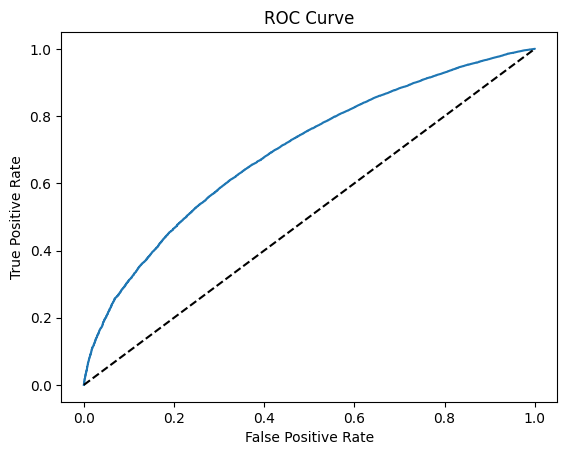

In [333]:
plt.plot(fpr, tpr)
plt.plot(fpr,fpr, linestyle='--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [334]:
AUROC= roc_auc_score(df_actual_predicted_probs['loan_status'], df_actual_predicted_probs['y_hat_prob'])
AUROC

0.6957999302571805

Gini and K-S

In [335]:
df_actual_predicted_probs= df_actual_predicted_probs.sort_values('y_hat_prob')

In [336]:
df_actual_predicted_probs.head()

loan_status  y_hat_prob  y_hat_test
11539            1    0.680315           0
2051             0    0.691599           0
58857            1    0.694317           0
64010            0    0.698998           0
14868            1    0.700008           0

In [337]:
df_actual_predicted_probs= df_actual_predicted_probs.reset_index()

In [338]:
df_actual_predicted_probs['Cumulative_N_population']= df_actual_predicted_probs.index+1
df_actual_predicted_probs['Cumulative_N_good']= df_actual_predicted_probs['loan_status'].cumsum()
df_actual_predicted_probs['Cumulative_N_bad']= df_actual_predicted_probs['Cumulative_N_population']-df_actual_predicted_probs['loan_status'].cumsum()


In [339]:
df_actual_predicted_probs.head()

index  loan_status  y_hat_prob  y_hat_test  Cumulative_N_population  \
0  11539            1    0.680315           0                        1   
1   2051            0    0.691599           0                        2   
2  58857            1    0.694317           0                        3   
3  64010            0    0.698998           0                        4   
4  14868            1    0.700008           0                        5   

   Cumulative_N_good  Cumulative_N_bad  
0                  1                 0  
1                  1                 1  
2                  2                 1  
3                  2                 2  
4                  3                 2

In [340]:
df_actual_predicted_probs['Cumulative_perc_population']= df_actual_predicted_probs['Cumulative_N_population']/df_actual_predicted_probs.shape[0]
df_actual_predicted_probs['Cumulative_perc_good']= df_actual_predicted_probs['Cumulative_N_good']/df_actual_predicted_probs['loan_status'].sum()
df_actual_predicted_probs['Cumulative_perc_bad']= df_actual_predicted_probs['Cumulative_N_bad']/df_actual_predicted_probs['loan_status'].sum()


In [341]:
df_actual_predicted_probs.tail()

index  loan_status  y_hat_prob  y_hat_test  Cumulative_N_population  \
93252  74289            1    0.995235           1                    93253   
93253  26345            1    0.995272           1                    93254   
93254  28298            1    0.995404           1                    93255   
93255  36958            1    0.995464           1                    93256   
93256  26378            1    0.995645           1                    93257   

       Cumulative_N_good  Cumulative_N_bad  Cumulative_perc_population  \
93252              83063             10190                    0.999957   
93253              83064             10190                    0.999968   
93254              83065             10190                    0.999979   
93255              83066             10190                    0.999989   
93256              83067             10190                    1.000000   

       Cumulative_perc_good  Cumulative_perc_bad  
93252              0.999952             0.122672  
93253              0.999964             0.122672  
93254              0.999976             0.122672  
93255              0.999988             0.122672  
93256              1.000000             0.122672

Text(0.5, 1.0, 'Gini Chart')

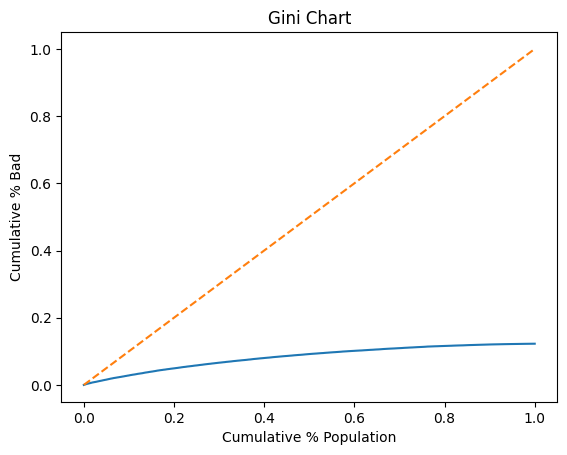

In [342]:
plt.plot(df_actual_predicted_probs['Cumulative_perc_population'], df_actual_predicted_probs['Cumulative_perc_bad'])
plt.plot(df_actual_predicted_probs['Cumulative_perc_population'], df_actual_predicted_probs['Cumulative_perc_population'], linestyle='--')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini Chart')

In [343]:
Gini= AUROC*2-1
Gini

0.3915998605143609

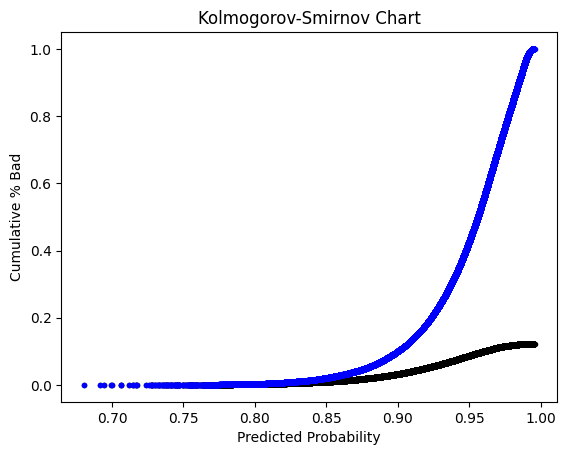

In [344]:
plt.plot(df_actual_predicted_probs['y_hat_prob'], df_actual_predicted_probs['Cumulative_perc_bad'], marker='.', color='k', linestyle='none')
plt.plot(df_actual_predicted_probs['y_hat_prob'], df_actual_predicted_probs['Cumulative_perc_good'], marker='.', color='b', linestyle='none')
plt.xlabel('Predicted Probability')
plt.ylabel('Cumulative % Bad')
plt.title('Kolmogorov-Smirnov Chart')
plt.show()

In [345]:
KS= max(abs(df_actual_predicted_probs['Cumulative_perc_bad']-df_actual_predicted_probs['Cumulative_perc_good']))
KS

0.8773279400965486

# **Score Card**

In [346]:
summary_table

Feature Names  Coefficient       p_values
0                               Intercept    -0.207363            NaN
1                                 grade:A     0.996468   1.486955e-26
2                                 grade:B     0.963932   1.236764e-56
3                                 grade:C     0.763955   1.354301e-41
4                                 grade:D     0.555845   6.030991e-25
5                                 grade:E     0.350312   3.943553e-13
6                                 grade:F     0.152550   2.442708e-03
7                 home_ownership:MORTGAGE     0.116888   8.463353e-21
8                      home_ownership:OWN     0.100413   5.632966e-07
9                        addr_state:NM_VA    -0.053071   6.562392e-02
10           addr_state:OK_TN_MO_LA_MD_NC    -0.014964   4.243115e-01
11                 addr_state:UT_KY_AZ_NJ    -0.003462   8.672101e-01
12              addr_state:AR_MI_PA_OH_MN     0.063005   4.580043e-04
13              addr_state:RI_MA_DE_SD_IN     0.027382   3.011336e-01
14                    addr_state:GA_WA_OR     0.107233   2.749818e-06
15                       addr_state:WI_MT     0.137964   2.185858e-03
16                       addr_state:IL_CT     0.188292   2.573285e-13
17           addr_state:KS_SC_CO_VT_AK_MS     0.251116   1.215862e-19
18           addr_state:WV_NH_WY_DC_ME_ID     0.401038   2.079984e-15
19             purpose:oth__med__vacation     0.002516   9.025948e-01
20    purpose:major_purch__car__home_impr     0.053461   8.634804e-03
21                                term:36     0.091008   5.904913e-11
22                           emp_length:1     0.101547   8.593267e-05
23                         emp_length:2-4     0.125956   2.017910e-11
24                         emp_length:5-6     0.093753   1.099235e-05
25                         emp_length:7-9     0.069226   8.302605e-04
26                          emp_length:10     0.137769   5.951630e-14
27               months_since_issue_d<127     0.494863  4.155247e-146
28           months_since_issue_d:127-134     0.173125   9.852295e-24
29           months_since_issue_d:134-138     0.055896   2.237537e-03
30           months_since_issue_d:138-150    -0.153186   1.868155e-16
31           months_since_issue_d:150-170    -0.348997   4.605693e-60
32                        int_rate:<9.548     1.052231   2.836114e-40
33                  int_rate:9.548-12.025     0.519331   4.533797e-32
34                  int_rate:12.025-15.74     0.268598   1.505815e-13
35                  int_rate:15.74-20.281     0.090852   1.723430e-03
36                          delinq_2yrs:0    -0.100957   8.914714e-02
37                        delinq_2yrs:1-3    -0.117278   3.680589e-02
38                       inq_last_6mths:0     0.444960   4.181162e-04
39                     inq_last_6mths:1-2     0.297028   1.837356e-02
40                     inq_last_6mths:3-6     0.054677   6.655452e-01
41                           open_acc:1-3     0.072672   9.503896e-01
42                          open_acc:4-12    -0.004831   9.966993e-01
43                         open_acc:13-17    -0.036267   9.752264e-01
44                         open_acc:18-22    -0.054277   9.629358e-01
45                         open_acc:23-25    -0.043947   9.700026e-01
46                         open_acc:26-30     0.006206   9.957662e-01
47                          open_acc:>=31    -0.063351   9.568822e-01
48                            pub_rec:3-4     0.175072   6.774417e-02
49                            pub_rec:>=5     0.118832   5.222245e-01
50                        total_acc:28-51    -0.017046   2.296337e-01
51                         total_acc:>=52     0.045713   2.517570e-01
52                     acc_now_delinq:>=1     0.241135   2.372886e-02
53                total_rev_hi_lim:5K-10K     0.089945   2.302991e-04
54               total_rev_hi_lim:10K-20K     0.083229   3.847139e-04
55               total_rev_hi_lim:20K-30K     0.096689   1.615257e-04
56               total_rev_hi_lim:30K-

In [347]:
y_hat_test_proba

array([0.97235953, 0.91553375, 0.94960472, ..., 0.99010838, 0.98055123,
       0.97627935])

In [367]:
df_ref_cat= pd.DataFrame(data=ref_categories, columns=['Feature Names'])

In [368]:
df_ref_cat['Coefficient']=0
df_ref_cat['p_values']=np.nan

In [370]:
scorecard= pd.concat([summary_table, df_ref_cat], axis=0)
scorecard.reset_index()

index                                 Feature Names  Coefficient  \
0        0                                     Intercept    -0.207363   
1        1                                       grade:A     0.996468   
2        2                                       grade:B     0.963932   
3        3                                       grade:C     0.763955   
4        4                                       grade:D     0.555845   
5        5                                       grade:E     0.350312   
6        6                                       grade:F     0.152550   
7        7                       home_ownership:MORTGAGE     0.116888   
8        8                            home_ownership:OWN     0.100413   
9        9                              addr_state:NM_VA    -0.053071   
10      10                  addr_state:OK_TN_MO_LA_MD_NC    -0.014964   
11      11                        addr_state:UT_KY_AZ_NJ    -0.003462   
12      12                     addr_state:AR_MI_PA_OH_MN     0.063005   
13      13                     addr_state:RI_MA_DE_SD_IN     0.027382   
14      14                           addr_state:GA_WA_OR     0.107233   
15      15                              addr_state:WI_MT     0.137964   
16      16                              addr_state:IL_CT     0.188292   
17      17                  addr_state:KS_SC_CO_VT_AK_MS     0.251116   
18      18                  addr_state:WV_NH_WY_DC_ME_ID     0.401038   
19      19                    purpose:oth__med__vacation     0.002516   
20      20           purpose:major_purch__car__home_impr     0.053461   
21      21                                       term:36     0.091008   
22      22                                  emp_length:1     0.101547   
23      23                                emp_length:2-4     0.125956   
24      24                                emp_length:5-6     0.093753   
25      25                                emp_length:7-9     0.069226   
26      26                                 emp_length:10     0.137769   
27      27                      months_since_issue_d<127     0.494863   
28      28                  months_since_issue_d:127-134     0.173125   
29      29                  months_since_issue_d:134-138     0.055896   
30      30                  months_since_issue_d:138-150    -0.153186   
31      31                  months_since_issue_d:150-170    -0.348997   
32      32                               int_rate:<9.548     1.052231   
33      33                         int_rate:9.548-12.025     0.519331   
34      34                         int_rate:12.025-15.74     0.268598   
35      35                         int_rate:15.74-20.281     0.090852   
36      36                                 delinq_2yrs:0    -0.100957   
37      37                               delinq_2yrs:1-3    -0.117278   
38      38                              inq_last_6mths:0     0.444960   
39      39                            inq_last_6mths:1-2     0.297028   
40      40                            inq_last_6mths:3-6     0.054677   
41      41                                  open_acc:1-3     0.072672   
42      42                                 open_acc:4-12    -0.004831   
43      43                                open_acc:13-17    -0.036267   
44      44                                open_acc:18-22    -0.054277   
45      45                                open_acc:23-25    -0.043947   
46      46                                open_acc:26-30     0.006206   
47      47                                 open_acc:>=31    -0.063351   
48      48                                   pub_rec:3-4     0.175072   
49      49                                   pub_rec:>=5     0.118832   
50      50                               total_acc:28-51    -0.017046   
51      51                                total_acc:>=52     0.045713   
52      52                            acc_now_delinq:>=1     0.241135   
53      53                       total_rev_hi_lim:5K-10K     0.

In [371]:
scorecard['original feature name']= scorecard['Feature Names'].str.split(':').str[0]

In [372]:
min_score=0
max_score=100

In [373]:
scorecard.groupby('original feature name')['Coefficient'].min()

original feature name
Intercept                           -0.207363
acc_now_delinq                       0.000000
addr_state                          -0.053071
annual_inc                          -0.130101
delinq_2yrs                         -0.117278
dti                                 -0.103686
emp_length                           0.000000
grade                                0.000000
home_ownership                       0.000000
initial_list_status                  0.000000
inq_last_6mths                       0.000000
int_rate                             0.090852
int_rate>20.281                      0.000000
months_since_earliest_cr_line       -0.058656
months_since_earliest_cr_line<14    -0.021875
months_since_earliest_cr_line>563   -0.069699
months_since_earliest_crline         0.010463
months_since_issue_d                -0.348997
months_since_issue_d<127             0.494863
months_since_issue_d>170             0.000000
mths_since_last_delinq               0.000000
mths_since_last_record               0.000000
open_acc                            -0.063351
pub_rec                              0.000000
purpose                              0.000000
term                                 0.000000
total_acc                           -0.017046
total_rev_hi_lim                     0.000000
Name: Coefficient, dtype: float64

In [374]:
min_sum_coeff= scorecard.groupby('original feature name')['Coefficient'].min().sum()
min_sum_coeff

-0.5949452704790528

In [376]:
max_sum_coeff=scorecard.groupby('original feature name')['Coefficient'].max().sum()
max_sum_coeff

6.009646965167722

In [377]:
scorecard['score calculation']= scorecard['Coefficient']*(max_score-min_score)/(max_sum_coeff-min_sum_coeff)

In [388]:
scorecard

Feature Names  Coefficient       p_values  \
0                                      Intercept    -0.207363            NaN   
1                                        grade:A     0.996468   1.486955e-26   
2                                        grade:B     0.963932   1.236764e-56   
3                                        grade:C     0.763955   1.354301e-41   
4                                        grade:D     0.555845   6.030991e-25   
5                                        grade:E     0.350312   3.943553e-13   
6                                        grade:F     0.152550   2.442708e-03   
7                        home_ownership:MORTGAGE     0.116888   8.463353e-21   
8                             home_ownership:OWN     0.100413   5.632966e-07   
9                               addr_state:NM_VA    -0.053071   6.562392e-02   
10                  addr_state:OK_TN_MO_LA_MD_NC    -0.014964   4.243115e-01   
11                        addr_state:UT_KY_AZ_NJ    -0.003462   8.672101e-01   
12                     addr_state:AR_MI_PA_OH_MN     0.063005   4.580043e-04   
13                     addr_state:RI_MA_DE_SD_IN     0.027382   3.011336e-01   
14                           addr_state:GA_WA_OR     0.107233   2.749818e-06   
15                              addr_state:WI_MT     0.137964   2.185858e-03   
16                              addr_state:IL_CT     0.188292   2.573285e-13   
17                  addr_state:KS_SC_CO_VT_AK_MS     0.251116   1.215862e-19   
18                  addr_state:WV_NH_WY_DC_ME_ID     0.401038   2.079984e-15   
19                    purpose:oth__med__vacation     0.002516   9.025948e-01   
20           purpose:major_purch__car__home_impr     0.053461   8.634804e-03   
21                                       term:36     0.091008   5.904913e-11   
22                                  emp_length:1     0.101547   8.593267e-05   
23                                emp_length:2-4     0.125956   2.017910e-11   
24                                emp_length:5-6     0.093753   1.099235e-05   
25                                emp_length:7-9     0.069226   8.302605e-04   
26                                 emp_length:10     0.137769   5.951630e-14   
27                      months_since_issue_d<127     0.494863  4.155247e-146   
28                  months_since_issue_d:127-134     0.173125   9.852295e-24   
29                  months_since_issue_d:134-138     0.055896   2.237537e-03   
30                  months_since_issue_d:138-150    -0.153186   1.868155e-16   
31                  months_since_issue_d:150-170    -0.348997   4.605693e-60   
32                               int_rate:<9.548     1.052231   2.836114e-40   
33                         int_rate:9.548-12.025     0.519331   4.533797e-32   
34                         int_rate:12.025-15.74     0.268598   1.505815e-13   
35                         int_rate:15.74-20.281     0.090852   1.723430e-03   
36                                 delinq_2yrs:0    -0.100957   8.914714e-02   
37                               delinq_2yrs:1-3    -0.117278   3.680589e-02   
38                              inq_last_6mths:0     0.444960   4.181162e-04   
39                            inq_last_6mths:1-2     0.297028   1.837356e-02   
40                            inq_last_6mths:3-6     0.054677   6.655452e-01   
41                                  open_acc:1-3     0.072672   9.503896e-01   
42                                 open_acc:4-12    -0.004831   9.966993e-01   
43                                open_acc:13-17    -0.036267   9.752264e-01   
44                                open_acc:18-22    -0.054277   9.629358e-01   
45                                open_acc:23-25    -0.043947   9.700026e-01   
46                                open_acc:26-30     0.006206   9.957662e-01   
47                                 open_acc:>=31    -0.063351   9.568822e-01   
48                                   pub_rec:3-4     0.175072   6.774417e-02   
49                                 

In [380]:
scorecard['score calculation'][0]= ((scorecard['Coefficient'][0]-min_sum_coeff)/(max_sum_coeff-min_sum_coeff))*(max_score-min_score)+min_score

In [382]:
scorecard['score']= scorecard['score calculation'].round()

In [385]:
min_score_prelim= scorecard.groupby('original feature name')['score'].min().sum()
min_score_prelim

1.0

In [386]:
max_score_prelim= scorecard.groupby('original feature name')['score'].max().sum()
max_score_prelim

102.0

Calculating Score

In [389]:
x_test_dummy_categories.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514        0        0        1        0        0        0   
288564        0        0        0        0        1        0   
213591        0        0        1        0        0        0   
263083        0        0        1        0        0        0   
165001        1        0        0        0        0        0   

        home_ownership:MORTGAGE  home_ownership:OWN  addr_state:NM_VA  \
362514                        1                   0                 0   
288564                        1                   0                 0   
213591                        1                   0                 0   
263083                        1                   0                 0   
165001                        1                   0                 0   

        addr_state:OK_TN_MO_LA_MD_NC  addr_state:UT_KY_AZ_NJ  \
362514                             0                       0   
288564                             0                       0   
213591                             0                       1   
263083                             0                       0   
165001                             0                       0   

        addr_state:AR_MI_PA_OH_MN  addr_state:RI_MA_DE_SD_IN  \
362514                          0                          0   
288564                          0                          1   
213591                          0                          0   
263083                          1                          0   
165001                          1                          0   

        addr_state:GA_WA_OR  addr_state:WI_MT  addr_state:IL_CT  \
362514                    0                 0                 0   
288564                    0                 0                 0   
213591                    0                 0                 0   
263083                    0                 0                 0   
165001                    0                 0                 0   

        addr_state:KS_SC_CO_VT_AK_MS  addr_state:WV_NH_WY_DC_ME_ID  \
362514                             0                             0   
288564                             0                             0   
213591                             0                             0   
263083                             0                             0   
165001                             0                             0   

        purpose:oth__med__vacation  purpose:major_purch__car__home_impr  \
362514                           0                                    1   
288564                           0                                    0   
213591                           0                                    0   
263083                           0                                    0   
165001                           0                                    0   

        term:36  emp_length:1  emp_length:2-4  emp_length:5-6  emp_length:7-9  \
362514        0             0               0               0               0   
288564        0             0               0               0               0   
213591        1             1               0               0               0   
263083        0             0               1               0               0   
165001        1             0               0               0               0   

        emp_length:10  months_since_issue_d<127  months_since_issue_d:127-134  \
362514              0                         1                             1   
288564              1                         1                             0   
213591              0                         0                             0   
263083              0                         1                             0   
165001              1                         0                             0   

        months_since_issue_d:134-138  months_since_issue_d:138-150  \
362514                             0                             0   
288564                   

In [390]:
x_test_dummy_categories_intercept= x_test_dummy_categories

In [391]:
x_test_dummy_categories_intercept.insert(0, 'Intercept',1)

In [392]:
x_test_dummy_categories_intercept.head(2)

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514          1        0        0        1        0        0        0   
288564          1        0        0        0        0        1        0   

        home_ownership:MORTGAGE  home_ownership:OWN  addr_state:NM_VA  \
362514                        1                   0                 0   
288564                        1                   0                 0   

        addr_state:OK_TN_MO_LA_MD_NC  addr_state:UT_KY_AZ_NJ  \
362514                             0                       0   
288564                             0                       0   

        addr_state:AR_MI_PA_OH_MN  addr_state:RI_MA_DE_SD_IN  \
362514                          0                          0   
288564                          0                          1   

        addr_state:GA_WA_OR  addr_state:WI_MT  addr_state:IL_CT  \
362514                    0                 0                 0   
288564                    0                 0                 0   

        addr_state:KS_SC_CO_VT_AK_MS  addr_state:WV_NH_WY_DC_ME_ID  \
362514                             0                             0   
288564                             0                             0   

        purpose:oth__med__vacation  purpose:major_purch__car__home_impr  \
362514                           0                                    1   
288564                           0                                    0   

        term:36  emp_length:1  emp_length:2-4  emp_length:5-6  emp_length:7-9  \
362514        0             0               0               0               0   
288564        0             0               0               0               0   

        emp_length:10  months_since_issue_d<127  months_since_issue_d:127-134  \
362514              0                         1                             1   
288564              1                         1                             0   

        months_since_issue_d:134-138  months_since_issue_d:138-150  \
362514                             0                             0   
288564                             0                             0   

        months_since_issue_d:150-170  int_rate:<9.548  int_rate:9.548-12.025  \
362514                             0                0                      0   
288564                             0                0                      0   

        int_rate:12.025-15.74  int_rate:15.74-20.281  delinq_2yrs:0  \
362514                      1                      0              1   
288564                      0                      0              0   

        delinq_2yrs:1-3  inq_last_6mths:0  inq_last_6mths:1-2  \
362514                0                 1                   0   
288564                1                 1                   0   

        inq_last_6mths:3-6  open_acc:1-3  open_acc:4-12  open_acc:13-17  \
362514                   0             0              1               0   
288564                   0             0              0               0   

        open_acc:18-22  open_acc:23-25  open_acc:26-30  open_acc:>=31  \
362514               0               0               0              0   
288564               1               0               0              0   

        pub_rec:3-4  pub_rec:>=5  total_acc:28-51  total_acc:>=52  \
362514            0            0                0               0   
288564            0            0                1               0   

        acc_now_delinq:>=1  total_rev_hi_lim:5K-10K  total_rev_hi_lim:10K-20K  \
362514                   0                        0                         0   
288564                   0                        0                         0   

        total_rev_hi_lim:20K-30K  total_rev_hi_lim:30K-40K  \
362514                         1                         0   
288564                         1                         0   

        total_rev_hi_lim:40K-55K  total_rev_hi_lim:55K-95K  \
362514                         0        

In [393]:
x_test_dummy_categories_intercept= x_test_dummy_categories_intercept[scorecard['Feature Names'].values]

KeyError: "['grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 'addr_state:ND_NE_IA_NV_FL_HI_AL', 'purpose:educ__sm_b__wedd__ren_en__mov__house', 'initial_list_status:f', 'months_since_earliest_cr_line:14-147', 'term:60', 'emp_length:0', 'months_since_issue_d>170', 'int_rate>20.281', 'delinq_2yrs:>=4', 'inq_last_6mths:>6', 'open_acc:0', 'pub_rec:0-2', 'total_acc:<=27', 'acc_now_delinq:0', 'total_rev_hi_lim:<=5K', 'annual_inc:<=20K', 'dti:>35', 'mths_since_last_record:0-2', 'mths_since_last_delinq:0-3'] not in index"

In [394]:
len(x_test_dummy_categories_intercept.columns.values)

100

In [395]:
len(scorecard['Feature Names'])

121

In [399]:
absent= [cols for cols in x_test_dummy_categories_intercept.columns.values if cols not in scorecard['Feature Names'].values]

In [400]:
absent

[]

In [398]:
scorecard['Feature Names'].values

array(['Intercept', 'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E',
       'grade:F', 'home_ownership:MORTGAGE', 'home_ownership:OWN',
       'addr_state:NM_VA', 'addr_state:OK_TN_MO_LA_MD_NC',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID',
       'purpose:oth__med__vacation',
       'purpose:major_purch__car__home_impr', 'term:36', 'emp_length:1',
       'emp_length:2-4', 'emp_length:5-6', 'emp_length:7-9',
       'emp_length:10', 'months_since_issue_d<127',
       'months_since_issue_d:127-134', 'months_since_issue_d:134-138',
       'months_since_issue_d:138-150', 'months_since_issue_d:150-170',
       'int_rate:<9.548', 'int_rate:9.548-12.025',
       'int_rate:12.025-15.74', 'int_rate:15.74-20.281', 'delinq_2yrs:0',
       'delinq_2yrs:1-3', 'inq_last_6mths:0', 'inq_last_6mths:1-2',
  

In [401]:
x_test_dummy_categories_intercept.columns

Index(['Intercept', 'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E',
       'grade:F', 'home_ownership:MORTGAGE', 'home_ownership:OWN',
       'addr_state:NM_VA', 'addr_state:OK_TN_MO_LA_MD_NC',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR', 'addr_state:WI_MT',
       'addr_state:IL_CT', 'addr_state:KS_SC_CO_VT_AK_MS',
       'addr_state:WV_NH_WY_DC_ME_ID', 'purpose:oth__med__vacation',
       'purpose:major_purch__car__home_impr', 'term:36', 'emp_length:1',
       'emp_length:2-4', 'emp_length:5-6', 'emp_length:7-9', 'emp_length:10',
       'months_since_issue_d<127', 'months_since_issue_d:127-134',
       'months_since_issue_d:134-138', 'months_since_issue_d:138-150',
       'months_since_issue_d:150-170', 'int_rate:<9.548',
       'int_rate:9.548-12.025', 'int_rate:12.025-15.74',
       'int_rate:15.74-20.281', 'delinq_2yrs:0', 'delinq_2yrs:1-3',
       'inq_last_6mths:0', 'inq_last_6mths:1-2', 'inq_last